# Meta-analysis

Load in processed data and explore model fits via meta-analysis

In [1]:
### autoreload
%reload_ext autoreload
%autoreload 2

### import
# general
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

# R
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr

# custom
from calcification.analysis import analysis, analysis_utils
from calcification.utils import config
from calcification.plotting import analysis as analysis_plot
from calcification.plotting import plot_utils, climatology, plot_config
from calcification.processing import (
    climatology as climatology_processing,
    carbonate_processing,
    groups_processing,
)

# enable pandas conversion
pandas2ri.activate()
# import required R packages
base = importr("base")
metafor = importr("metafor")
stats = importr("stats")

In [45]:
### process raw data
carbonate_df = carbonate_processing.populate_carbonate_chemistry(
    fp=config.data_dir / "Orlando_data.xlsx",
    sheet_name="all_data",
    selection_dict={"include": "yes"},
)
print(f"\nShape of dataframe with all rows marked for inclusion: {carbonate_df.shape}")

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/processing/cleaning.py:86: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  


Using locations in /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/resources/gmaps_locations.yaml
Using species mapping in /Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/resources/species_mapping.yaml
Loading measured values...


Calculating carbonate chemistry:   0%|          | 0/3393 [00:00<?, ?it/s]


Shape of dataframe with all rows marked for inclusion: (3393, 82)


In [49]:
### basic processing to get ready for assigning effect sizes
# assign treatment groups
carbonate_df_tgs = groups_processing.assign_treatment_groups_multilevel(carbonate_df)
print(f"\nShape of dataframe with treatment groups: {carbonate_df_tgs.shape}")
n1_rows = len(carbonate_df_tgs[carbonate_df_tgs["n"] == 1])
# grouping any samples with samples of n=1
carbonate_df_tgs_no_ones = (
    groups_processing.aggregate_treatments_rows_with_individual_samples(
        carbonate_df_tgs
    )
)
print(
    f"\nShape of dataframe with treatment groups and grouped n=1 rows: {carbonate_df_tgs_no_ones.shape}. \nOriginal had {n1_rows} n=1 rows."
)
working_df = carbonate_df_tgs_no_ones.copy()

Assigning treatment groups:   0%|          | 0/317 [00:00<?, ?it/s]


Shape of dataframe with treatment groups: (3388, 87)

Shape of dataframe with treatment groups and grouped n=1 rows: (1596, 87). 
Original had 1914 n=1 rows.


In [50]:
### calculate effect sizes
effects_df = analysis.calculate_effect_for_df(working_df).reset_index(drop=True)
working_effects_df = effects_df.copy()
print(f"Shape of dataframe with effect sizes: {effects_df.shape}")
print(working_effects_df["treatment"].value_counts())


  0%|          | 0/149 [00:00<?, ?it/s]

Missing data for effect size calculation. mu_t: 1.457, mu_c: 1.779, sd_t: nan, sd_c: nan, n_t: 5.000, n_c: 5.000 at 
[index 9 DOI 10.1111/jpy.13290]
10.1111/jpy.13290
Missing data for effect size calculation. mu_t: 1.971, mu_c: 1.779, sd_t: nan, sd_c: nan, n_t: 5.000, n_c: 5.000 at 
[index 11 DOI 10.1111/jpy.13290]
10.1111/jpy.13290
Missing data for effect size calculation. mu_t: 1.779, mu_c: 1.779, sd_t: nan, sd_c: nan, n_t: 5.000, n_c: 5.000 at 
[index 10 DOI 10.1111/jpy.13290]
10.1111/jpy.13290
Missing data for effect size calculation. mu_t: 1.971, mu_c: 1.457, sd_t: nan, sd_c: nan, n_t: 5.000, n_c: 5.000 at 
[index 11 DOI 10.1111/jpy.13290]
10.1111/jpy.13290
Missing data for effect size calculation. mu_t: 1.971, mu_c: 1.779, sd_t: nan, sd_c: nan, n_t: 5.000, n_c: 5.000 at 
[index 11 DOI 10.1111/jpy.13290]
10.1111/jpy.13290
Missing data for effect size calculation. mu_t: 0.575, mu_c: 1.048, sd_t: nan, sd_c: nan, n_t: 5.000, n_c: 5.000 at 
[index 13 DOI 10.1111/jpy.13290]
10.1111/jpy

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/analysis/analysis.py:167: RuntimeWarning: invalid value encountered in scalar divide
  d = (mu2 - mu1) / sd_pooled


Missing data for effect size calculation. mu_t: 56.410, mu_c: 65.385, sd_t: nan, sd_c: nan, n_t: 3.500, n_c: 3.500 at 
[index 517 DOI 10.1007/s00338-020-01991-x]
10.1007/s00338-020-01991-x
Missing data for effect size calculation. mu_t: 162.371, mu_c: 224.227, sd_t: nan, sd_c: nan, n_t: 3.500, n_c: 3.500 at 
[index 515 DOI 10.1007/s00338-020-01991-x]
10.1007/s00338-020-01991-x
Missing data for effect size calculation. mu_t: 50.000, mu_c: 55.769, sd_t: nan, sd_c: nan, n_t: 3.500, n_c: 3.500 at 
[index 513 DOI 10.1007/s00338-020-01991-x]
10.1007/s00338-020-01991-x
Missing data for effect size calculation. mu_t: 101.852, mu_c: 235.185, sd_t: nan, sd_c: nan, n_t: 3.500, n_c: 3.500 at 
[index 519 DOI 10.1007/s00338-020-01991-x]
10.1007/s00338-020-01991-x
Missing data for effect size calculation. mu_t: 7.562, mu_c: 4.312, sd_t: nan, sd_c: nan, n_t: 3.000, n_c: 3.000 at 
[index 527 DOI 10.1371/journal.pone.0189122]
10.1371/journal.pone.0189122
Missing data for effect size calculation. mu_t: 8

/Users/rt582/Library/CloudStorage/OneDrive-UniversityofCambridge/cambridge/phd/Paper_Conferences/calc-rates/calcification/analysis/analysis.py:339: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(0, mean_value)


In [52]:
### load relevant climatology
ph_climatology = climatology_processing.convert_climatology_csv_to_multiindex(
    config.climatology_data_dir / "ph_scenarios_output_table_site_locations.csv",
    config.resources_dir / "locations.yaml",
)

sst_climatology = climatology_processing.convert_climatology_csv_to_multiindex(
    config.climatology_data_dir / "sst_scenarios_output_table_site_locations.csv",
    config.resources_dir / "locations.yaml",
)

merged_clim_df = pd.merge(
    sst_climatology,
    ph_climatology,
)  # concatenated sst and ph climatology dataframes

# prepare dataframes and merge
merged_clim_df_mi = merged_clim_df.set_index(
    ["doi", "location", "longitude", "latitude"]
)
working_df_mi = working_df.set_index(["doi", "location", "longitude", "latitude"])
working_clim_df = working_df_mi.join(merged_clim_df_mi, how="inner")

print(
    f"There are {len(merged_clim_df_mi.index.unique())} unique locations in the climatology data compared with {len(working_df.drop_duplicates('doi', keep='first'))} location counts in the working dataframe."
)

# exclude locations mentioning non-tropical ranges, so retrieved climatology data is not relevant
working_clim_df = working_clim_df[
    ~working_clim_df.index.get_level_values("location").str.contains(
        "monaco|portugal|uk", case=False, na=False
    )
]

### calculate the global average anomalies for each scenario and time_frame
future_global_anomaly_df = (
    working_clim_df.reset_index()
    .groupby(["scenario", "time_frame"])
    .agg(
        mean_sst_anomaly=("mean_sst_20y_anomaly_ensemble", "mean"),
        mean_ph_anomaly=("mean_ph_20y_anomaly_ensemble", "mean"),
    )
    .reset_index()
)
future_global_anomaly_df.head()

There are 198 unique locations in the climatology data compared with 149 location counts in the working dataframe.


scenario time_frame  mean_sst_anomaly  mean_ph_anomaly
0   ssp126  2021_2040          0.739892        -0.065388
1   ssp126  2041_2060          0.998894        -0.090557
2   ssp126  2081_2100          1.110410        -0.085169
3   ssp245  2021_2040          0.733399        -0.069297
4   ssp245  2041_2060          1.173229        -0.116810

### Initial model exploration

An intercept is included in models which only include abiotic treatments (i.e. changes in pH/temperature). In this case, the following can be interpreted:
- Intercept – represents the estimated calcification reponse when all moderators are zero (i.e. control condition). This relates to the baseline calcification rate before experimental manipulation, averaged across all the organism types.
- Coefficients – the coefficients represent the estimated change in calcification for a one-unit change in pH or temperature (note difference in signs, since for experimental treatments $\Delta$ pH < 0 while $\Delta$ T > 0) while holding the other coefficient constant.

Including an intercept allows the regression to find its baseline/natural position rather than forcing it through the origin. This would force the assumption that zero change in pH and temperature must result in zero change in calcification (which may not be true, especially given experimental/methodological uncertainty).

The following code blocks illustrate the effect on the significance of the moderators in both the presence and absence of a model intercept.

In [6]:
# declare effect type for subsequent investigation
effect_type = "st_relative_calcification"

In [7]:
### ILLUSTRATING INTERCEPT (CARBONATE CHEMISTRY ONLY)
expected_model, expected_model_summary, expected_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t",
    )
)
print(expected_model_summary)

expected_model, expected_model_summary, expected_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t - 1",
    )
)
print(expected_model_summary)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4876.9082   9753.8164   9765.8164   9794.8016   9765.9078   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1691.4033  41.1267    114     no     original_doi 
sigma^2.2   916.9470  30.2811    930     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 926) = 64356.5811, p-val < .0001

Test of Moderators (coefficients 2:4):
QM(df = 3) = 53.9139, p-val < .0001

Model Re

In [8]:
### ILLUSTRATING INTERCEPT (WITH CORE GROUPINGS)
expected_model, expected_model_summary, expected_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
    )
)
print(expected_model_summary)

expected_model, expected_model_summary, expected_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping) - 1",
    )
)
print(expected_model_summary)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11
Using formula st_relative_calcification ~ delta_ph * delta_t + factor(core_grouping)

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4843.7878   9687.5755   9707.5755   9755.8410   9707.8170   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1661.9385  40.7669    114     no     original_doi 
sigma^2.2   876.6824  29.6088    930     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 922) = 61558.7748, p-val < .0001

Test of Moderators (coefficients 2:8):
QM(df = 7) = 81.2329,

##### Interpretation: shifts in intercept value as more moderators are added
 
In the case of including taxonomical information (via `core_groupings` factor), an intercept is unnecessary. In this case an intercept would result in a random value of `core_groupings` being assigned as baseline and all other factor values compared against it. While this is useful to investigate comparisons between organisms and a particular reference taxon, it is not the current goal. Removing the intercept means that each `core_grouping` is assigned its own coefficient representing its baseline effect (the expected value of calcification rate for this grouping when the other moderators are zero).   

The addition of the `core_grouping` variable improves the model (test of moderators statistic increases, residual heterogeneity decreases, AICc decreases), suggesting that taxonomic group is an important moderator.

The coefficients for delta_ph and delta_t remain remarkably stable between models, suggesting their effects are robust regardless of which organisms are being considered.

The large discrepency between the magnitudes of the coefficients is perhaps surprising, although it should be noted that due to the logarithmic nature of the pH scale a change by 1 unit represents a 10 times increase in acidity. This puts the temperature slope in perspective. Additionally, a number of studies suggest a non-linear trend in calcification rate with increasing temperature. The suggested quadratic would result in a linear slope under-representing the likely ultimately-negative impact of increasing temperature with respect to the control. Finally, multiple studies reported sample mortality at more extreme treatment conditions, and the resulting survivorship effect may represent resistant species with only smaller sample sizes at the higher temperatures: especially since such mortalities are rarely reported consistently.

In [9]:
### INIITAL NAIVE (ILLUSTRATION)
expected_model, expected_model_summary, expected_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ 1",
    )
)
print(expected_model_summary)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09
Using formula st_relative_calcification ~ 1

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4917.7814   9835.5628   9841.5628   9856.0652   9841.5888   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1682.9675  41.0240    114     no     original_doi 
sigma^2.2   989.2892  31.4530    930     no  original_doi/ID 

Test for Heterogeneity:
Q(df = 929) = 64418.0622, p-val < .0001

Model Results:

estimate      se     zval    pval     ci.lb     ci.ub      
-19.0064  4.4219  -4.2982  <.0001  

##### Interpretation

As above, the model intercept represents the estimated overall mean effect of the treatments (changing pH and temperature) on calcification rates across all studies and organisms in the meta-analysis, after accounting for the nested random effects structure relating to the nested structure of the dataset (multiple treatments within studies).

A negative intercept indicates that, on average across all studies and organisms, the calcification rates decreased in response to the experimental treatments. A high statistical significance (e.g. p < 0.0001) indicates that this decrease is unlikely due to chance. The confidence interval (95%) shows the range in which the true mean effect is likely to fall.

However, the substantial between-study variance (sigma^2.1 = 1775.21) suggests that the response varies considerably across different organisms and/or experimental conditions.

In [10]:
### INIITAL CORE GROUPINGS (ILLUSTRATION)
cg_model, cg_model_summary, cg_model_formula, _ = analysis.run_metafor_mv(
    working_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ factor(core_grouping) - 1",
)
print(cg_model_summary)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09
Using formula st_relative_calcification ~ factor(core_grouping) - 1

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4884.9880   9769.9760   9783.9760   9817.7845   9784.0981   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1641.3572  40.5137    114     no     original_doi 
sigma^2.2   950.4678  30.8297    930     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 925) = 61645.5121, p-val < .0001

Test of Moderators (coefficients 1:5):
QM(df = 5) = 43.7906, p-val < .0001

M


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11
Using formula st_relative_calcification ~ delta_ph + delta_t

Running metafor model...


R[write to console]: In addition: 
R[write to console]: There were 14 warnings (use warnings() to see them)
R[write to console]: 



Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4882.6813   9765.3626   9775.3626   9799.5224   9775.4278   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1693.2425  41.1490    114     no     original_doi 
sigma^2.2   919.8785  30.3295    930     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 927) = 64356.8593, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 51.7746, p-val < .0001

Model Results:

          estimate      se     zval    pval    ci.lb    ci.ub      
intrcpt     0.3668  5.1858   0.0707  0.9436  -9.7972  10.5308      
delta_ph   59.4605  8.6467   6.8767  <.0001  42.5133  76.4076  *** 
delta_t    -3.7173  1.0539  -3.5271  0.0004  -5.7830  -1.6517  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




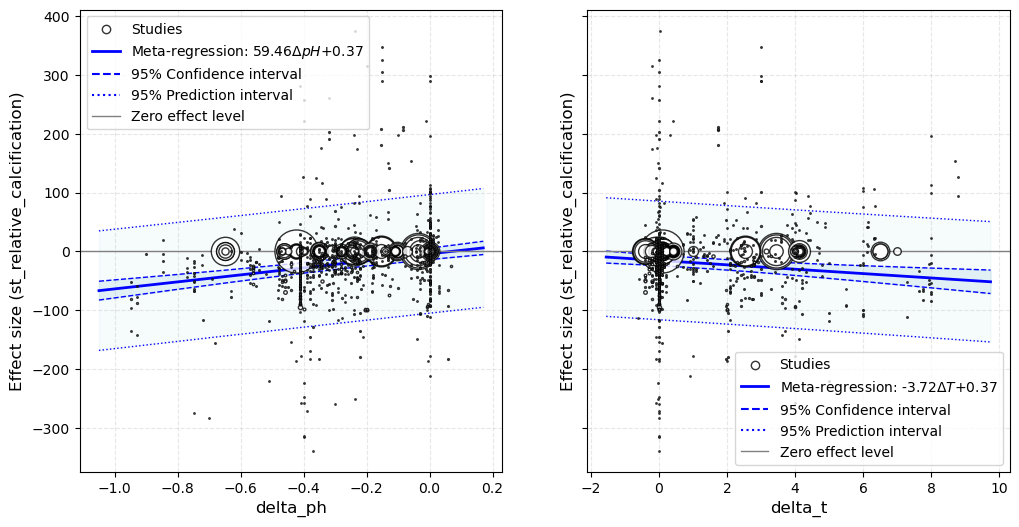

In [11]:
### A MORE REASONABLE MODEL (DELTA PH AND DELTA T, ADDITIVE)
additive_model, additive_model_summary, additive_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph + delta_t",
    )
)
print(additive_model_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=additive_model,
    model_comps=analysis.get_formula_components(additive_model_formula),
    x_mod="delta_ph",
    pi=True,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="ph",
)

reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=additive_model,
    model_comps=analysis.get_formula_components(additive_model_formula),
    x_mod="delta_t",
    pi=True,
    ax=axes[1],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="sst",
)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1103
Total samples of relevant investigation:  862
Dropped due to NaN values in required columns: 0
Final sample count: 862 (241 rows dropped)

Removed 10 outlier(s) (from 862 samples) based on Cook's distance threshold of 0.12
Using formula st_relative_calcification ~ delta_ph + delta_t

Running metafor model...


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Extra argument ('useS4') disregarded. 



Model fitting complete.

Multivariate Meta-Analysis Model (k = 852; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4283.6125   8567.2250   8577.2250   8600.9453   8577.2962   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1211.0471  34.8001    110     no     original_doi 
sigma^2.2   641.4864  25.3276    852     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 849) = 60626.5725, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 51.1601, p-val < .0001

Model Results:

          estimate      se     zval    pval     ci.lb    ci.ub      
intrcpt    -3.4473  4.4845  -0.7687  0.4421  -12.2368   5.3421      
delta_ph   50.1910  7.5832   6.6187  <.0001   35.3281  65.0538  *** 
delta_t    -3.7691  0.9254  -4.0728  <.0001   -5.5829  -1.9553  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




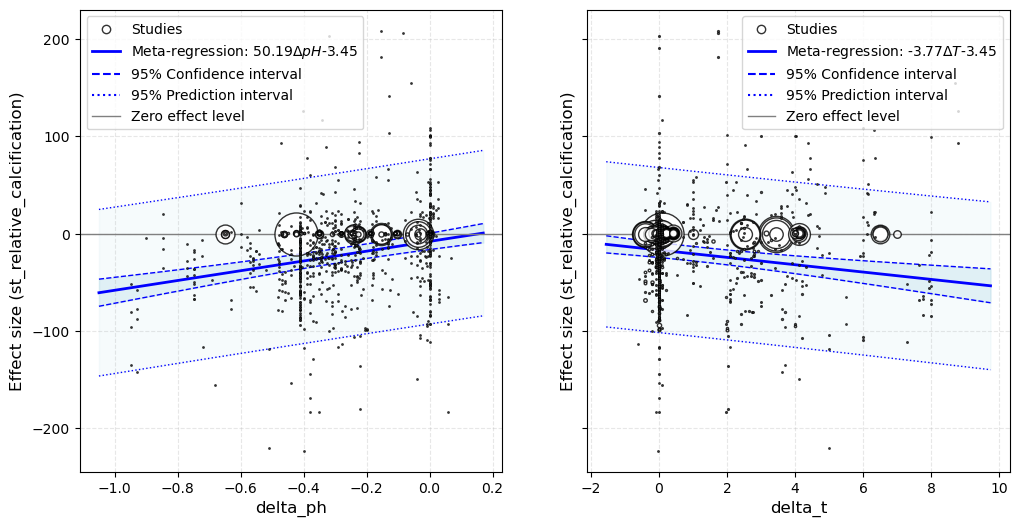

In [13]:
### FILTERING FOR OUTLIERS

filtered_effects_df = working_effects_df.copy()
# add 0.001 to any 0 st_relative_calcification_var values
# filtered_effects_df['st_relative_calcification_var'] = filtered_effects_df['st_relative_calcification_var'].replace(0, 0.001).infer_objects(copy=False)

filtered_effects_df = filtered_effects_df[
    analysis.filter_robust_zscore(filtered_effects_df["st_relative_calcification"])
    & analysis.filter_robust_zscore(
        filtered_effects_df["st_relative_calcification_var"]
    )
]


additive_model, additive_model_summary, additive_model_formula, _ = (
    analysis.run_metafor_mv(
        filtered_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph + delta_t",
    )
)
print(additive_model_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=additive_model,
    model_comps=analysis.get_formula_components(additive_model_formula),
    x_mod="delta_ph",
    pi=True,
    ax=axes[0],
    point_size="vinv",
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="ph",
)

reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=additive_model,
    model_comps=analysis.get_formula_components(additive_model_formula),
    x_mod="delta_t",
    pi=True,
    ax=axes[1],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="sst",
)

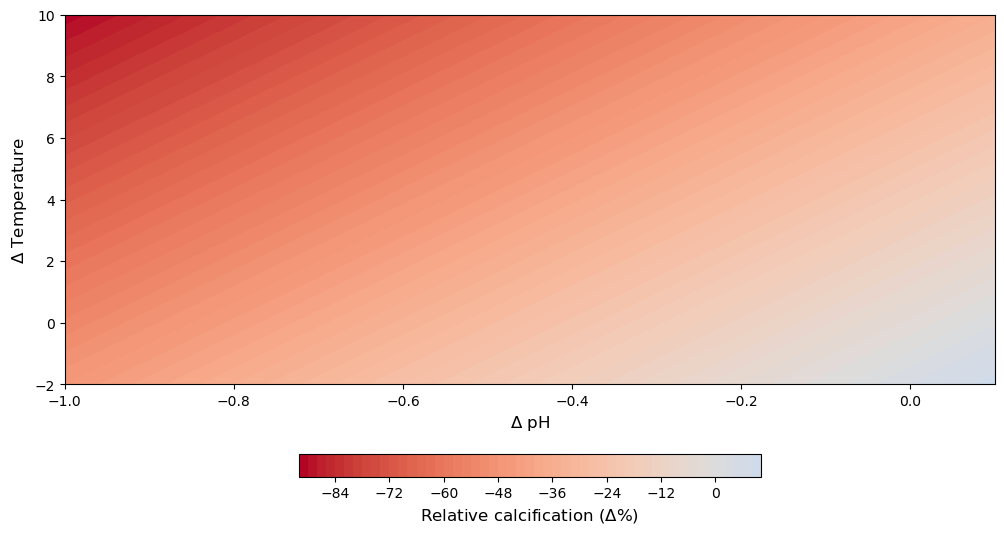

In [14]:
# Extract coefficients from R model object
intercept = additive_model.rx2("beta")[0]
b_ph = -additive_model.rx2("beta")[1]
b_t = additive_model.rx2("beta")[2]
# b_inter = -additive_model.rx2("beta")[3]

# Create grid
delta_ph_range = np.linspace(0.1, -1, 100)
delta_t_range = np.linspace(-2, 10, 100)
delta_ph_grid, delta_t_grid = np.meshgrid(delta_ph_range, delta_t_range)

# Calculate predicted response
pred = intercept - b_ph * delta_ph_grid + b_t * delta_t_grid

# Center colormap at 0
abs_max = np.abs(pred).max()

plt.figure(figsize=(12, 6))
contour = plt.contourf(
    delta_ph_grid,
    delta_t_grid,
    pred,
    levels=50,
    cmap="coolwarm_r",
    vmin=-abs_max,
    vmax=abs_max,
)
cbar = plt.colorbar(contour, orientation="horizontal", fraction=0.05, shrink=0.8)
cbar.set_label(label="Relative calcification ($\\Delta$%)", size="large")
plt.xlabel("$\\Delta$ pH", fontsize=12)
# plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylabel("$\\Delta$ Temperature", fontsize=12)
# plt.title("Predicted Calcification Response")
# plot the contour as a square

plt.show()

##### Interpretation
Group Effects (Absolute Estimates)
Each coefficient now represents the actual mean calcification response for that organism group:

CCA (Crustose Coralline Algae): -35.72 (p < 0.0001)
Shows a strong negative calcification response to pH and temperature treatments
Coral: -10.56 (p = 0.0316)
Shows a moderate negative calcification response
Foraminifera: +22.08 (p = 0.3524)
Shows a positive mean response, but it's not statistically significant (wide confidence interval crossing zero)
Halimeda: -43.90 (p = 0.0004)
Shows a strong negative calcification response
Other algae: -48.51 (p < 0.0001)
Shows the strongest negative calcification response among all groups

Direct Group Comparisons
Now you can directly compare the magnitude of effects across groups:

Most resistant to calcification decline: Foraminifera (+22.08, though not significant)
Moderate decline: Coral (-10.56)
Stronger decline: CCA (-35.72)
Severe decline: Halimeda (-43.90) and Other algae (-48.51)

The significant negative values for most groups indicate that pH and temperature treatments generally reduce calcification rates, but the magnitude varies substantially across taxonomic groups. Notably, Foraminifera appear potentially resilient (showing a non-significant positive trend), while algae groups (especially "Other algae" and Halimeda) appear most vulnerable with the largest negative responses.


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.09
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 2: Extra argument ('useS4') disregarded. 



Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4876.9082   9753.8164   9765.8164   9794.8016   9765.9078   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1691.4033  41.1267    114     no     original_doi 
sigma^2.2   916.9470  30.2811    930     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 926) = 64356.5811, p-val < .0001

Test of Moderators (coefficients 2:4):
QM(df = 3) = 53.9139, p-val < .0001

Model Results:

                  estimate       se     zval    pval     ci.lb    ci.ub      
intrcpt             3.4399   5.6133   0.6128  0.5400   -7.5619  14.4417      
delta_ph           69.6610  11.2207   6.2082  <.0001   47.6688  91.6533  *** 
delta_t            -4.6916   1.2546  -3.7394  0.0002   -7.1507  -2.2326  *** 
delta_ph:delta_t   -6.0393   4.2353  -1.4260  0.1539  -14.3403   2.2616      

---
Signif. codes:  0 ‘**

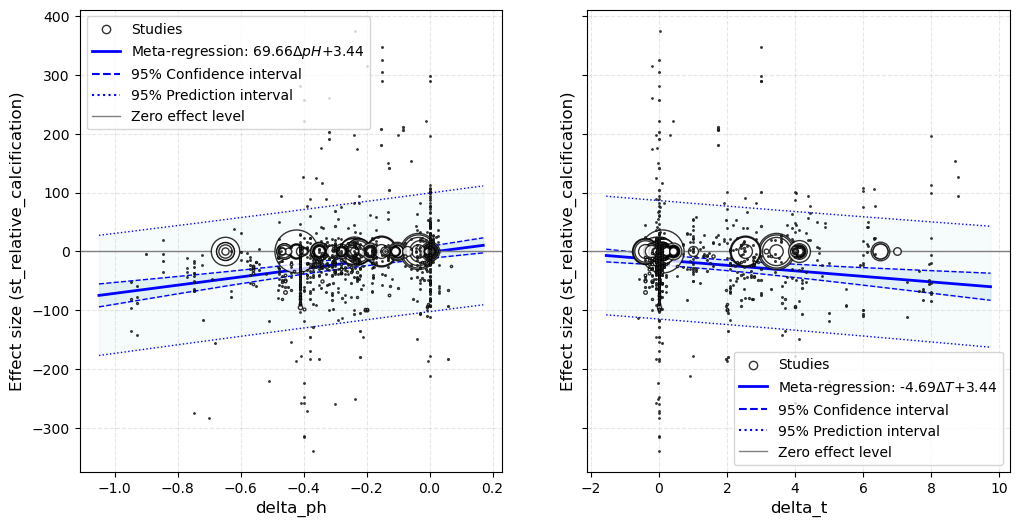

In [15]:
### A MORE REASONABLE MODEL, MORE COMPLEX MODEL (DELTA PH AND DELTA T, INTERACTIVE)
interaction_model, interaction_model_summary, interaction_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t",
    )
)
print(interaction_model_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=interaction_model,
    model_comps=analysis.get_formula_components(interaction_model_formula),
    x_mod="delta_ph",
    pi=True,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="ph",
)

reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=interaction_model,
    model_comps=analysis.get_formula_components(interaction_model_formula),
    x_mod="delta_t",
    pi=True,
    ax=axes[1],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="sst",
)

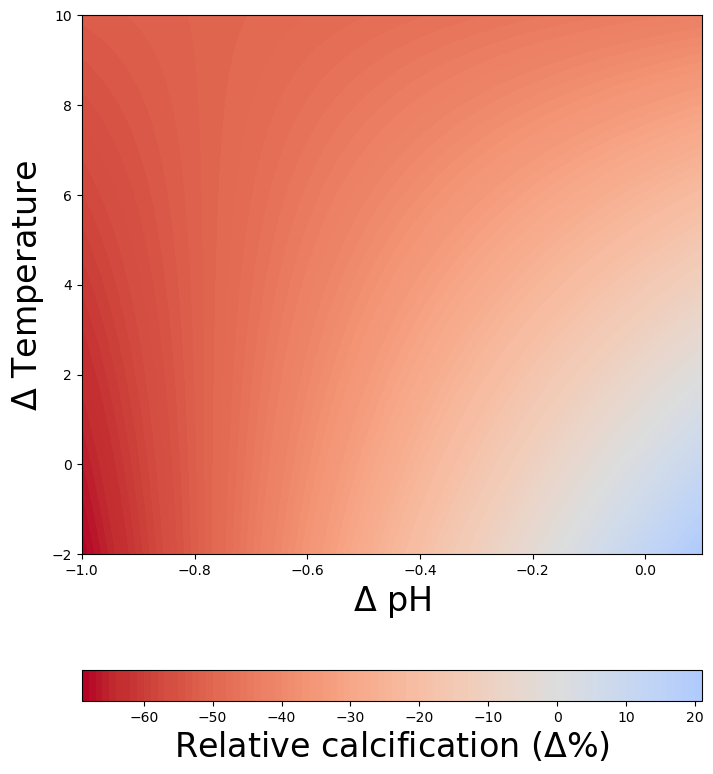

In [16]:
# TODO: THIS IS UNHINGED, WHAT'S GOING ON? NON-LINEAR INTERACTIVE EFFECTS?

# Extract coefficients from R model object
intercept = interaction_model.rx2("beta")[0]
b_ph = interaction_model.rx2("beta")[1]
b_t = interaction_model.rx2("beta")[2]
b_inter = interaction_model.rx2("beta")[3]

# Create grid
delta_ph_range = np.linspace(0.1, -1, 100)
delta_t_range = np.linspace(-2, 10, 100)
delta_ph_grid, delta_t_grid = np.meshgrid(delta_ph_range, delta_t_range)

# Calculate predicted response
pred = (
    intercept
    + b_ph * delta_ph_grid
    + b_t * delta_t_grid
    + b_inter * delta_ph_grid * delta_t_grid
)

# Center colormap at 0
abs_max = np.abs(pred).max()

plt.figure(figsize=(8, 10))
contour = plt.contourf(
    delta_ph_grid,
    delta_t_grid,
    pred,
    levels=100,
    cmap="coolwarm_r",
    vmin=-abs_max,
    vmax=abs_max,
)
# cb = plt.colorbar(contour, label="Predicted Response")
cb = plt.colorbar(contour, orientation="horizontal")
cb.set_label(label="Relative calcification ($\\Delta$%)", fontsize=24)
plt.xlabel("$\\Delta$ pH", fontsize=24)
plt.ylabel("$\\Delta$ Temperature", fontsize=24)
# plt.title("Predicted Calcification Response")
plt.show()

# Find the min and max of pred to set the colorbar center at 0
cmin = np.nanmin(pred)
cmax = np.nanmax(pred)
cmid = 0  # Center at zero

fig = go.Figure(
    data=[
        go.Surface(
            x=delta_ph_grid,
            y=delta_t_grid,
            z=pred,
            colorscale="RdBu",
            colorbar=dict(title="Predicted Response"),
            cmin=cmin,
            cmax=cmax,
            # cmin=cmin,
            # cmax=cmax,
            cmid=cmid,
        )
    ]
)
fig.update_layout(
    title="Predicted Response Surface (Interactive 3D)",
    scene=dict(
        xaxis_title="$\\Delta$ pH",
        yaxis_title="$\\Delta$ Temperature",
        zaxis_title="Predicted Response",
    ),
    width=900,
    height=700,
)
fig.show()


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 12 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11
Using formula st_relative_calcification ~ delta_ph * delta_t + factor(core_grouping) - 1

Running metafor model...


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 2: Extra argument ('useS4') disregarded. 



Model fitting complete.

Multivariate Meta-Analysis Model (k = 930; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4843.7878   9687.5755   9707.5755   9755.8410   9707.8170   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1661.9385  40.7669    114     no     original_doi 
sigma^2.2   876.6824  29.6088    930     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 922) = 61558.7748, p-val < .0001

Test of Moderators (coefficients 1:8):
QM(df = 8) = 100.3848, p-val < .0001

Model Results:

                                   estimate       se     zval    pval     ci.lb 
delta_ph                            68.5932  11.0736   6.1943  <.0001   46.8894 
delta_t                             -4.9451   1.2404  -3.9866  <.0001   -7.3764 
factor(core_grouping)CCA           -14.6967   7.3994  -1.9862  0.0470  -29.1993 
factor(core_grouping)Coral          12.1129   5.8975   2.0539  0.0400    0.5539 
factor(cor

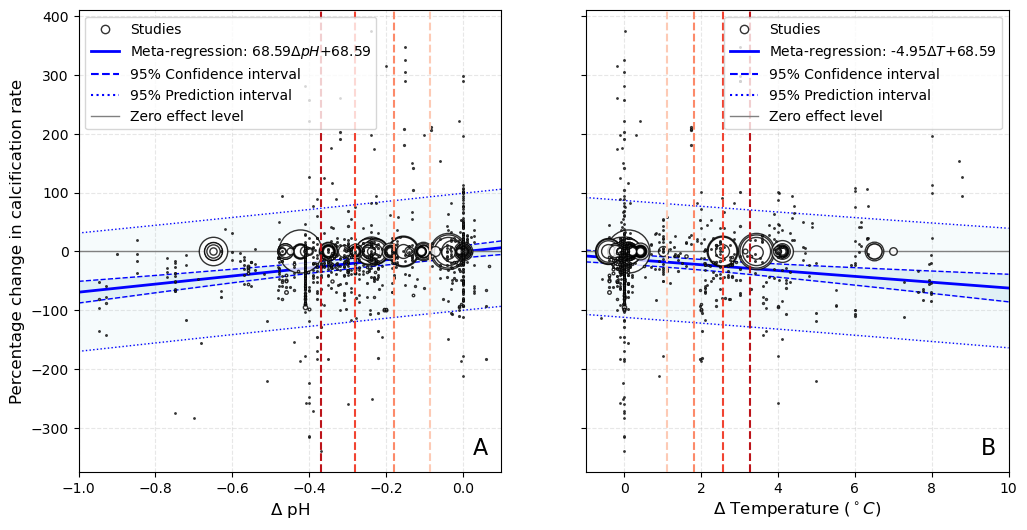

In [17]:
# ### NOW CAPTURING DIFFERENCES BETWEEN CORE GROUPINGS
(
    interaction_cg_model,
    interaction_cg_model_summary,
    interaction_cg_model_formula,
    interaction_cg_df,
) = analysis.run_metafor_mv(
    working_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping) - 1",
)
print(interaction_cg_model_summary)

xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot("phtot")
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=interaction_cg_model,
    model_comps=analysis.get_formula_components(interaction_cg_model_formula),
    x_mod="delta_ph",
    pi=True,
    ax=axes[0],
    xlab=xlab,
    xlim=xlim,
    predlim=predlim,
    ylab="Percentage change in calcification rate",
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="ph",
)
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot("temp")
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=interaction_cg_model,
    model_comps=analysis.get_formula_components(interaction_cg_model_formula),
    x_mod="delta_t",
    pi=True,
    ax=axes[1],
    ylab=" ",
    xlab=xlab,
    xlim=xlim,
    predlim=predlim,
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var="sst",
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

for i, ax in enumerate(axes.flatten()):
    # fetch coordinates of top right hand corner of specific axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # annotate with letter
    ax.annotate(
        chr(65 + i),
        xy=(0.97, 0.05),
        xycoords="axes fraction",
        fontsize=16,
        ha="right",
        va="center",
        # bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

### Investigating absolute values

In [18]:
### SIMPLEST ABSOLUTE VALUES
phtot_abs_model, phtot_abs_model_summary, phtot_abs_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "phtot_temp_mv"],
        formula=f"{effect_type} ~ phtot",
    )
)
print(phtot_abs_model)

temp_abs_model, temp_abs_model_summary, temp_abs_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df,
        effect_type=effect_type,
        treatment=["temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ temp",
    )
)
print(temp_abs_model)

(
    phtot_plus_temp_abs_model,
    phtot_plus_temp_abs_model_summary,
    phtot_plus_temp_abs_model_formula,
    _,
) = analysis.run_metafor_mv(
    working_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot + temp",
)
print(phtot_plus_temp_abs_model)

(
    phtot_cross_temp_abs_model,
    phtot_cross_temp_abs_model_summary,
    phtot_cross_temp_abs_model_formula,
    _,
) = analysis.run_metafor_mv(
    working_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot * temp",
)
print(phtot_cross_temp_abs_model)

(
    phtot_cross_temp_abs_cgs_model,
    phtot_cross_temp_abs_cgs_model_summary,
    phtot_cross_temp_abs_cgs_model_formula,
    _,
) = analysis.run_metafor_mv(
    working_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ phtot * temp + factor(core_grouping)",
)
print(phtot_cross_temp_abs_cgs_model)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  705
Dropped due to NaN values in required columns: 0
Final sample count: 705 (533 rows dropped)

Removed 11 outlier(s) (from 705 samples) based on Cook's distance threshold of 0.11
Using formula st_relative_calcification ~ phtot

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 694; method: REML)

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1761.9907  41.9761    100     no     original_doi 
sigma^2.2   854.7106  29.2354    694     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 692) = 57352.6772, p-val < .0001

Test of Moderators (coefficient 2):
QM(df = 1) = 28.6273, p-val < .0001

Model Results:

          estimate       se     zval    pval      ci.lb      ci.ub      
intrcpt  -481.3110  85.8823  -5.6043  <.0001  -649.6372  -312.9848  

### Comparing between units

TODO: commentary


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  336
Total samples of relevant investigation:  318
Dropped due to NaN values in required columns: 0
Final sample count: 318 (18 rows dropped)

Removed 4 outlier(s) (from 318 samples) based on Cook's distance threshold of 0.20
Using formula st_relative_calcification ~ delta_ph * delta_t + factor(core_grouping)

Running metafor model...
Model fitting complete.

----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  543
Total samples of relevant investigation:  386
Dropped due to NaN values in required columns: 0
Final sample count: 386 (157 rows dropped)

Removed 6 outlier(s) (from 386 samples) based on Cook's distance threshold of 0.18
Using formula st_relative_calcification ~ delta_ph * delta_t + factor(core_grouping)

Running metafor model...


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 2: Extra argument ('useS4') disregarded. 

R[write to console]: 3: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 4: Extra argument ('useS4') disregarded. 

R[write to console]: 5: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 6: Extra argument ('useS4') disregarded. 

R[write to console]: 7: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 8: Extra argument ('useS4') disregarded. 

R[write to console]: 9: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write t

Model fitting complete.


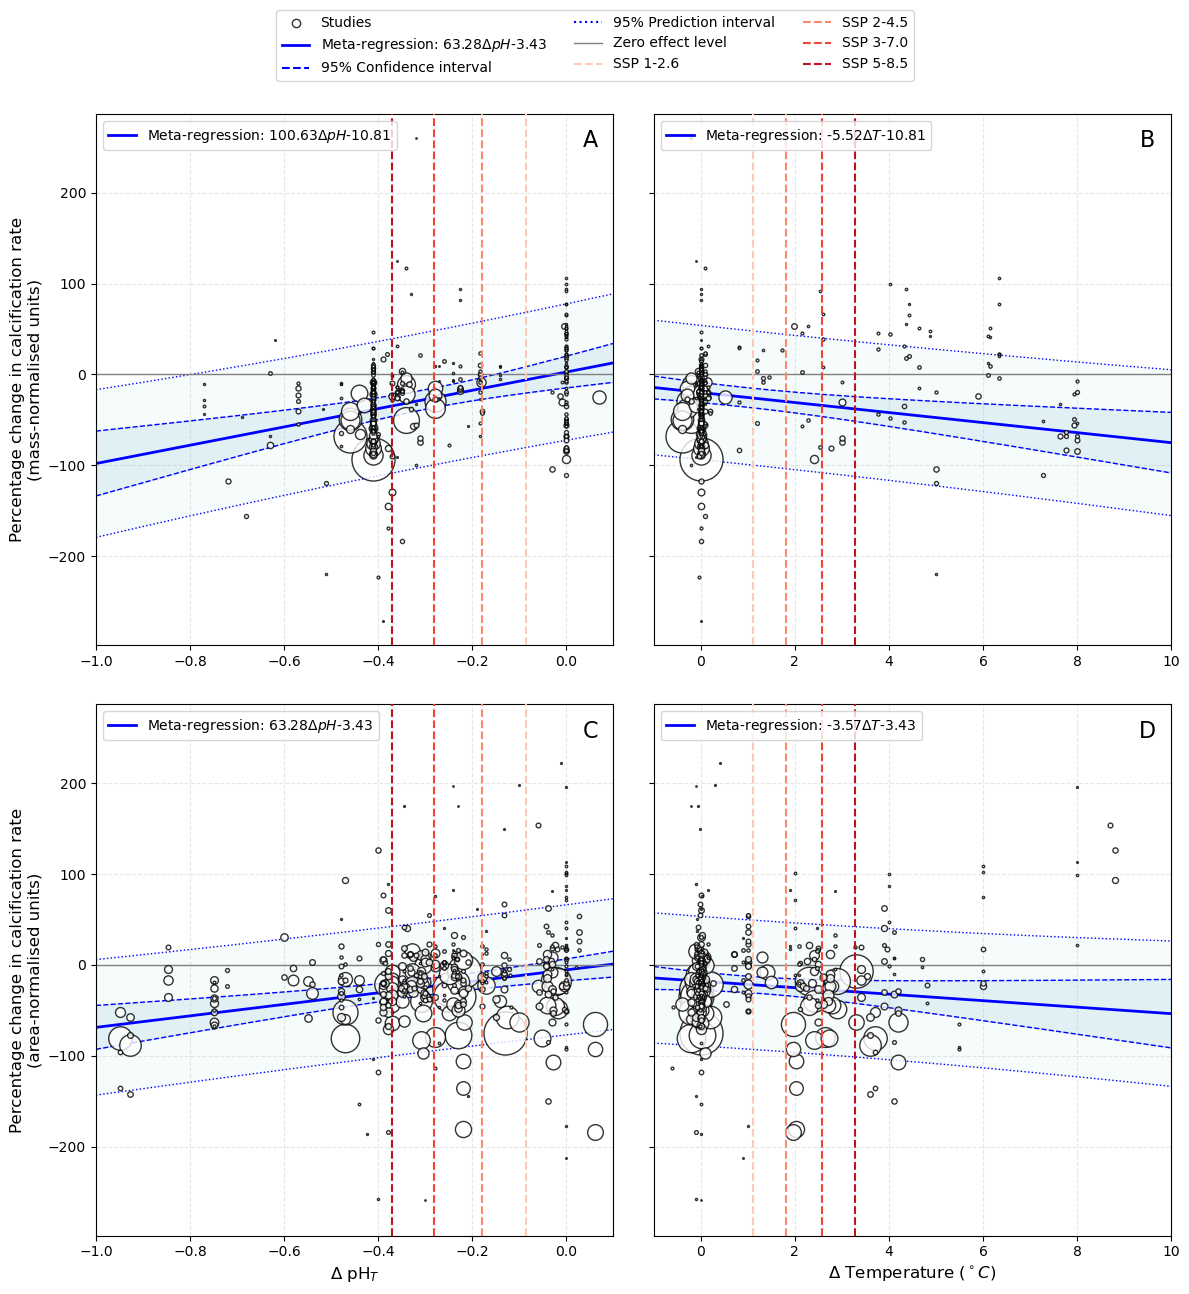

In [19]:
### AREA-NORMALISED VS MASS-NORMALISED
mass_norm_model, mass_norm_model_summary, mass_norm_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df[
            working_effects_df["st_calcification_unit"] == "mgCaCO3 g-1d-1"
        ],
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
    )
)
area_norm_model, area_norm_model_summary, area_norm_model_formula, _ = (
    analysis.run_metafor_mv(
        working_effects_df[
            working_effects_df["st_calcification_unit"] == "mgCaCO3 cm-2d-1"
        ],
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t + factor(core_grouping)",
    )
)

fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot("phtot")
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(  # mass norm
    model=mass_norm_model,
    model_comps=analysis.get_formula_components(mass_norm_model_formula),
    x_mod="delta_ph",
    xlab=" ",
    ylab="Percentage change in calcification rate\n(mass-normalised units)",
    predlim=predlim,
    xlim=xlim,
    pi=True,
    ax=axes[0, 0],
    all_legend=False,
)
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot("temp")
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=mass_norm_model,
    model_comps=analysis.get_formula_components(mass_norm_model_formula),
    x_mod="delta_t",
    xlab=" ",
    ylab=" ",
    pi=True,
    predlim=predlim,
    xlim=xlim,
    ax=axes[0, 1],
    all_legend=False,
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot("phtot")
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(  # area norm
    model=area_norm_model,
    model_comps=analysis.get_formula_components(area_norm_model_formula),
    x_mod="delta_ph",
    xlab="$\\Delta$ pH$_T$",
    ylab="Percentage change in calcification rate\n(area-normalised units)",
    predlim=predlim,
    xlim=xlim,
    pi=True,
    ax=axes[1, 0],
    all_legend=False,
)
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot("temp")
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=area_norm_model,
    model_comps=analysis.get_formula_components(area_norm_model_formula),
    x_mod="delta_t",
    xlab="$\\Delta$ Temperature ($^\\circ C$)",
    ylab=" ",
    pi=True,
    predlim=predlim,
    xlim=xlim,
    ax=axes[1, 1],
    all_legend=False,
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)


# add overall legend on figure
handles, labels = ph_reg_ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(
    by_label.values(),
    by_label.keys(),
    loc="upper center",
    ncol=3,
    fontsize=10,
    bbox_to_anchor=(0.5, 1.08),
    bbox_transform=fig.transFigure,
)
# annotate axes with letters A, B, C, D in top right hand corner
for i, ax in enumerate(axes.flatten()):
    # fetch coordinates of top right hand corner of specific axis
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    # annotate with letter
    ax.annotate(
        chr(65 + i),
        xy=(0.97, 0.95),
        xycoords="axes fraction",
        fontsize=16,
        ha="right",
        va="center",
        # bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )


plt.tight_layout()

### Testing for publication bias

(<Figure size 3000x2400 with 1 Axes>, <Axes: >)

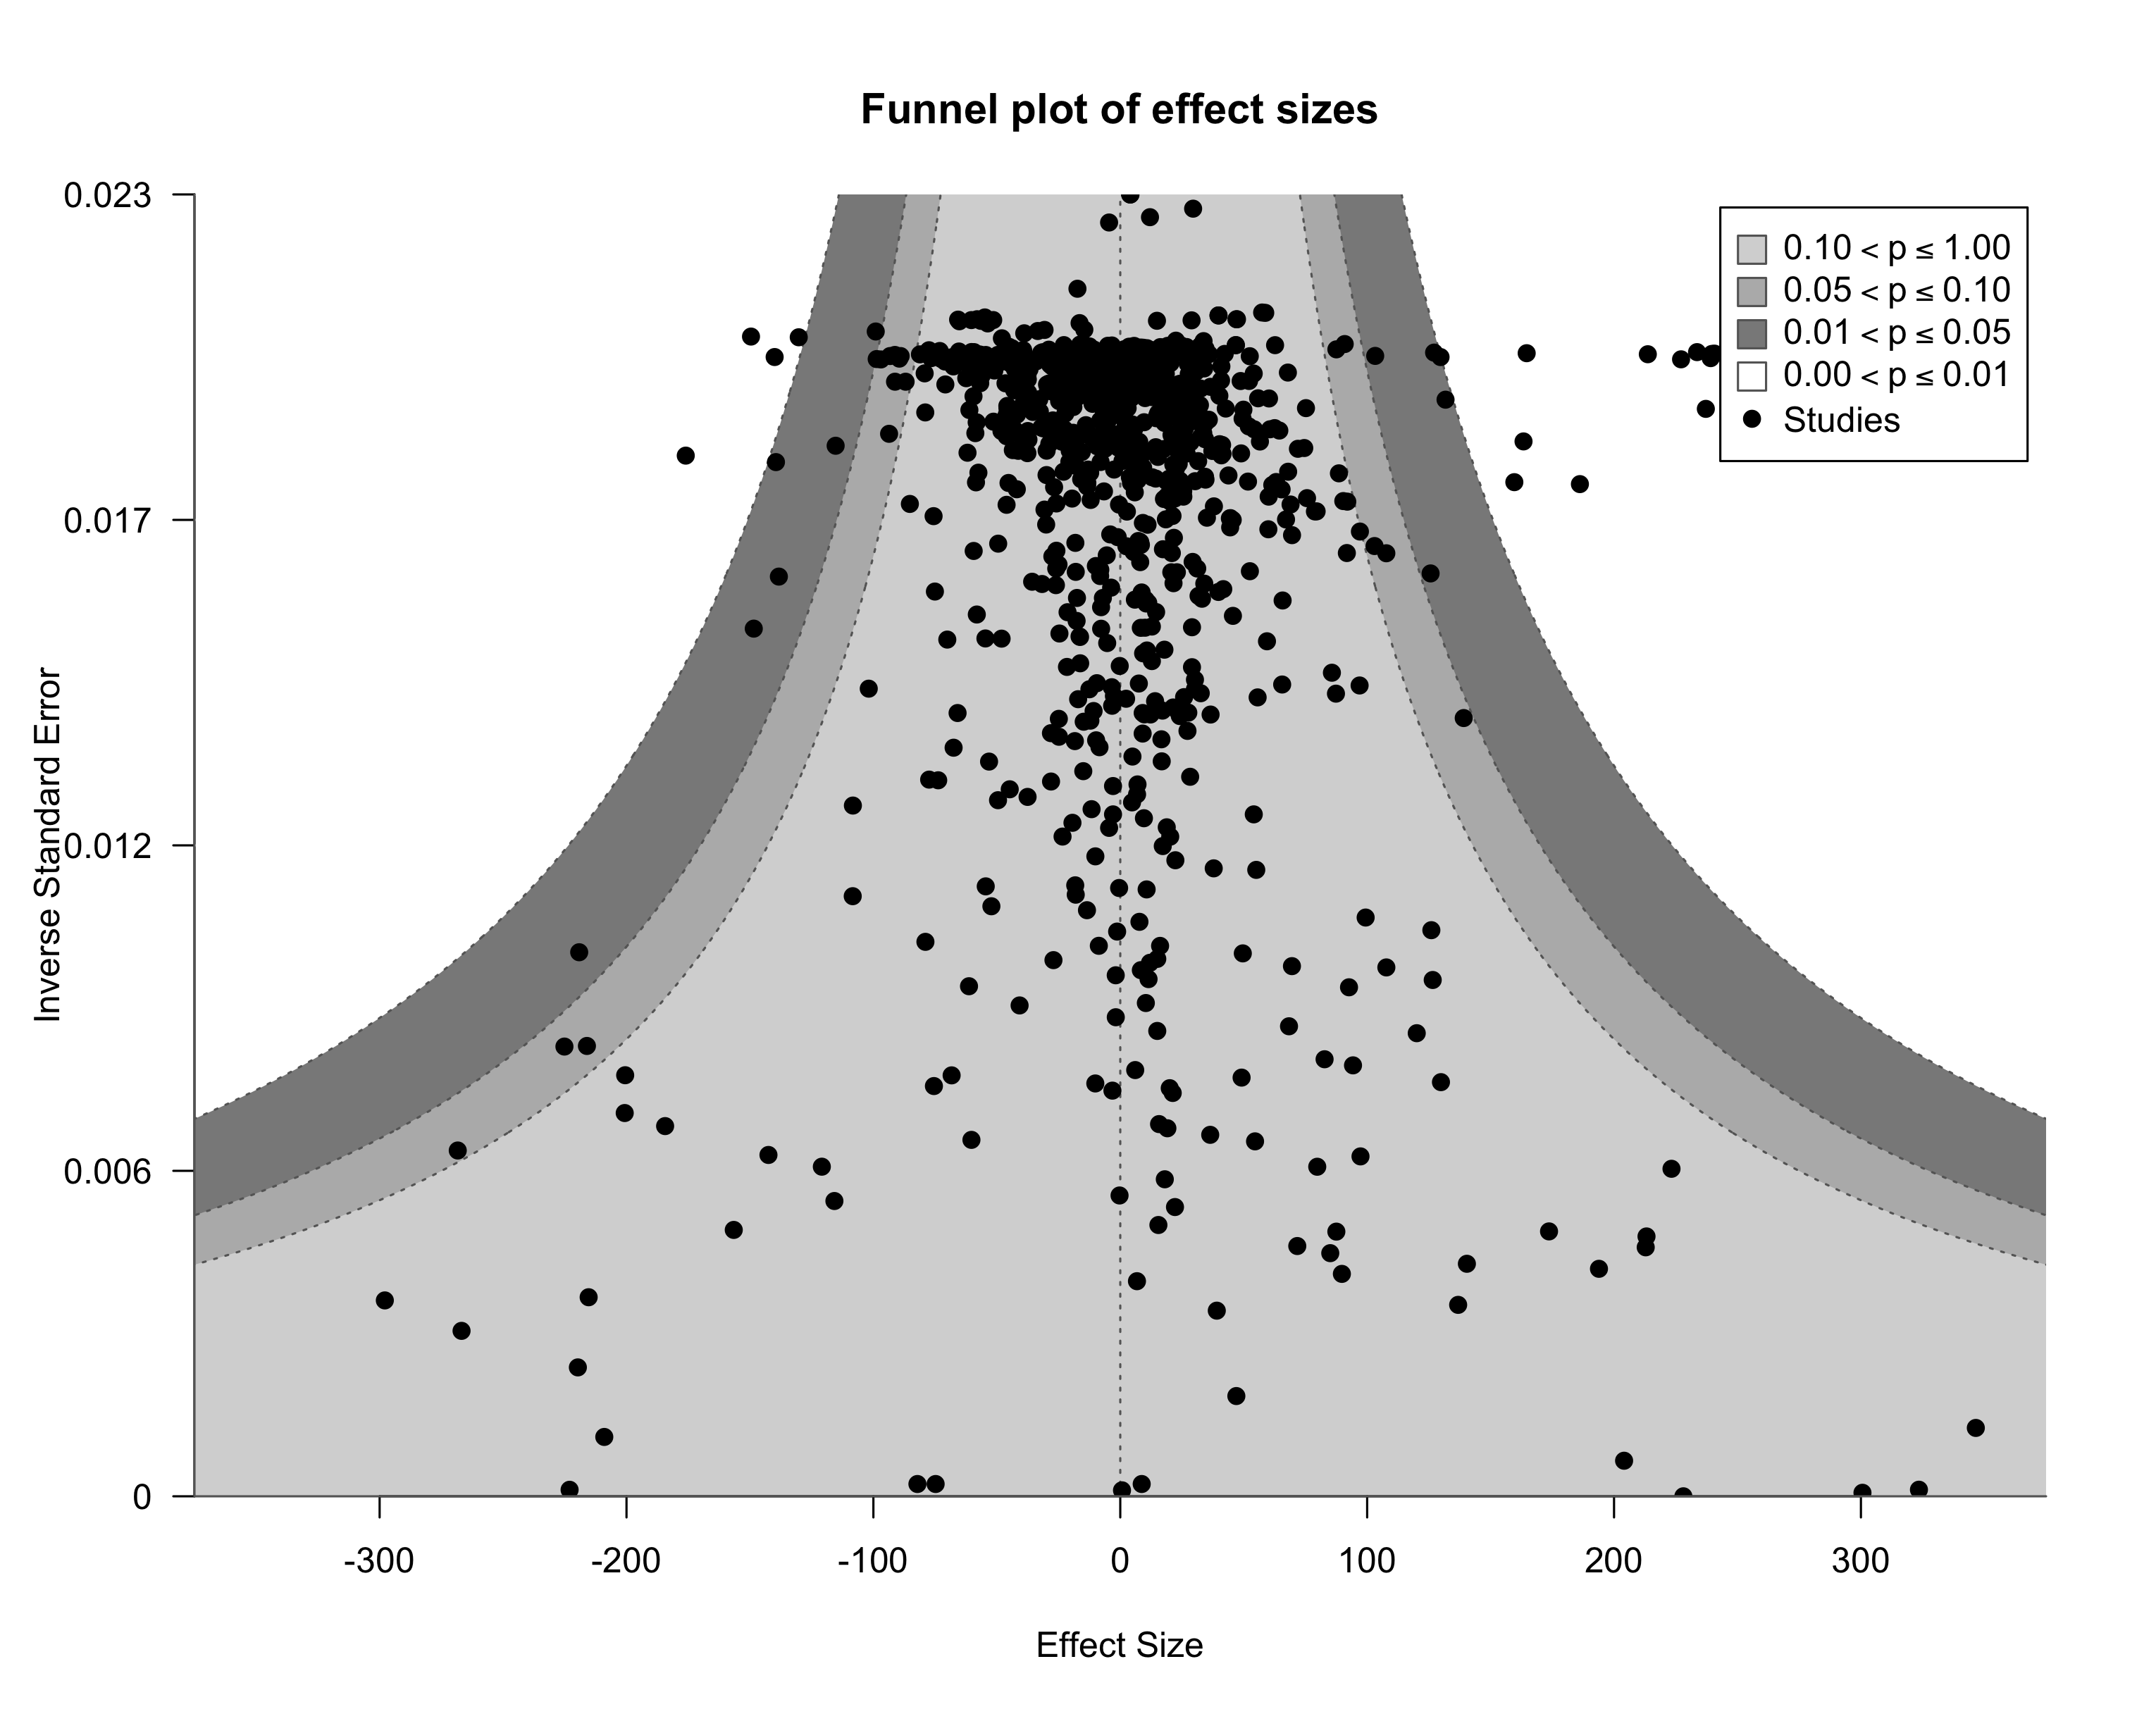

In [20]:
### FUNNEL PLOTTING FOR PUBLICATION BIAS
analysis_plot.plot_funnel_from_model(
    interaction_cg_model,
    main="Funnel plot of effect sizes",
    effect_type="Effect Size",
    shade_colors=["#d6d6d6", "#b8b8b8", "#8a8a8a"],
    back_color="white",
    level=[0.1, 0.05, 0.01],
    legend=True,
    hlines=[0],
    yaxis="seinv",
    digits=[1, 3],
    las=1,
    xaxs="i",
    yaxs="i",
    xlim=[
        -max(
            abs(interaction_cg_df[effect_type].min()),
            abs(interaction_cg_df[effect_type].max()),
        ),
        max(
            abs(interaction_cg_df[effect_type].min()),
            abs(interaction_cg_df[effect_type].max()),
        ),
    ],
    ylim=[0, 4],
    plot_in_python=True,
    figsize=(10, 8),
    save_path=config.fig_dir / "benthic_organsism_funnel_plot.png",
)

##### Interpretation

TODO

## More formally: using MuMIn

In [21]:
# ### scan potential interactive models via MuMIn dredge
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(working_effects_df, treatment = ['phtot', 'temp', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ delta_ph + delta_t", n_cores=16)

In [22]:
# ### scan potential interactive models via MuMIn dredge
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(working_effects_df, treatment = ['phtot', 'temp', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ delta_ph * delta_t", n_cores=16)

In [23]:
# ### scan potential interactive models via MuMIn dredge (absolute values)
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(working_effects_df, treatment=['temp', 'phtot', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ phtot + temp", n_cores=16)

In [24]:
# ### scan potential interactive models via MuMIn dredge (absolute values)
# temp_formula, temp_df = analysis.preprocess_df_for_meta_model(working_effects_df, treatment=['temp', 'phtot', 'phtot_temp_mv'])
# analysis.run_parallel_dredge(temp_df, global_formula=f"{effect_type} ~ phtot * temp", n_cores=16)

In [25]:
### scan potential interactive models via MuMIn dredge (absolute values)
temp_formula, temp_df = analysis.preprocess_df_for_meta_model(
    working_effects_df, treatment=["temp", "phtot", "phtot_temp_mv"]
)
analysis.run_parallel_dredge(
    temp_df,
    global_formula=f"{effect_type} ~ phtot * temp + factor(core_grouping)",
    n_cores=16,
)


----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 9 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11


/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "duration". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "loc". Fall back to string conversion. The error is: <class 'tuple'>

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "notes++". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() 

st_relative_calcification ~ phtot * temp + factor(core_grouping)


R[write to console]: Fixed term is "(Intercept)"

R[write to console]: In addition: 
R[write to console]: There were 11 warnings (use warnings() to see them)
R[write to console]: 



(Intercept)  factor(core_grouping)     phtot      temp  phtot:temp  df  \
16            1                    1.0  4.686587  0.951071   -0.134959  10   
8             1                    1.0  0.832205 -0.101229         NaN   9   
15            1                    NaN  4.326093  0.861080   -0.123120   6   
7             1                    NaN  0.811982 -0.098867         NaN   5   
4             1                    1.0  0.721122       NaN         NaN   8   
3             1                    NaN  0.704416       NaN         NaN   4   
6             1                    1.0       NaN -0.099119         NaN   8   
5             1                    NaN       NaN -0.097023         NaN   4   
2             1                    1.0       NaN       NaN         NaN   7   
1             1                    NaN       NaN       NaN         NaN   3   

         logLik         AICc       delta        weight  
16 -1248.536480  2517.349342    0.000000  6.879765e-01  
8  -1250.734038  2519.693922    2.344580  2.130368e-01  
15 -1254.872894  2521.850788    4.501445  7.245981e-02  
7  -1256.895536  2523.865977    6.516635  2.645479e-02  
4  -1259.880816  2535.942084   18.592742  6.312641e-05  
3  -1265.896098  2539.842071   22.492729  8.981309e-06  
6  -1442.175712  2900.507269  383.157927  4.324013e-84  
5  -1448.356549  2904.756202  387.406860  5.167053e-85  
2  -1454.731454  2923.583990  406.234648  4.215418e-89  
1  -1460.640826  2927.307487  409.958145  6.550788e-90

In [26]:
### scan potential interactive models via MuMIn dredge (absolute values and core groupings)
temp_formula, temp_df = analysis.preprocess_df_for_meta_model(
    working_effects_df, treatment=["temp", "phtot", "phtot_temp_mv"]
)
analysis.run_parallel_dredge(
    temp_df, global_formula="hedges_g ~ temp * phtot + delta_t * delta_ph", n_cores=16
)


----- PROCESSING SUMMARY -----
Treatment:  ['temp', 'phtot', 'phtot_temp_mv']
Total samples in input data:  1238
Total samples of relevant investigation:  942
Dropped due to NaN values in required columns: 0
Final sample count: 942 (296 rows dropped)

Removed 9 outlier(s) (from 942 samples) based on Cook's distance threshold of 0.11


/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "duration". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "loc". Fall back to string conversion. The error is: <class 'tuple'>

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "notes++". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() 

hedges_g ~ temp * phtot + delta_t * delta_ph


R[write to console]: Fixed term is "(Intercept)"

R[write to console]: In addition: 
R[write to console]: There were 26 warnings (use warnings() to see them)
R[write to console]: 



(Intercept)  delta_ph   delta_t     phtot      temp  delta_ph:delta_t  \
64            1  0.860936 -0.020475  5.983321  1.608907          0.115515   
48            1  0.941263 -0.046895  3.992686  1.034992               NaN   
46            1  1.113258       NaN  3.677746  0.967906               NaN   
47            1       NaN -0.057541  4.590926  0.963908               NaN   
32            1  0.864994 -0.060651  0.120609 -0.076429         -0.073904   
16            1  0.750589 -0.042098  0.114510 -0.075582               NaN   
14            1  0.912341       NaN -0.062243 -0.104979               NaN   
45            1       NaN       NaN  4.326093  0.861080               NaN   
15            1       NaN -0.050976  0.838531 -0.064591               NaN   
13            1       NaN       NaN  0.811982 -0.098867               NaN   
24            1  0.364043 -0.132552  0.604762       NaN         -0.069268   
8             1  0.261581 -0.114392  0.594365       NaN               NaN   
7             1       NaN -0.113653  0.846243       NaN               NaN   
6             1  0.041234       NaN  0.664570       NaN               NaN   
5             1       NaN       NaN  0.704416       NaN               NaN   
12            1  0.849379  0.009134       NaN -0.119817               NaN   
28            1  0.898062  0.004848       NaN -0.120411         -0.032383   
10            1  0.852396       NaN       NaN -0.112718               NaN   
4             1  0.827872 -0.102737       NaN       NaN               NaN   
20            1  0.856227 -0.105560       NaN       NaN         -0.018852   
11            1       NaN  0.021813       NaN -0.114024               NaN   
9             1       NaN       NaN       NaN -0.097023               NaN   
3             1       NaN -0.085092       NaN       NaN               NaN   
2             1  0.663190       NaN       NaN       NaN               NaN   
1             1       NaN       NaN       NaN       NaN               NaN   

    phtot:temp  df       logLik         AICc       delta        weight  
64   -0.215499   9 -1249.417141  2517.060129    0.000000  3.069124e-01  
48   -0.142185   8 -1250.667117  2517.514685    0.454556  2.445169e-01  
46   -0.137773   7 -1252.508536  2519.157248    2.097119  1.075550e-01  
47   -0.131347   7 -1252.823343  2519.786861    2.726732  7.850765e-02  
32         NaN   8 -1251.832888  2519.846226    2.786097  7.621160e-02  
16         NaN   7 -1252.968051  2520.076276    3.016147  6.793074e-02  
14         NaN   6 -1254.733624  2521.572249    4.512119  3.215290e-02  
45   -0.123120   6 -1254.872894  2521.850788    4.790658  2.797281e-02  
15         NaN   6 -1254.979075  2522.063149    5.003020  2.515489e-02  
13         NaN   5 -1256.895536  2523.865977    6.805848  1.021276e-02  
24         NaN   7 -1254.917919  2523.976014    6.915885  9.666050e-03  
8          NaN   6 -1256.028084  2524.161167    7.101038  8.811373e-03  
7          NaN   5 -1257.741056  2525.557019    8.496890  4.384682e-03  
6          NaN   5 -1264.211197  2538.497301   21.437172  6.791906e-06  
5          NaN   4 -1265.896098  2539.842071   22.781942  3.467197e-06  
12         NaN   6 -1436.204047  2884.498807  367.438678  4.997113e-81  
28         NaN   7 -1435.190745  2884.502572  367.442443  4.987717e-81  
10         NaN   5 -1437.827876  2885.720477  368.660348  2.712920e-81  
4          NaN   5 -1442.642480  2895.349685  378.289556  2.200296e-83  
20         NaN   6 -1441.643984  2895.378681  378.318552  2.168625e-83  
11         NaN   5 -1446.532921  2903.130568  386.070438  4.496596e-85  
9          NaN   4 -1448.356549  2904.756202  387.696073  1.994719e-85  
3          NaN   4 -1452.441866  2912.926836  395.866707  3.354681e-87  
2          NaN   4 -1453.774879  2915.592862  398.532733  8.845674e-88  
1          NaN   3 -1460.640826  2927.307487  410.247358  2.528905e-90

#### MuMIn interpretation

- Index – model number (simply position in the queue of permutations).
- df (degrees of freedom) – number of moderators in the model (i.e., the number of predictors or independent variables included).
- logLik (log likelihood) – measure of model fit; higher values indicate a better fit to the data. A very negative log likelihood isn't inherently a problem; it often occurs when the scale of the data or the number of observations is large. What matters is the relative comparison of log likelihoods between models, as it is used to compute metrics like such as AIC (Akaike Information Criterion)
- AICc (corrected AIC) – measure of model fit which rewards good fit and penalises model complexity (number of parameters): lower is better.
- delta – difference between the AICc of the current model and the AICc of the best-performing model (delta = 0 for the best model).
- weight – the relative likelihood of the model compared to all other models in the set, normalized to sum to 1 (useful for model averaging).
- Additional Notes:
    - logLik is particularly useful for comparing nested models.
    - AICc is preferred over AIC for small sample sizes, as it includes a correction for finite sample sizes.
    - delta values:
        - models with delta < 2 are considered to have substantial support.
        - models with delta between 4 and 7 have considerably less support.
        - models with delta > 10 are unlikely to be good candidates.
    - weight can be interpreted as the probability that a given model is the best model in the set.

##### Interpretation of model statistics:


'Test of Moderators'
- quantification of the extent to which a set of moderators collectively explain a significant amount of variation in the outcome variable.


## Incorporating climatology into regressions

In [27]:
### combine climatology and effects DataFrames, keeping only the first occurrence of shared columns
working_clim_effects_df = (
    working_clim_df.reset_index()
    .drop_duplicates(
        subset=["longitude", "latitude"],
        keep="first",
    )
    .merge(
        working_effects_df,
        how="right",
        left_on=["longitude", "latitude"],
        right_on=["longitude", "latitude"],
        suffixes=("", "_duplicate"),
    )
)

# drop duplicate columns (those with '_duplicate' suffix)
working_clim_effects_df = working_clim_effects_df.loc[
    :, ~working_clim_effects_df.columns.str.endswith("_duplicate")
]

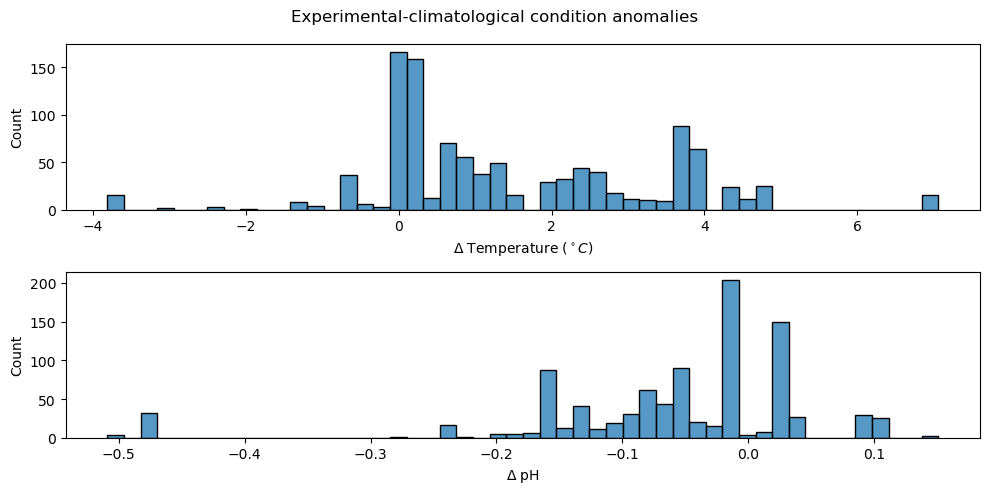

In [28]:
### calculate delta_t_clim and delta_ph_clim (mean_historical_sst_30y_ensemble and mean_historical_ph_30y_ensemble minus the phtot and temp columns)
working_clim_effects_df["delta_t_clim"] = (
    working_clim_effects_df["temp"]
    - working_clim_effects_df["mean_historical_sst_30y_ensemble"]
)
working_clim_effects_df["delta_ph_clim"] = (
    working_clim_effects_df["phtot"]
    - working_clim_effects_df["mean_historical_ph_30y_ensemble"]
)

# plot histograms of delta_t_clim and delta_ph_clim
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
# plot
sns.histplot(
    data=working_clim_effects_df,
    x="delta_t_clim",
    bins=50,
    ax=axes[0],
)
sns.histplot(
    data=working_clim_effects_df,
    x="delta_ph_clim",
    bins=50,
    ax=axes[1],
)
# format
axes[0].set_xlabel("$\\Delta$ Temperature ($^\\circ C$)")
axes[1].set_xlabel("$\\Delta$ pH")
plt.suptitle("Experimental-climatological condition anomalies")
plt.tight_layout()

In [29]:
# group the working_df by doi, irr, and species_type, then get the average temp and phtot of the cTcP group
control_vals = (
    working_df[working_df.treatment_group == "cTcP"]
    .groupby(["doi", "irr", "species_types"])
    .agg({"temp": "mean", "phtot": "mean"})
    .reset_index()
)

# join control values to working_clim_effects_df
working_clim_effects_controls_df = working_clim_effects_df.merge(
    control_vals,
    how="left",
    on=["doi", "irr", "species_types"],
    suffixes=("", "_CONTROL"),
)
# calculate delta_t_clim and delta_ph_clim (mean_historical_sst_30y_ensemble and mean_historical_ph_30y_ensemble minus the phtot and temp columns)
working_clim_effects_controls_df["delta_t_clim_control"] = (
    working_clim_effects_controls_df["temp_CONTROL"]
    - working_clim_effects_controls_df["mean_historical_sst_30y_ensemble"]
)
working_clim_effects_controls_df["delta_ph_clim_control"] = (
    working_clim_effects_controls_df["phtot_CONTROL"]
    - working_clim_effects_controls_df["mean_historical_ph_30y_ensemble"]
)


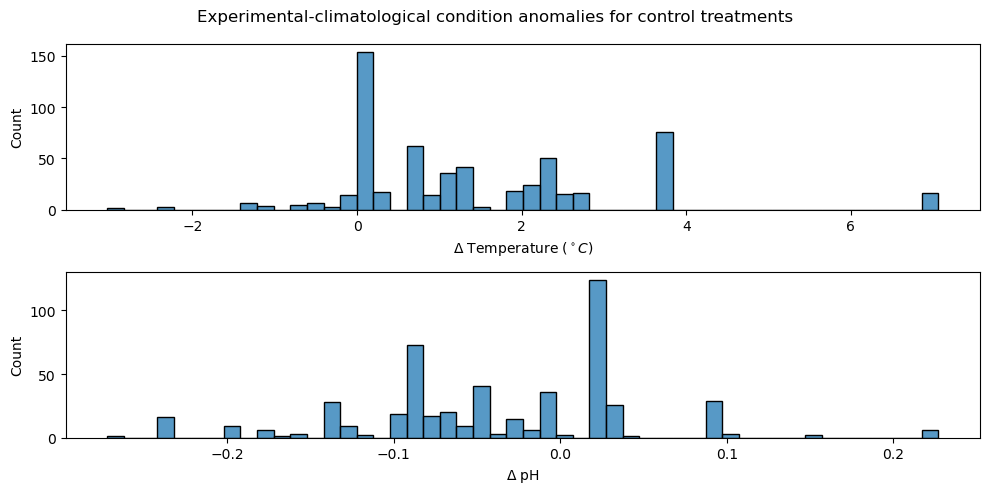

In [30]:
# calculate delta_t_clim and delta_ph_clim (mean_historical_sst_30y_ensemble and mean_historical_ph_30y_ensemble minus the phtot and temp columns)

# extreme values here are people doing experiments on corals outside their natural range, or investigating e.g. the whole range of conditions. The latter would justify assigning controls based on the values closest to the long-term climatology. Don't particularly want to get into that at this late stage...

# plot histograms of delta_t_clim and delta_ph_clim
fig, axes = plt.subplots(2, 1, figsize=(10, 5))
# Plot delta_t_clim
sns.histplot(
    data=working_clim_effects_controls_df,
    x="delta_t_clim_control",
    bins=50,
    ax=axes[0],
)
axes[0].set_xlabel("$\\Delta$ Temperature ($^\\circ C$)")
# Plot delta_ph_clim
sns.histplot(
    data=working_clim_effects_controls_df,
    x="delta_ph_clim_control",
    bins=50,
    ax=axes[1],
)
axes[1].set_xlabel("$\\Delta$ pH")
plt.suptitle("Experimental-climatological condition anomalies for control treatments")
plt.tight_layout()

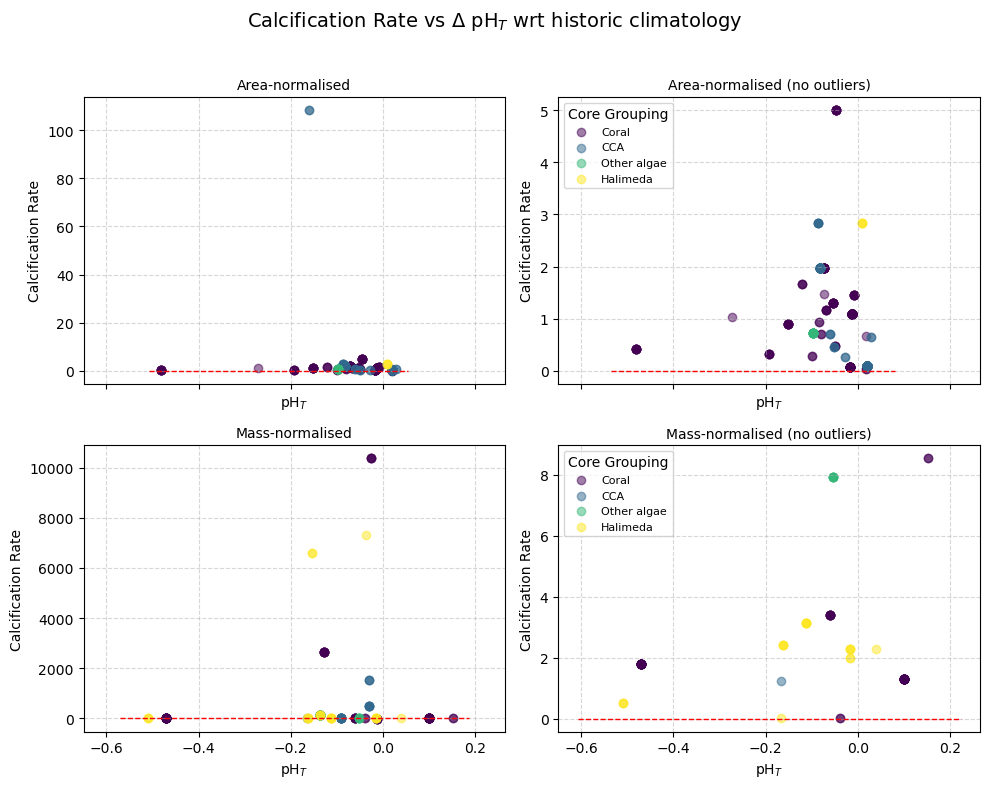

In [31]:
### TODO: does it make sense just to plot climatology anomalies against raw calcification rates?

### scatter of climatology anomalies against calcification rates
area_norm_clim_df = working_clim_effects_df[
    working_clim_effects_df["st_calcification_unit"] == "mgCaCO3 cm-2d-1"
].copy()
mass_norm_clim_df = working_clim_effects_df[
    working_clim_effects_df["st_calcification_unit"] == "mgCaCO3 g-1d-1"
].copy()

# TODO: these currently assigned by sight due to large inherent variance
area_norm_clim_no_outliers_df = area_norm_clim_df[
    (area_norm_clim_df.st_calcification > -10)
    & (area_norm_clim_df.st_calcification < 10)
]
mass_norm_clim_no_outliers_df = mass_norm_clim_df[
    (mass_norm_clim_df.st_calcification > -10)
    & (mass_norm_clim_df.st_calcification < 10)
]

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
group_color_map = {
    group: color
    for group, color in zip(
        area_norm_clim_df["core_grouping"].dropna().unique(),
        plt.cm.viridis(np.linspace(0, 1, area_norm_clim_df["core_grouping"].nunique())),
    )
}

plots = [
    (0, 0, area_norm_clim_df, "Area-normalised"),
    (0, 1, area_norm_clim_no_outliers_df, "Area-normalised (no outliers)"),
    (1, 0, mass_norm_clim_df, "Mass-normalised"),
    (1, 1, mass_norm_clim_no_outliers_df, "Mass-normalised (no outliers)"),
]

for row, col, df, title in plots:
    ax = axes[row][col]
    for group, color in group_color_map.items():
        subset = df[df["core_grouping"] == group]
        ax.scatter(
            subset["delta_ph_clim"],
            subset["st_calcification"],
            color=color,
            label=group,
            alpha=0.5,
        )
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("pH$_T$")
    ax.set_ylabel("Calcification Rate")
    ax.grid(ls="--", alpha=0.5)
    ax.hlines(0, *ax.get_xlim(), color="red", linestyle="--", linewidth=1)
    if col == 1:
        ax.legend(title="Core Grouping", loc="upper left", fontsize=8)

fig.suptitle(
    "Calcification Rate vs $\\Delta$ pH$_T$ wrt historic climatology", fontsize=14
)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


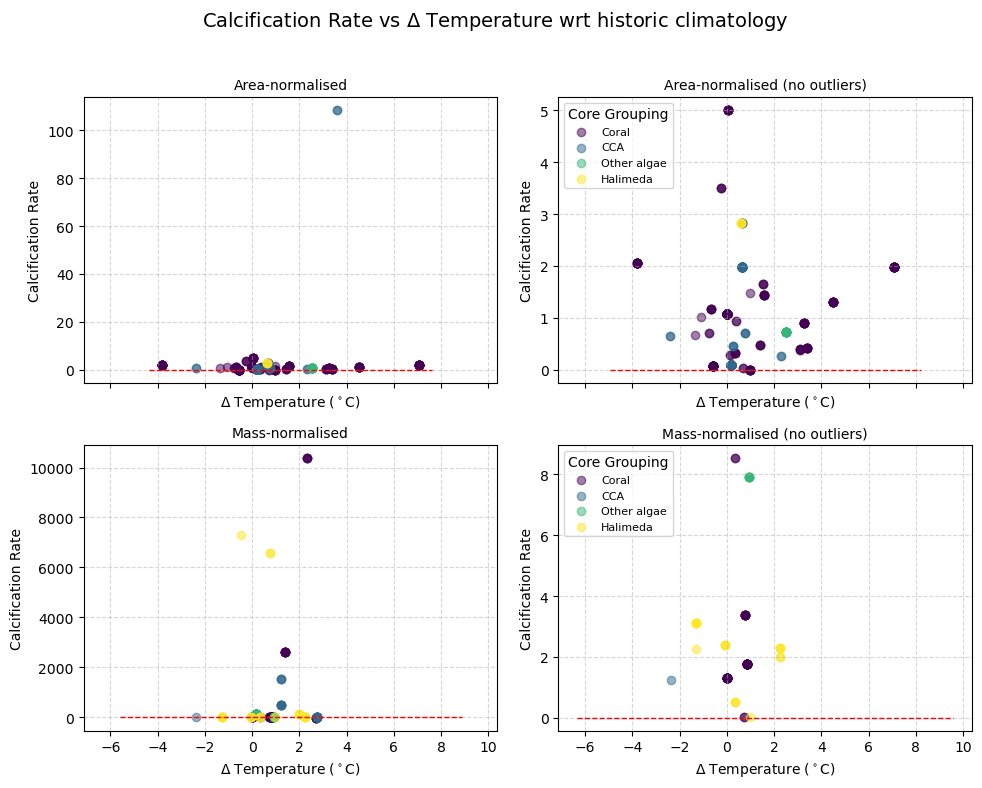

In [32]:
### wrt temperature climatology
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
group_color_map = {
    group: color
    for group, color in zip(
        area_norm_clim_df["core_grouping"].dropna().unique(),
        plt.cm.viridis(np.linspace(0, 1, area_norm_clim_df["core_grouping"].nunique())),
    )
}

plots = [
    (0, 0, area_norm_clim_df, "Area-normalised"),
    (0, 1, area_norm_clim_no_outliers_df, "Area-normalised (no outliers)"),
    (1, 0, mass_norm_clim_df, "Mass-normalised"),
    (1, 1, mass_norm_clim_no_outliers_df, "Mass-normalised (no outliers)"),
]

for row, col, df, title in plots:
    ax = axes[row][col]
    for group, color in group_color_map.items():
        subset = df[df["core_grouping"] == group]
        ax.scatter(
            subset["delta_t_clim"],
            subset["st_calcification"],
            color=color,
            label=group,
            alpha=0.5,
        )
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("$\\Delta$ Temperature ($^\\circ$C)")
    ax.set_ylabel("Calcification Rate")
    ax.grid(ls="--", alpha=0.5)
    ax.hlines(0, *ax.get_xlim(), color="red", linestyle="--", linewidth=1)
    if col == 1:
        ax.legend(title="Core Grouping", loc="upper left", fontsize=8)

fig.suptitle(
    "Calcification Rate vs $\\Delta$ Temperature wrt historic climatology", fontsize=14
)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # leave space for suptitle
plt.show()


## Extending to predictions

In [ ]:
### IDEAL
# temp_out = pd.DataFrame(
#     analysis.generate_location_specific_predictions(
#         model=interaction_cg_model,
#         df=working_clim_df,
#         scenario_var="sst",
#         moderator_pos=2,
#     )
# )

# temp_out[temp_out["percentile"] == "mean"].predicted_effect_size

Generating batched predictions for sst:   0%|          | 0/117 [00:00<?, ?it/s]

R[write to console]: Error in predict.rma(list(b = c(68.5931676329693, -4.9451359757521, -14.6966578395842,  : 
  Dimensions of 'newmods' (7) do not the match dimensions of the model (8).



RRuntimeError: Error in predict.rma(list(b = c(68.5931676329693, -4.9451359757521, -14.6966578395842,  : 
  Dimensions of 'newmods' (7) do not the match dimensions of the model (8).


In [ ]:
# sst_all = pd.DataFrame(
#     analysis.generate_location_specific_predictions(
#         model=interaction_cg_model, df=working_clim_df, scenario_var="sst"
#     )
# )
# sst_preds = (
#     sst_all.groupby(["scenario", "time_frame", "percentile"])[
#         ["anomaly_value", "predicted_effect_size"]
#     ]
#     .mean()
#     .reset_index()
# )
# sst_preds_shortform = sst_preds.pivot(
#     index=["scenario", "time_frame"],
#     columns="percentile",
#     values=["anomaly_value", "predicted_effect_size"],
# )
# sst_preds_shortform.columns = [
#     "_".join(col).strip() for col in sst_preds_shortform.columns.values
# ]
# sst_preds_shortform.reset_index(inplace=True)
# # sst_preds_shortform.set_index(['scenario', 'time_frame'], inplace=True)

# ph_all = pd.DataFrame(
#     analysis.generate_location_specific_predictions(
#         model=interaction_cg_model, df=working_clim_df, scenario_var="ph"
#     )
# )
# ph_preds = (
#     ph_all.groupby(["scenario", "time_frame", "percentile"])[
#         ["anomaly_value", "predicted_effect_size"]
#     ]
#     .mean()
#     .reset_index()
# )
# ph_preds_shortform = ph_preds.pivot(
#     index=["scenario", "time_frame"],
#     columns="percentile",
#     values=["anomaly_value", "predicted_effect_size"],
# )
# ph_preds_shortform.columns = [
#     "_".join(col).strip() for col in ph_preds_shortform.columns.values
# ]
# ph_preds_shortform.reset_index(inplace=True)
# # ph_preds_shortform.set_index(['scenario', 'time_frame'], inplace=True)
# ph_preds_shortform["scenario_var"] = "ph"
# sst_preds_shortform["scenario_var"] = "sst"

# predictions_shortform = pd.concat([sst_preds_shortform, ph_preds_shortform], axis=0)
# spatial_predictions = pd.concat([sst_all, ph_all], axis=0)

In [ ]:
### TODO: visualise prediction of each model component. Requires more flexible function which takes each model component and plots it
# _,_ = plotting.plot_global_timeseries(predictions_shortform, plot_vars=['sst', 'ph'], figsize=(10, 10), dpi=300)

## Investigating groupings

In [34]:
### create a dataframe for each grouping
coral_effects_df = working_effects_df[working_effects_df.core_grouping == "Coral"]
cca_effects_df = working_effects_df[working_effects_df.core_grouping == "CCA"]
foraminifera_effects_df = working_effects_df[
    working_effects_df.core_grouping == "Foraminifera"
]
other_algae_effects_df = working_effects_df[
    working_effects_df.core_grouping == "Other algae"
]
halimeda_effects_df = working_effects_df[working_effects_df.core_grouping == "Halimeda"]


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  867
Total samples of relevant investigation:  683
Dropped due to NaN values in required columns: 0
Final sample count: 683 (184 rows dropped)

Removed 11 outlier(s) (from 683 samples) based on Cook's distance threshold of 0.13
Using formula st_relative_calcification ~ delta_ph + delta_t

Running metafor model...


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 2: Extra argument ('useS4') disregarded. 



Model fitting complete.

Multivariate Meta-Analysis Model (k = 672; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-3348.5651   6697.1301   6707.1301   6729.6591   6707.2206   

Variance Components:

              estim     sqrt  nlvls  fixed           factor 
sigma^2.1  374.5688  19.3538     77     no     original_doi 
sigma^2.2  488.5712  22.1036    672     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 669) = 27044.4950, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 28.7923, p-val < .0001

Model Results:

          estimate      se     zval    pval     ci.lb    ci.ub      
intrcpt    -2.8810  3.7546  -0.7673  0.4429  -10.2398   4.4778      
delta_ph   36.1874  7.7411   4.6747  <.0001   21.0152  51.3596  *** 
delta_t    -3.1165  0.8874  -3.5118  0.0004   -4.8559  -1.3772  *** 

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1




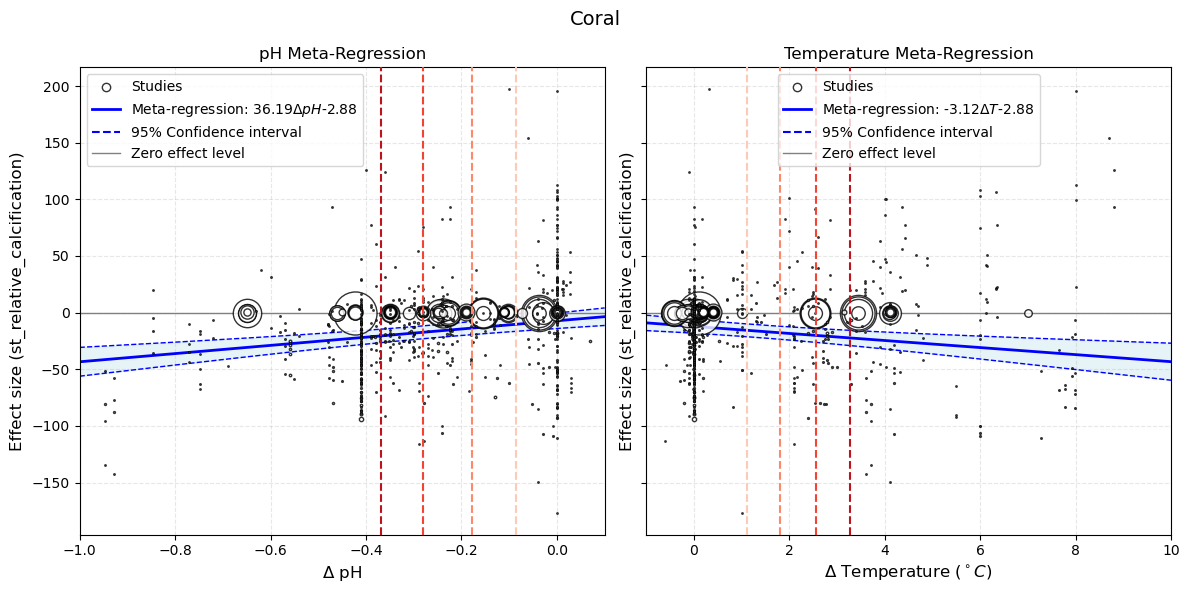

In [35]:
### CORAL
coral_model, coral_model_summary, coral_model_formula, _ = analysis.run_metafor_mv(
    coral_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph + delta_t",
)
print(coral_model_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

var = "phtot"  # Plot the pH meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=coral_model,
    model_comps=analysis.get_formula_components(coral_model_formula),
    x_mod="delta_ph",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var=scenario_var,
)
axes[0].set_title("pH Meta-Regression")
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)


var = "temp"  # Plot the temperature meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=coral_model,
    model_comps=analysis.get_formula_components(coral_model_formula),
    x_mod="delta_t",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[1],
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)
axes[1].set_title("Temperature Meta-Regression")

plt.suptitle("Coral", fontsize=14)
plt.tight_layout()
plt.show()

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 2: Extra argument ('useS4') disregarded. 




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  217
Total samples of relevant investigation:  161
Dropped due to NaN values in required columns: 0
Final sample count: 161 (56 rows dropped)

Removed 4 outlier(s) (from 161 samples) based on Cook's distance threshold of 0.28
Using formula st_relative_calcification ~ delta_ph + delta_t

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 157; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-812.1938  1624.3877  1634.3877  1649.5724  1634.7931   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  2745.4253  52.3968     29     no     original_doi 
sigma^2.2   666.3165  25.8131    157     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 154) = 17021.4987, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 20.0132, p-val < .0001

Model Results:

     

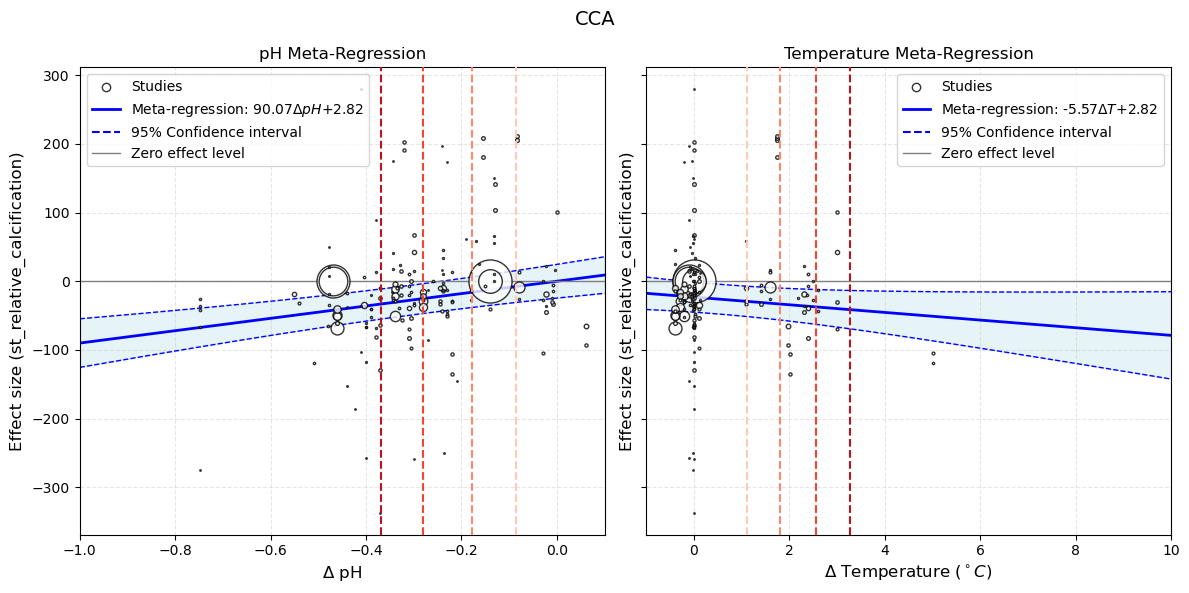

In [36]:
### CCA
cca_model, cca_model_summary, cca_model_formula, _ = analysis.run_metafor_mv(
    cca_effects_df,
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph + delta_t",
)
print(cca_model_summary)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

var = "phtot"  # Plot the pH meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=cca_model,
    model_comps=analysis.get_formula_components(cca_model_formula),
    x_mod="delta_ph",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var=scenario_var,
)
axes[0].set_title("pH Meta-Regression")
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

var = "temp"  # Plot the temperature meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=cca_model,
    model_comps=analysis.get_formula_components(cca_model_formula),
    x_mod="delta_t",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[1],
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)
axes[1].set_title("Temperature Meta-Regression")

plt.suptitle("CCA", fontsize=14)
plt.tight_layout()
plt.show()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Extra argument ('useS4') disregarded. 




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  31
Total samples of relevant investigation:  21
Dropped due to NaN values in required columns: 0
Final sample count: 21 (10 rows dropped)

Removed 0 outlier(s) (from 21 samples) based on Cook's distance threshold of 0.82
Using formula st_relative_calcification ~ delta_ph + delta_t

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 21; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-101.9213   203.8427   213.8427   218.2945   218.8427   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  3707.5714  60.8898      7     no     original_doi 
sigma^2.2  2274.1000  47.6875     21     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 18) = 902.7238, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 6.8254, p-val = 0.0330

Model Results:

          est

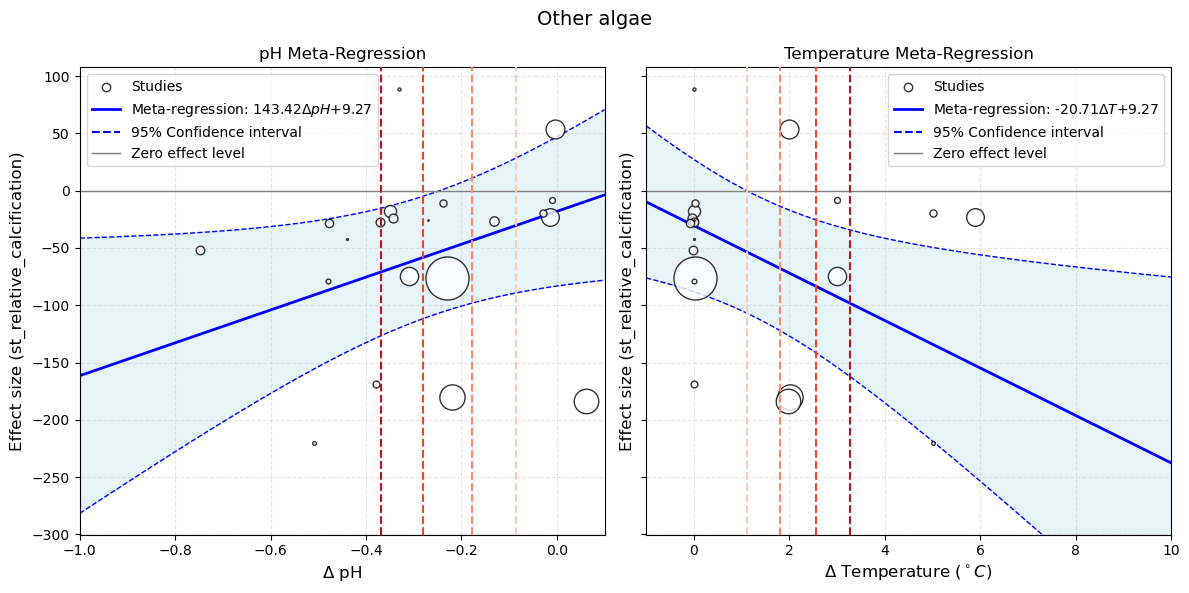

In [37]:
### OTHER ALGAE
other_algae_model, other_algae_model_summary, other_algae_model_formula, _ = (
    analysis.run_metafor_mv(
        other_algae_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph + delta_t",
    )
)

print(other_algae_model_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

var = "phtot"  # Plot the pH meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=other_algae_model,
    model_comps=analysis.get_formula_components(other_algae_model_formula),
    x_mod="delta_ph",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var=scenario_var,
)
axes[0].set_title("pH Meta-Regression")
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)

var = "temp"  # Plot the temperature meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=other_algae_model,
    model_comps=analysis.get_formula_components(other_algae_model_formula),
    x_mod="delta_t",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[1],
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)
axes[1].set_title("Temperature Meta-Regression")

plt.suptitle("Other algae", fontsize=14)
plt.tight_layout()
plt.show()

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 

R[write to console]: 2: Extra argument ('useS4') disregarded. 




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  115
Total samples of relevant investigation:  69
Dropped due to NaN values in required columns: 0
Final sample count: 69 (46 rows dropped)

Removed 2 outlier(s) (from 69 samples) based on Cook's distance threshold of 0.43
Using formula st_relative_calcification ~ delta_ph + delta_t

Running metafor model...
Model fitting complete.

Multivariate Meta-Analysis Model (k = 67; method: REML)

   logLik   Deviance        AIC        BIC       AICc   
-378.7771   757.5541   767.5541   778.3486   768.5886   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1530.6081  39.1230     14     no     original_doi 
sigma^2.2  2322.5635  48.1930     67     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 64) = 12632.2229, p-val < .0001

Test of Moderators (coefficients 2:3):
QM(df = 2) = 4.7448, p-val = 0.0933

Model Results:

          

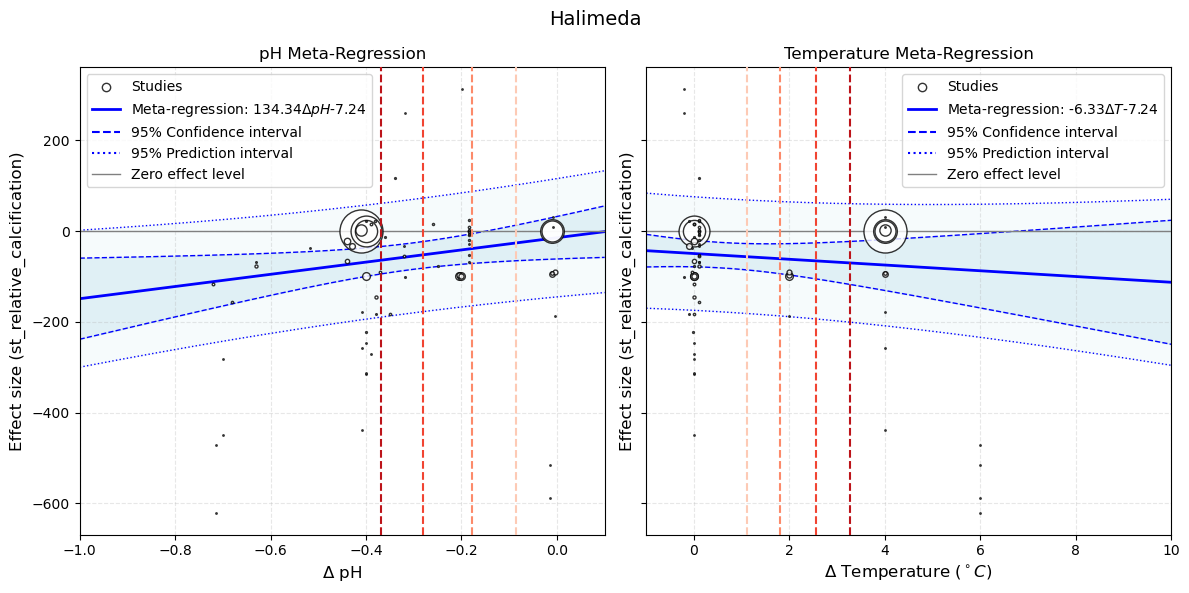

In [38]:
### HALIMEDA
halimeda_model, halimeda_model_summary, halimeda_model_formula, _ = (
    analysis.run_metafor_mv(
        halimeda_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph + delta_t",
    )
)
print(halimeda_model_summary)

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

var = "phtot"  # Plot the pH meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=halimeda_model,
    model_comps=analysis.get_formula_components(halimeda_model_formula),
    x_mod="delta_ph",
    pi=True,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var=scenario_var,
)
axes[0].set_title("pH Meta-Regression")
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)


var = "temp"  # Plot the temperature meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=halimeda_model,
    model_comps=analysis.get_formula_components(halimeda_model_formula),
    x_mod="delta_t",
    pi=True,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[1],
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)
axes[1].set_title("Temperature Meta-Regression")

plt.suptitle("Halimeda", fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
# TODO
analysis_utils.summarize_metafor_models(
    [
        interaction_cg_model_summary,
        coral_model_summary,
        cca_model_summary,
        other_algae_model_summary,
        halimeda_model_summary,
    ],
    ["all", "coral", "CCA", "Other Algae", "Halimeda"],
)


Model Log-likelihood Deviance   AIC  AICc QE stat QE p-val QM stat  \
0          all          -4844     9688  9708  9708   61559   0.0000     100   
1        coral          -3349     6697  6707  6707   27044   0.0000      29   
2          CCA           -812     1624  1634  1635   17021   0.0000      20   
3  Other Algae           -102      204   214   219     903   0.0000       7   
4     Halimeda           -379      758   768   769   12632   0.0000       5   

  QM p-val σ² (Study) σ² (Within)  
0   0.0000       1662         877  
1   0.0000        375         489  
2   0.0000       2745         666  
3   0.0330       3708        2274  
4   0.0933       1531        2323

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Redundant predictors dropped from the model. 




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  8
Total samples of relevant investigation:  8
Dropped due to NaN values in required columns: 0
Final sample count: 8 (0 rows dropped)

Removed 1 outlier(s) (from 8 samples) based on Cook's distance threshold of 1.15
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...
Model fitting complete.


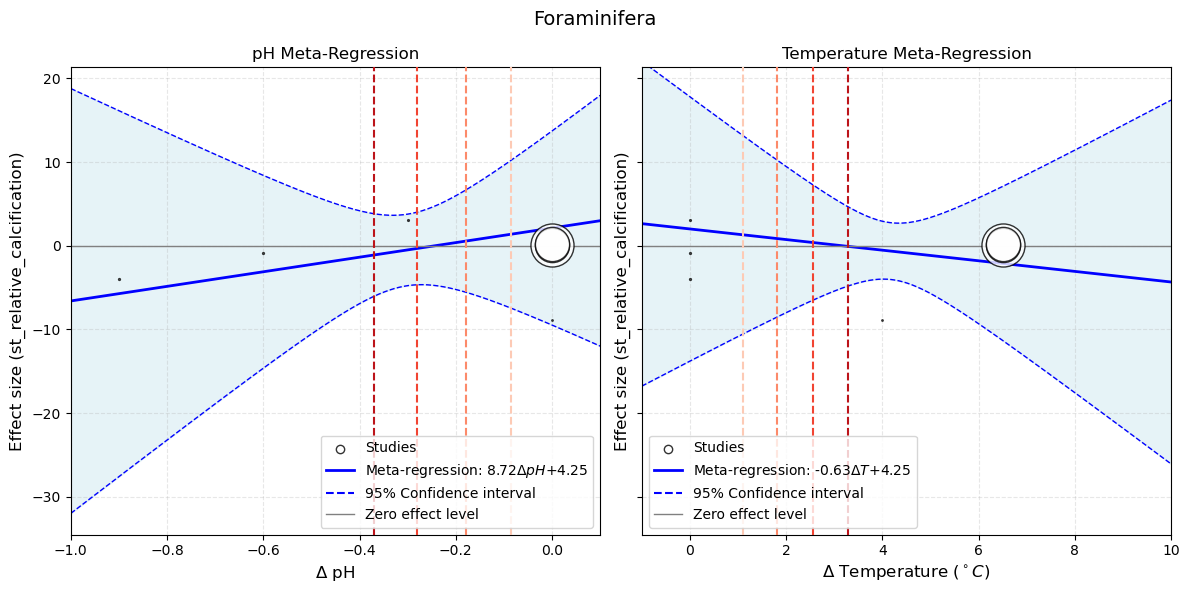

In [40]:
### FORAMINIFERA – INSUFFICIENT DATA
foraminifera_model, foraminifera_model_summary, foraminifera_model_formula, _ = (
    analysis.run_metafor_mv(
        foraminifera_effects_df,
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t",
    )
)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

var = "phtot"  # Plot the pH meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, ph_reg_ax = analysis_plot.meta_regplot(
    model=foraminifera_model,
    model_comps=analysis.get_formula_components(foraminifera_model_formula),
    x_mod="delta_ph",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[0],
    future_global_anomaly_df=future_global_anomaly_df,
    scenario_var=scenario_var,
)
axes[0].set_title("pH Meta-Regression")
plot_utils.add_climatology_lines_to_plot(
    ph_reg_ax, future_global_anomaly_df, scenario_var, xlim
)


var = "temp"  # Plot the temperature meta-regression
xlab, xlim, predlim, scenario_var = plot_utils.set_up_regression_plot(var)
reg_fig, temp_reg_ax = analysis_plot.meta_regplot(
    model=foraminifera_model,
    model_comps=analysis.get_formula_components(foraminifera_model_formula),
    x_mod="delta_t",
    pi=False,
    xlab=xlab,
    predlim=xlim,
    xlim=xlim,
    ax=axes[1],
)
plot_utils.add_climatology_lines_to_plot(
    temp_reg_ax, future_global_anomaly_df, scenario_var, xlim
)
axes[1].set_title("Temperature Meta-Regression")

plt.suptitle("Foraminifera", fontsize=14)
plt.tight_layout()
plt.show()

# Behind the scenes: additional model investigation

In [41]:
effect_type = "st_relative_calcification"  # redefine: can be played around with

# assign categorial levels to delta_t: <0.5 no change, 0.5-1.5 low, 1.5-2.5 medium, >2.5 high
working_effects_df["delta_t_category"] = working_effects_df["delta_t"].apply(
    processing.assign_delta_t_category
)
print(working_effects_df["delta_t_category"].value_counts())

# process single_control_df for r
single_control_df = working_effects_df[
    working_effects_df["treatment"].isin(["phtot", "temp", "phtot_temp_mv"])
].copy()
df_r_ready = analysis.process_df_for_r(single_control_df)

# Convert pandas dataframe to R dataframe
r_data = pandas2ri.py2rpy(df_r_ready)

delta_t_category
No change    751
High         297
Medium       125
Low           65
Name: count, dtype: int64


/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "cleaned_coords". Fall back to string conversion. The error is: Series can only be of one type, or None (and here we have <class 'float'> and <class 'str'>). If happening with a pandas DataFrame the method infer_objects() will normalize data types before conversion.

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "co3". Fall back to string conversion. The error is: <class 'float'>

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to convert the column "co3_sd". Fall back to string conversion. The error is: <class 'float'>

/Users/rt582/miniforge3/envs/calcer/lib/python3.13/site-packages/rpy2/robjects/pandas2ri.py:65: UserWarning:

Error while trying to conv

### Initialisation and ANOVAs

In [42]:
### INITIAL NAIVE MODELS

# Model 1: Base model with just species
r_model1 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(ro.Formula(f"{effect_type} ~ factor(core_grouping)")),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

# Model 2: Adding pH effects
r_model2 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(ro.Formula(f"{effect_type} ~ factor(core_grouping) + delta_ph")),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

# Model 3: temperature effects
r_model3 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(ro.Formula(f"{effect_type} ~ factor(core_grouping) + delta_t")),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

# Model 4: temperature and ph effects
r_model4 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(
        ro.Formula(f"{effect_type} ~ factor(core_grouping) + delta_ph + delta_t")
    ),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

# Model 5: Adding interaction between pH and temperature
r_model5 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(
        ro.Formula(f"{effect_type} ~ factor(core_grouping) + delta_ph * delta_t")
    ),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

# Model 6: temperature and ph effects alone
r_model6 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(ro.Formula(f"{effect_type} ~ delta_ph + delta_t")),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

# Model 7: interactive temperature and ph effects alone
r_model7 = metafor.rma_mv(
    yi=ro.FloatVector(r_data.rx2(effect_type)),
    V=ro.FloatVector(r_data.rx2(f"{effect_type}_var")),
    mods=ro.Formula(ro.Formula(f"{effect_type} ~ delta_ph * delta_t")),
    random=ro.Formula("~ 1 | original_doi/ID"),
    data=r_data,
)

In [43]:
### experimental anovas
print("MODEL 4")
print(base.summary(r_model4))
print("MODEL 5")
print(base.summary(r_model5))
anova45 = metafor.anova_rma(r_model4, r_model5)  # additive vs interactive
print(f"ANOVA\n{anova45}")

print("MODEL 6")
print(base.summary(r_model6))
print("MODEL 7")
print(base.summary(r_model7))
anova67 = metafor.anova_rma(r_model6, r_model7)  # additive vs interactive
print(f"ANOVA\n{anova67}")

MODEL 4

Multivariate Meta-Analysis Model (k = 942; method: REML)

    logLik    Deviance         AIC         BIC        AICc   
-4946.4301   9892.8603   9910.8603   9954.4252   9911.0548   

Variance Components:

               estim     sqrt  nlvls  fixed           factor 
sigma^2.1  1666.7699  40.8261    114     no     original_doi 
sigma^2.2   879.9251  29.6635    942     no  original_doi/ID 

Test for Residual Heterogeneity:
QE(df = 935) = 61629.1575, p-val < .0001

Test of Moderators (coefficients 2:7):
QM(df = 6) = 79.9615, p-val < .0001

Model Results:

                                   estimate       se     zval    pval     ci.lb 
intrcpt                            -17.5881   7.1060  -2.4751  0.0133  -31.5157 
factor(core_grouping)Coral          26.8922   6.2664   4.2915  <.0001   14.6103 
factor(core_grouping)Foraminifera   40.1442  24.5312   1.6365  0.1017   -7.9362 
factor(core_grouping)Halimeda       -5.1754  13.4472  -0.3849  0.7003  -31.5313 
factor(core_grouping)Other 

#### Geographical climatological

In [ ]:
###
ph_anomalies = processing.generate_location_specific_climatology_anomalies(
    working_clim_df, "ph"
)
sst_anomalies = processing.generate_location_specific_climatology_anomalies(
    working_clim_df, "sst"
)
# Merge the two DataFrames on the relevant columns
merged_anomalies = pd.merge(
    ph_anomalies,
    sst_anomalies,
    on=[
        "doi",
        "location",
        "longitude",
        "latitude",
        "scenario",
        "time_frame",
        "percentile",
    ],
    suffixes=("_ph", "_sst"),
).drop(columns=["scenario_var_ph", "scenario_var_sst"])

clim_df = (
    merged_anomalies.groupby(["scenario", "time_frame", "percentile"])[
        ["anomaly_value_ph", "anomaly_value_sst"]
    ]
    .mean()
    .reset_index()
)  # average spatially

Generating batched anomalies for ph:   0%|          | 0/117 [00:00<?, ?it/s]

Generating batched anomalies for sst:   0%|          | 0/117 [00:00<?, ?it/s]

(<Figure size 2700x750 with 2 Axes>,
 array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object))

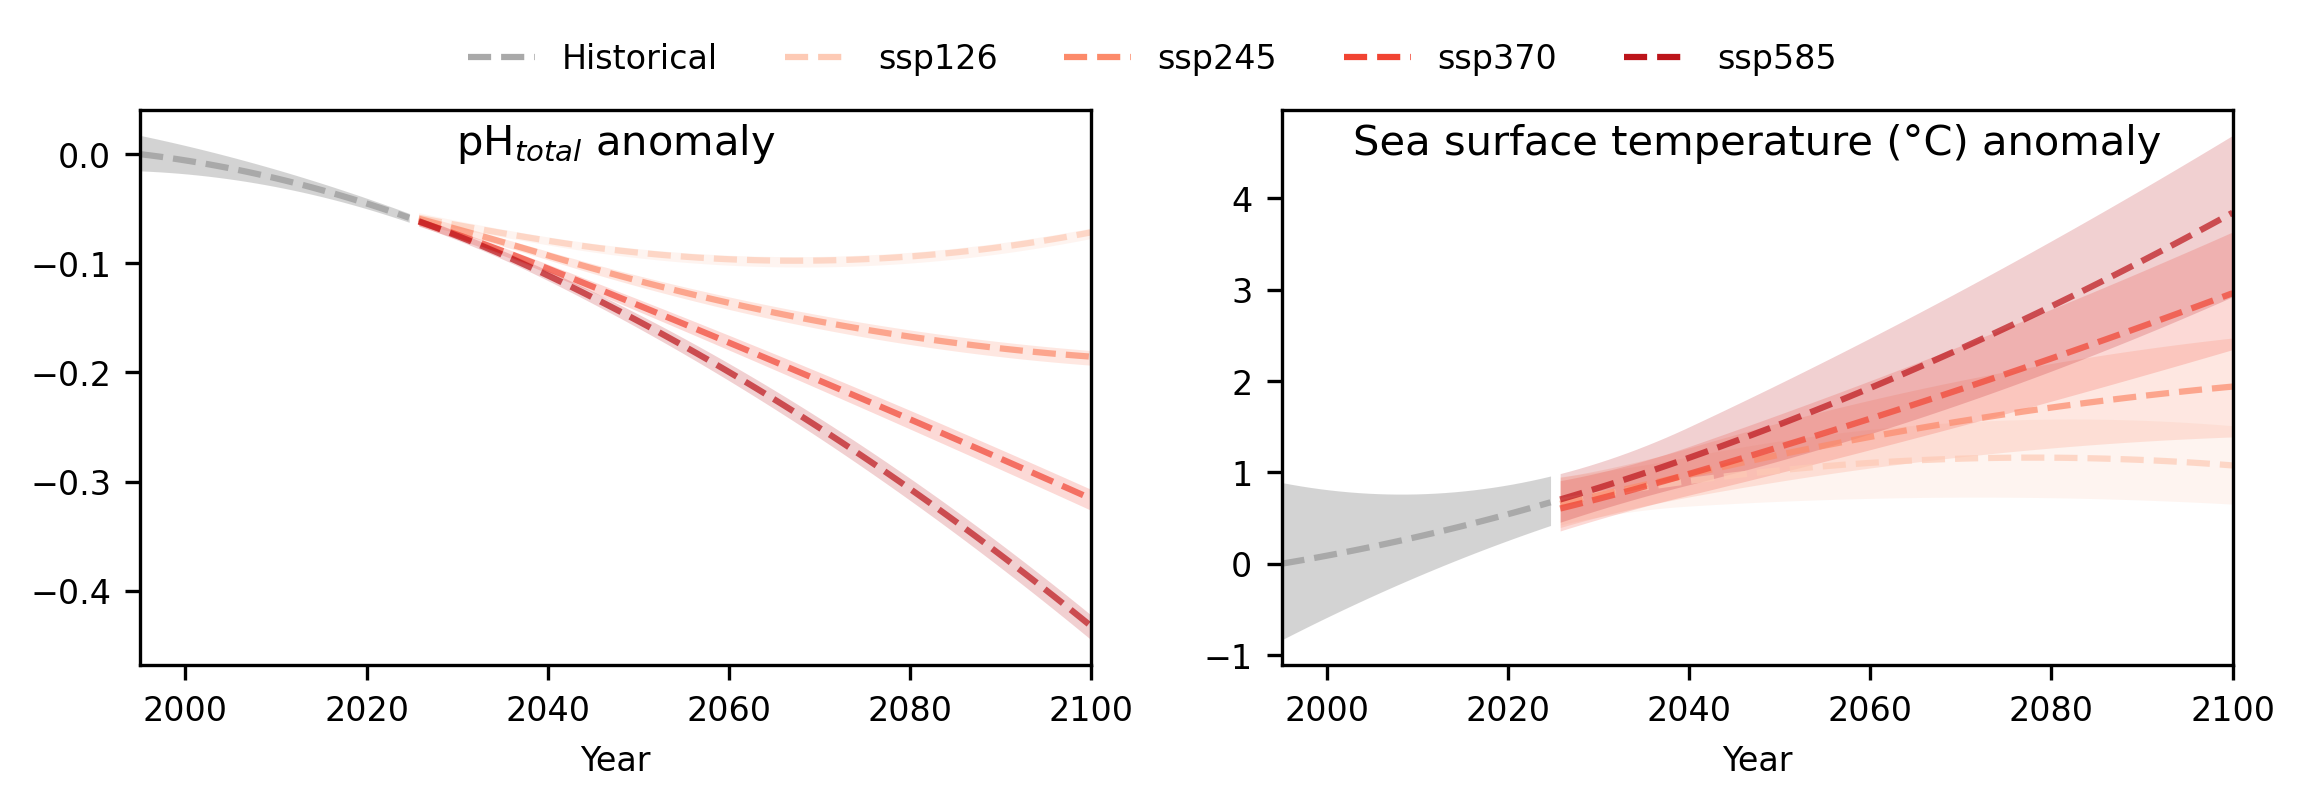

In [47]:
### plot temporal anomalies
climatology.plot_climate_anomalies(
    clim_df,
    plot_vars=["ph", "sst"],
    figsize=(9, 2.5),
    dpi=300,
)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  867
Total samples of relevant investigation:  683
Dropped due to NaN values in required columns: 0
Final sample count: 683 (184 rows dropped)

Removed 13 outlier(s) (from 683 samples) based on Cook's distance threshold of 0.11
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 



Model fitting complete.


(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: xlabel='Year', ylabel='Relative calcification rate'>],
       dtype=object))

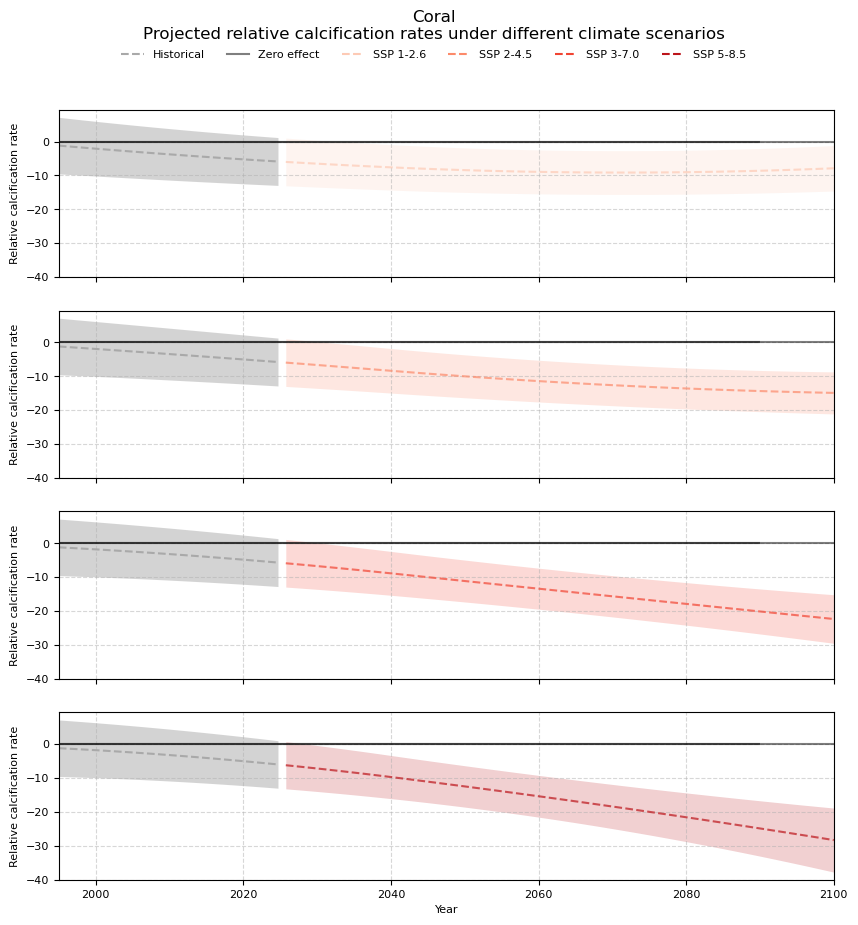

In [49]:
coral_model, coral_model_summary, coral_model_formula, coral_model_df = (
    analysis.run_metafor_mv(
        working_effects_df[working_effects_df["core_grouping"] == "Coral"],
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t",
    )
)

# Generate the newmods input    # TODO: automate for different model types i.e. interactive, additive
newmods = pd.DataFrame(
    {
        "const": [1] * len(clim_df),
        "delta_ph": clim_df.anomaly_value_ph,
        "delta_t": clim_df.anomaly_value_sst,
        "delta_ph:delta_t": clim_df.anomaly_value_ph * clim_df.anomaly_value_sst,
    }
)
predictions_df = analysis.predict_model(coral_model, newmods)
predictions_coral_df = pd.concat([clim_df, predictions_df], axis=1)
climatology.plot_global_timeseries(
    predictions_coral_df, title_org="Coral", figsize=(10, 10), dpi=300
)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  217
Total samples of relevant investigation:  161
Dropped due to NaN values in required columns: 0
Final sample count: 161 (56 rows dropped)

Removed 4 outlier(s) (from 161 samples) based on Cook's distance threshold of 0.22
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...
Model fitting complete.


(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: xlabel='Year', ylabel='Relative calcification rate'>],
       dtype=object))

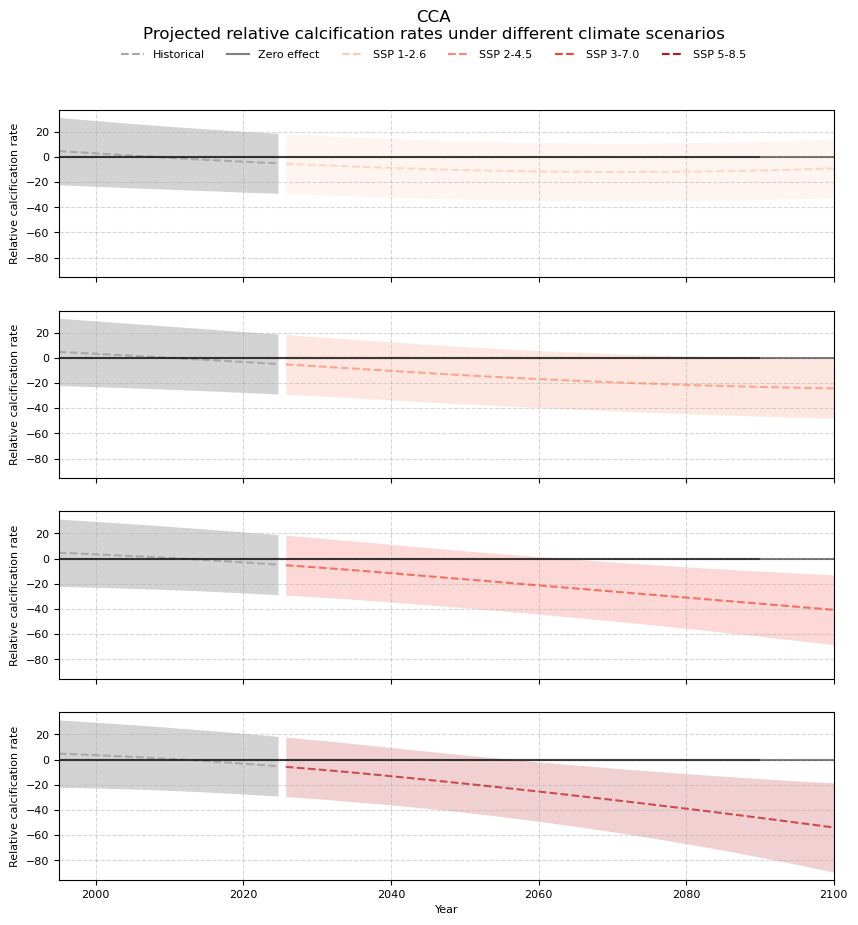

In [50]:
cca_model, cca_model_summary, cca_model_formula, cca_model_df = analysis.run_metafor_mv(
    working_effects_df[working_effects_df["core_grouping"] == "CCA"],
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
)

# Generate the newmods input    # TODO: automate for different model types i.e. interactive, additive
newmods = pd.DataFrame(
    {
        "const": [1] * len(clim_df),
        "delta_ph": clim_df.anomaly_value_ph,
        "delta_t": clim_df.anomaly_value_sst,
        "delta_ph:delta_t": clim_df.anomaly_value_ph * clim_df.anomaly_value_sst,
    }
)
predictions_df = analysis.predict_model(cca_model, newmods)
predictions_cca_df = pd.concat([clim_df, predictions_df], axis=1)
climatology.plot_global_timeseries(
    predictions_cca_df, title_org="CCA", figsize=(10, 10), dpi=300
)


----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  31
Total samples of relevant investigation:  21
Dropped due to NaN values in required columns: 0
Final sample count: 21 (10 rows dropped)

Removed 0 outlier(s) (from 21 samples) based on Cook's distance threshold of 0.65
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...
Model fitting complete.


(<Figure size 1000x1000 with 4 Axes>,
 array([<Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: xlabel='Year', ylabel='Relative calcification rate'>],
       dtype=object))

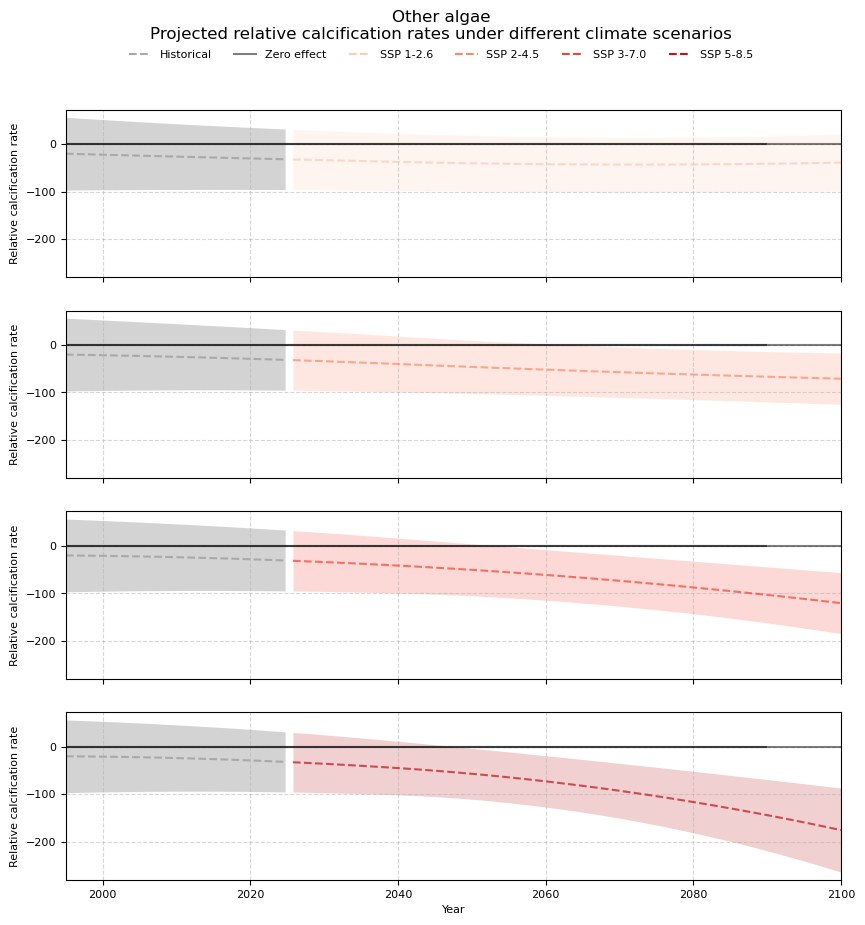

In [51]:
(
    other_algae_model,
    other_algae_model_summary,
    other_algae_model_formula,
    other_algae_model_df,
) = analysis.run_metafor_mv(
    working_effects_df[working_effects_df["core_grouping"] == "Other algae"],
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
)

# Generate the newmods input    # TODO: automate for different model types i.e. interactive, additive
newmods = pd.DataFrame(
    {
        "const": [1] * len(clim_df),
        "delta_ph": clim_df.anomaly_value_ph,
        "delta_t": clim_df.anomaly_value_sst,
        "delta_ph:delta_t": clim_df.anomaly_value_ph * clim_df.anomaly_value_sst,
    }
)
predictions_df = analysis.predict_model(other_algae_model, newmods)
predictions_other_algae_df = pd.concat([clim_df, predictions_df], axis=1)
climatology.plot_global_timeseries(
    predictions_other_algae_df, title_org="Other algae", figsize=(10, 10), dpi=300
)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Ratio of largest to smallest sampling variance extremely large. May not be able to obtain stable results. 




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  115
Total samples of relevant investigation:  69
Dropped due to NaN values in required columns: 0
Final sample count: 69 (46 rows dropped)

Removed 2 outlier(s) (from 69 samples) based on Cook's distance threshold of 0.35
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...
Model fitting complete.


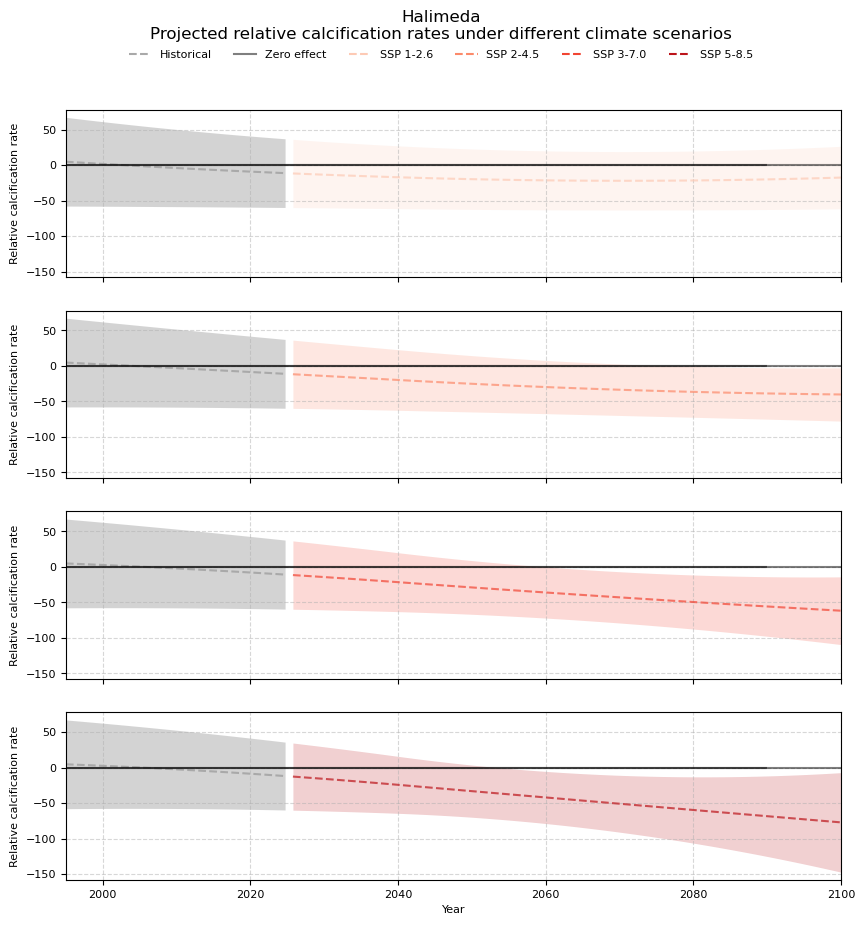

In [52]:
halimeda_model, halimeda_model_summary, halimeda_model_formula, halimeda_model_df = (
    analysis.run_metafor_mv(
        working_effects_df[working_effects_df["core_grouping"] == "Halimeda"],
        effect_type=effect_type,
        treatment=["phtot", "temp", "phtot_temp_mv"],
        formula=f"{effect_type} ~ delta_ph * delta_t",
    )
)

# Generate the newmods input    # TODO: automate for different model types i.e. interactive, additive
newmods = pd.DataFrame(
    {
        "const": [1] * len(clim_df),
        "delta_ph": clim_df.anomaly_value_ph,
        "delta_t": clim_df.anomaly_value_sst,
        "delta_ph:delta_t": clim_df.anomaly_value_ph * clim_df.anomaly_value_sst,
    }
)
predictions_df = analysis.predict_model(halimeda_model, newmods)
predictions_halimeda_df = pd.concat([clim_df, predictions_df], axis=1)
fig, axes = climatology.plot_global_timeseries(
    predictions_halimeda_df, title_org="Halimeda", figsize=(10, 10), dpi=300
)

(<Figure size 3000x3000 with 4 Axes>,
 array([<Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: ylabel='Relative calcification rate'>,
        <Axes: xlabel='Year', ylabel='Relative calcification rate'>],
       dtype=object))

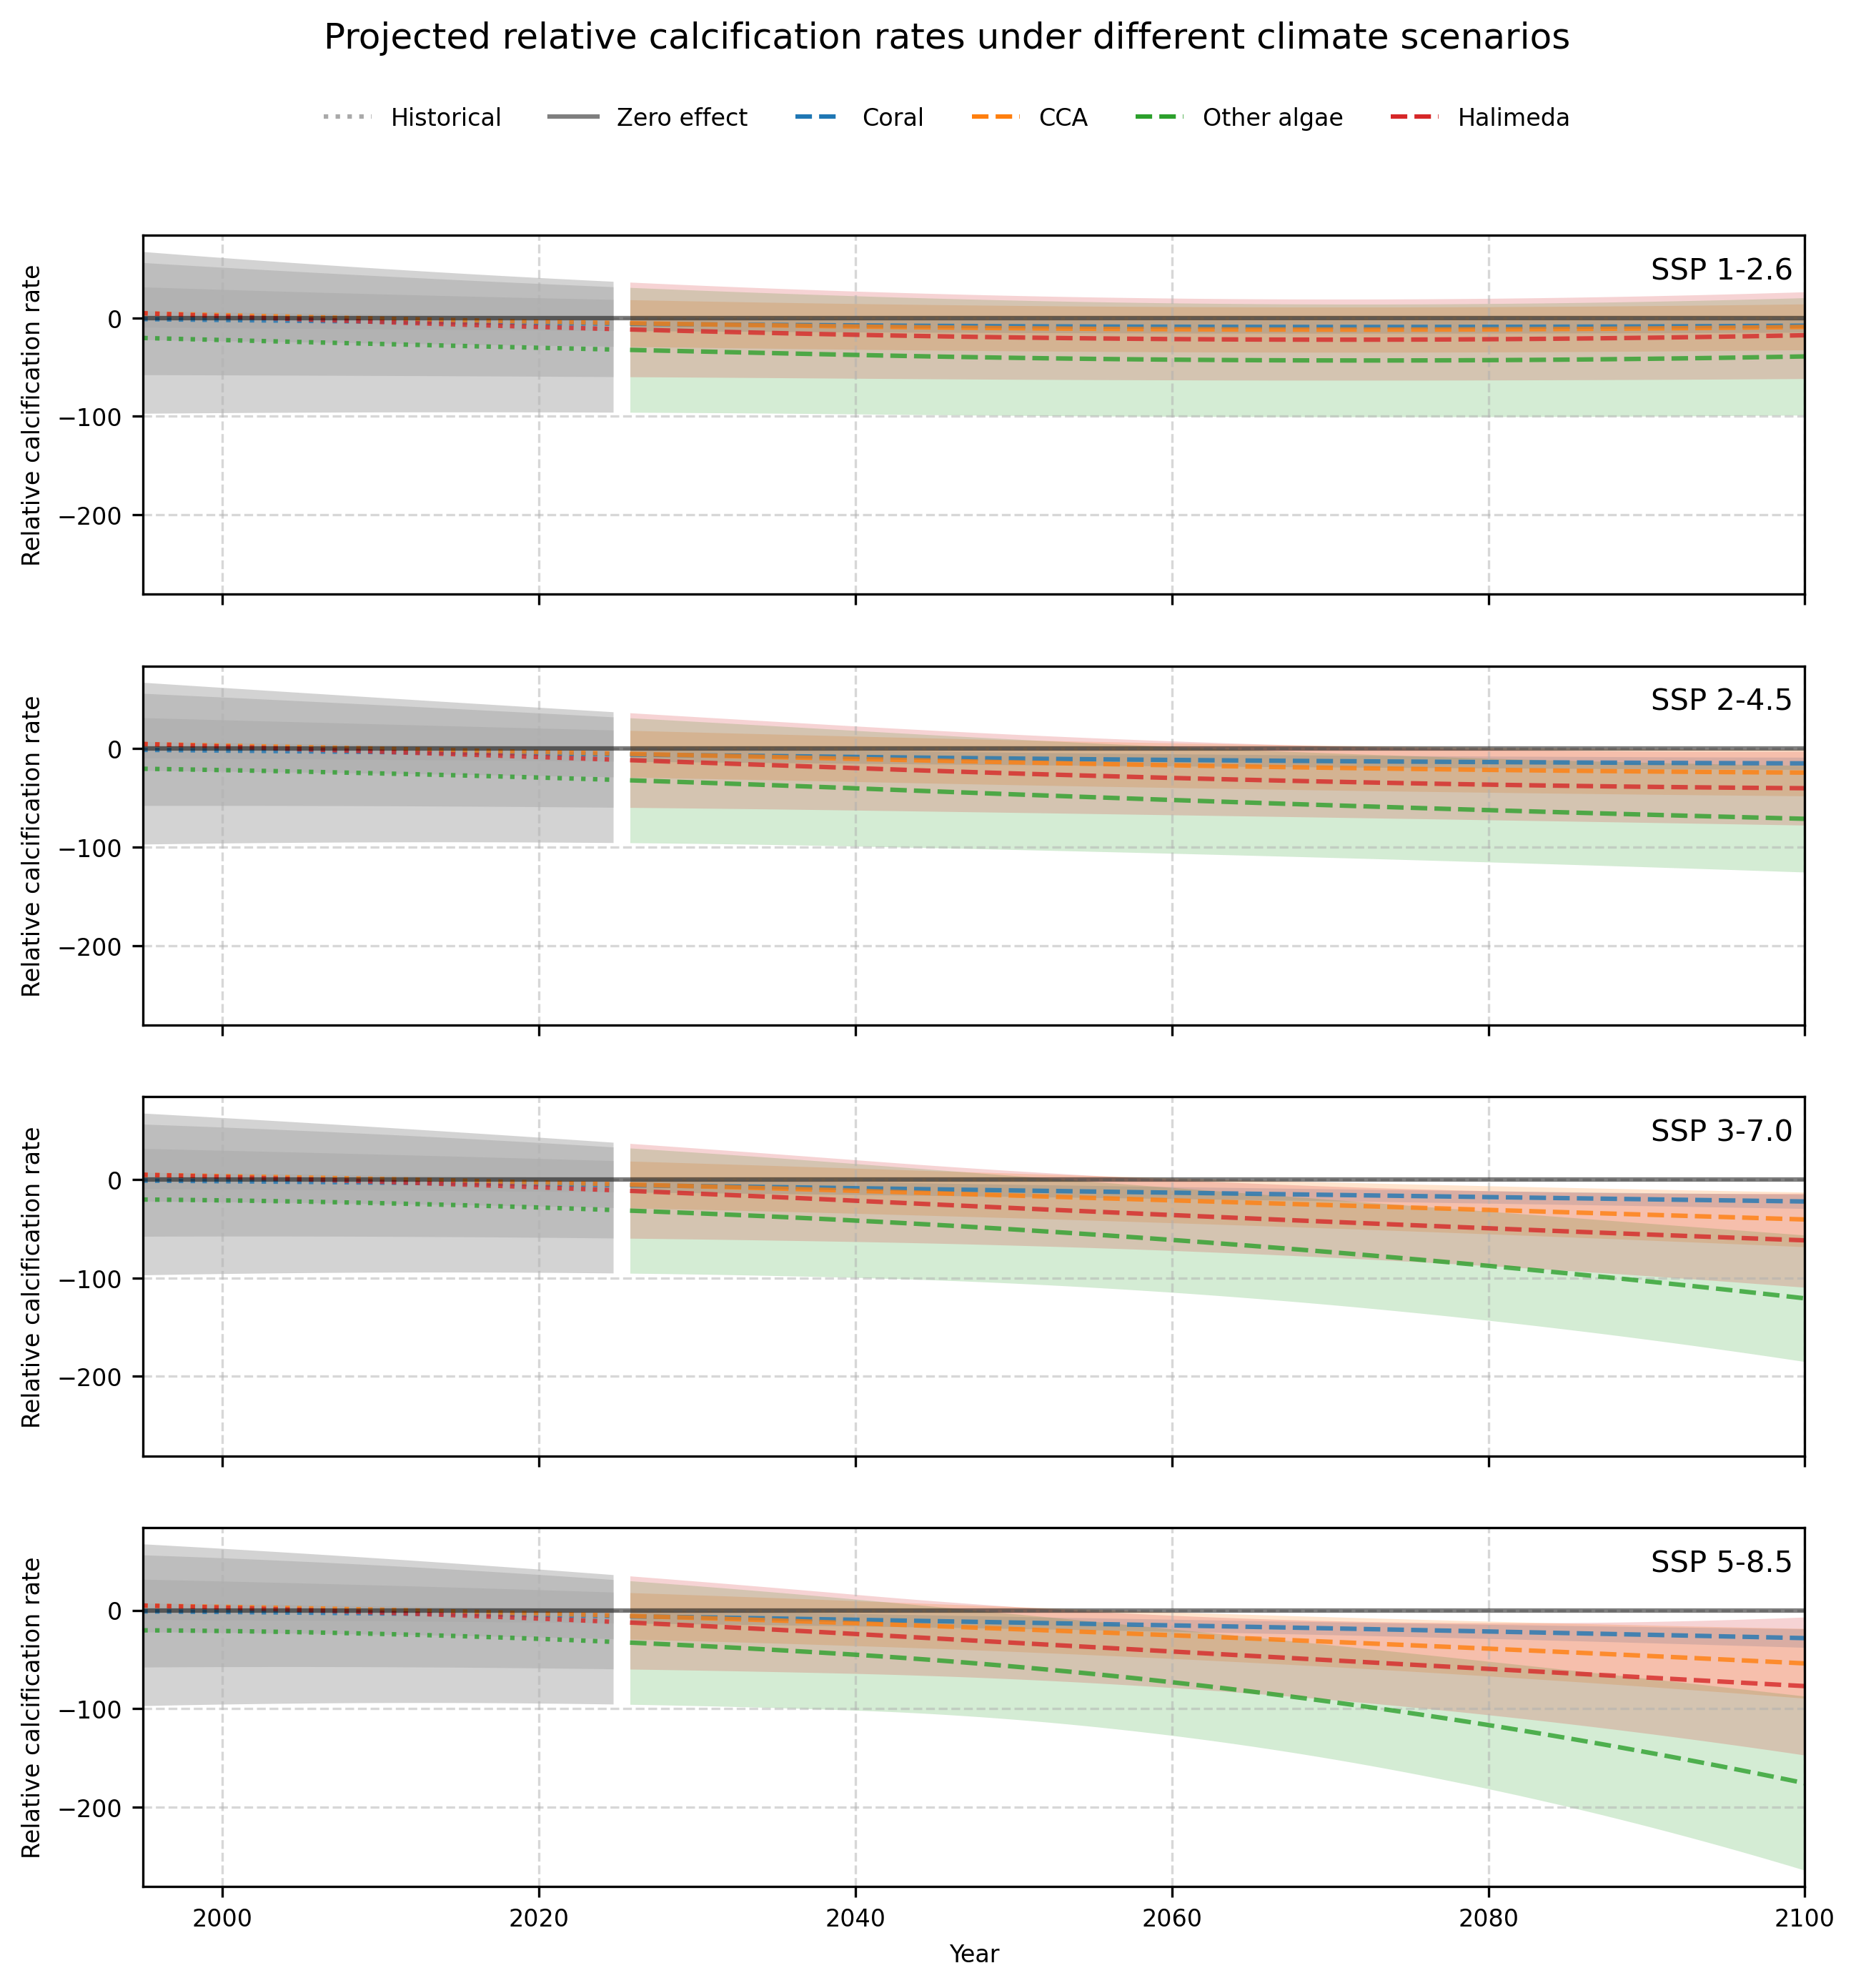

In [53]:
analysis_plot.plot_global_timeseries_multi(
    groups={
        "Coral": predictions_coral_df,
        "CCA": predictions_cca_df,
        "Other algae": predictions_other_algae_df,
        "Halimeda": predictions_halimeda_df,
    },
    # title_org='Projected relative calcification rates under different climate scenarios',
    figsize=(10, 10),
    dpi=300,
)


In [54]:
predictions_bioerosion_df = pd.read_csv(
    config.tmp_data_dir / "bioerosion_predictions.csv"
)

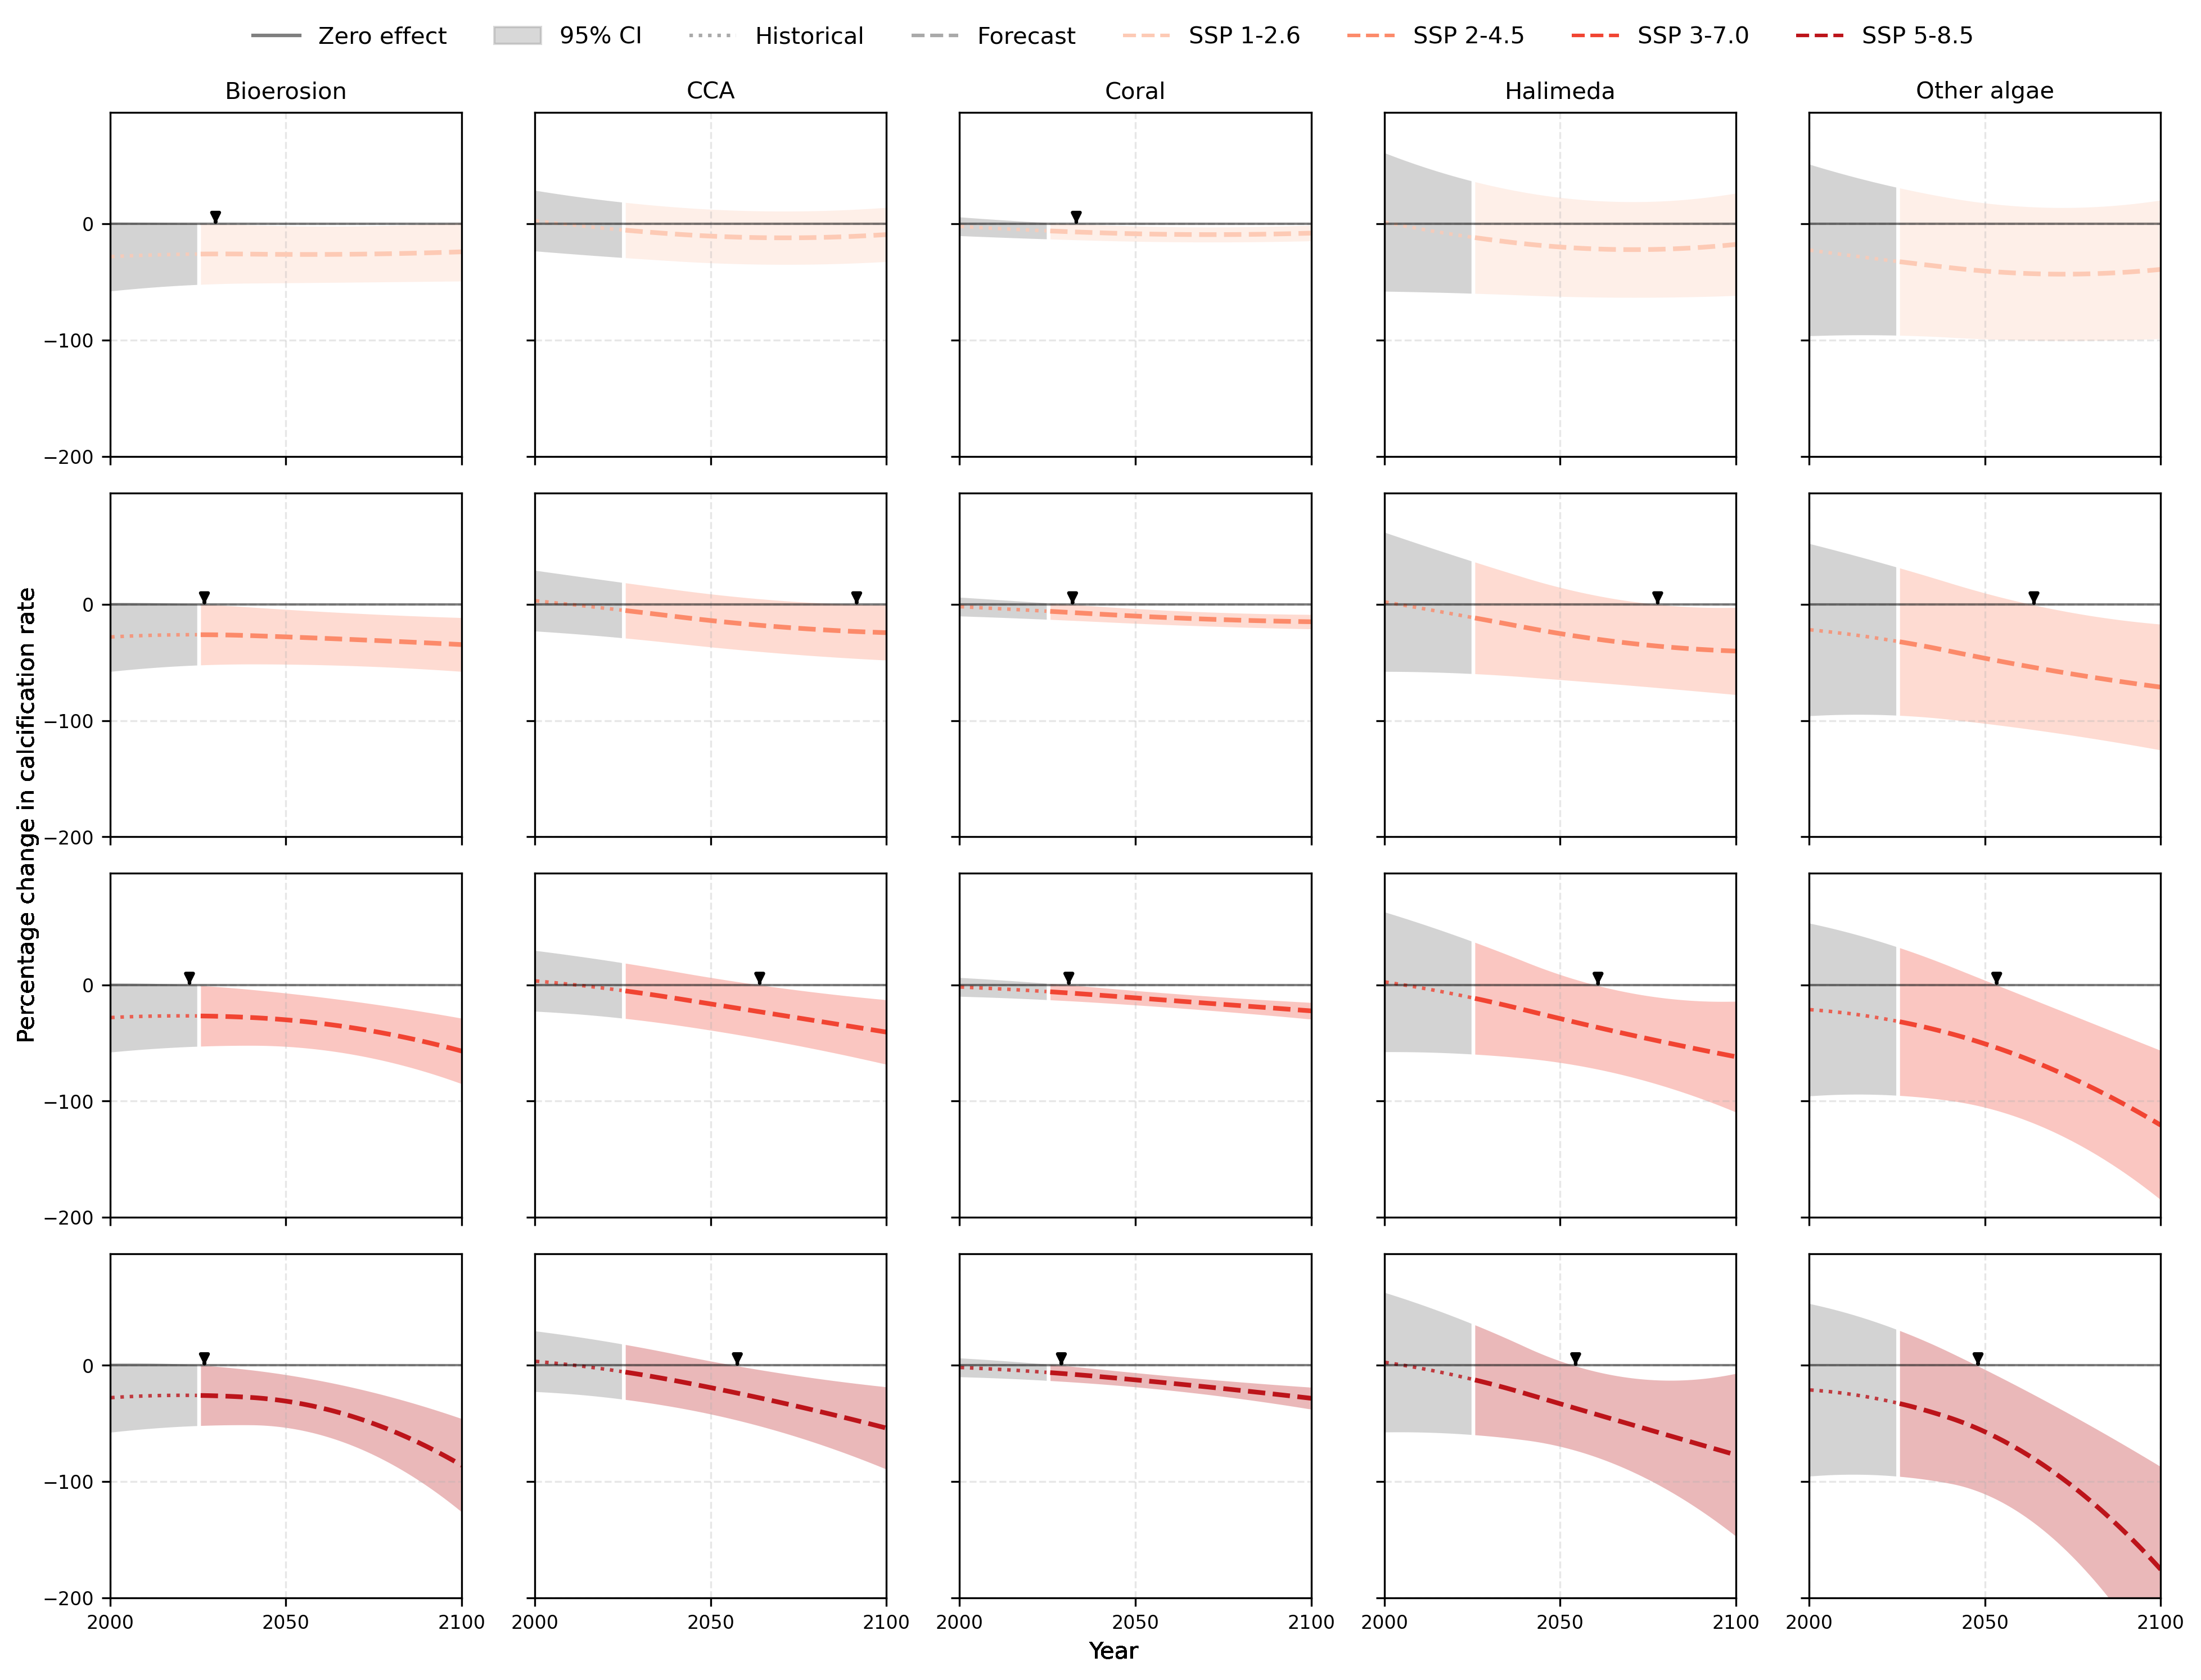

In [55]:
# Call the function with your data
fig, axes = analysis_plot.plot_global_timeseries_grid(
    groups={
        "Bioerosion": predictions_bioerosion_df,
        "CCA": predictions_cca_df,
        "Coral": predictions_coral_df,
        "Halimeda": predictions_halimeda_df,
        "Other algae": predictions_other_algae_df,
    },
    figsize=(13, 10),
    dpi=300,
)

plt.show()

In [57]:
(
    foraminifera_model,
    foraminifera_model_summary,
    foraminifera_model_formula,
    foraminifera_model_df,
) = analysis.run_metafor_mv(
    working_effects_df[working_effects_df["core_grouping"] == "Foraminifera"],
    effect_type=effect_type,
    treatment=["phtot", "temp", "phtot_temp_mv"],
    formula=f"{effect_type} ~ delta_ph * delta_t",
)

# Generate the newmods input    # TODO: automate for different model types i.e. interactive, additive
newmods = pd.DataFrame(
    {
        "const": [1] * len(clim_df),
        "delta_ph": clim_df.anomaly_value_ph,
        "delta_t": clim_df.anomaly_value_sst,
        "delta_ph:delta_t": clim_df.anomaly_value_ph * clim_df.anomaly_value_sst,
    }
)
predictions_df = analysis.predict_model(foraminifera_model, newmods)
predictions_foraminifera_df = pd.concat([clim_df, predictions_df], axis=1)
climatology.plot_global_timeseries(
    predictions_foraminifera_df, title_org="Foraminifera", figsize=(10, 10), dpi=300
)

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Redundant predictors dropped from the model. 

R[write to console]: Error in predict.rma(list(b = c(4.24599708686283, 8.71858851607064, -0.634368565450833 : 
  Dimensions of 'newmods' (5) do not the match dimensions of the model (3).




----- PROCESSING SUMMARY -----
Treatment:  ['phtot', 'temp', 'phtot_temp_mv']
Total samples in input data:  8
Total samples of relevant investigation:  8
Dropped due to NaN values in required columns: 0
Final sample count: 8 (0 rows dropped)

Removed 1 outlier(s) (from 8 samples) based on Cook's distance threshold of 1.15
Using formula st_relative_calcification ~ delta_ph * delta_t

Running metafor model...
Model fitting complete.


RRuntimeError: Error in predict.rma(list(b = c(4.24599708686283, 8.71858851607064, -0.634368565450833 : 
  Dimensions of 'newmods' (5) do not the match dimensions of the model (3).


# Burning embers plots

#### General processing

In [58]:
### combine all predictions into a single dataframe
join_cols = [
    "scenario",
    "time_frame",
    "percentile",
    "anomaly_value_ph",
    "anomaly_value_sst",
]

all_preds_df = predictions_coral_df[join_cols].copy()
for predictions_df, core_grouping in zip(
    [
        predictions_coral_df,
        predictions_cca_df,
        predictions_other_algae_df,
        predictions_halimeda_df,
    ],
    ["Coral", "CCA", "Other algae", "Halimeda"],
):
    # append "_{core_grouping}" to the column names in predictions_df which are not in join_cols
    predictions_df = predictions_df.rename(
        columns={
            col: f"{col}_{core_grouping.lower().replace(' ', '_')}"
            for col in predictions_df.columns
            if col not in join_cols
        }
    )
    # Merge the predictions_df with emissions_data on the join_cols
    all_preds_df = pd.merge(
        all_preds_df, predictions_df, how="left", left_on=join_cols, right_on=join_cols
    )


### reshape the data into long form
long_preds_df = all_preds_df.melt(
    id_vars=join_cols, var_name="metric", value_name="value"
)

# extract the core_grouping (e.g., coral, cca, halimeda) from the metric column
long_preds_df["core_grouping"] = long_preds_df["metric"].str.extract(
    r"_(coral|cca|other_algae|halimeda)$"
)[0]
# remove the core_grouping suffix from the metric column
long_preds_df["metric"] = long_preds_df["metric"].str.replace(
    r"_(coral|cca|other_algae|halimeda)$", "", regex=True
)
# pivot the table to have prediction metrics as columns
reshaped_preds_df = long_preds_df.pivot_table(
    index=join_cols + ["core_grouping"], columns="metric", values="value"
).reset_index()

# order by core_grouping
reshaped_preds_df["core_grouping"] = pd.Categorical(
    reshaped_preds_df["core_grouping"],
    categories=["coral", "cca", "other_algae", "halimeda"],
    ordered=True,
)
reshaped_preds_df = reshaped_preds_df.sort_values(
    by=["core_grouping", "scenario", "time_frame"]
)

category_map = {
    "coral": "Coral",
    "cca": "CCA",
    "other_algae": "Other algae",
    "halimeda": "Halimeda",
}
reshaped_preds_df["core_grouping"] = reshaped_preds_df["core_grouping"].map(
    category_map
)

In [59]:
### add bioerosion data
bioerosion_data = pd.read_csv(config.tmp_data_dir / "bioerosion_predictions.csv")
# append the bioerosion data to the reshaped predictions dataframe
reshaped_preds_df = pd.concat(
    [reshaped_preds_df, bioerosion_data], axis=0, ignore_index=True
)

#### Plotting against SSP

In [60]:
processing.interpolate_and_extrapolate_predictions(reshaped_preds_df.copy())

core_grouping scenario percentile  time_frame  anomaly_value_ph  \
0            Coral   ssp126       mean        1995          0.000000   
1            Coral   ssp126       mean        1996         -0.002175   
2            Coral   ssp126       mean        1997         -0.004330   
3            Coral   ssp126       mean        1998         -0.006467   
4            Coral   ssp126       mean        1999         -0.008586   
...            ...      ...        ...         ...               ...   
2115    Bioerosion   ssp585       mean        2096         -0.391198   
2116    Bioerosion   ssp585       mean        2097         -0.397534   
2117    Bioerosion   ssp585       mean        2098         -0.403914   
2118    Bioerosion   ssp585       mean        2099         -0.410339   
2119    Bioerosion   ssp585       mean        2100         -0.416808   

      anomaly_value_sst       ci.lb      ci.ub       pi.lb      pi.ub  \
0              0.000000   -9.534696   7.147062  -59.347541  56.959906   
1              0.026584   -9.665599   6.905133  -59.526466  56.765999   
2              0.052874   -9.795387   6.666065  -59.703529  56.574207   
3              0.078870   -9.924059   6.429858  -59.878730  56.384529   
4              0.104572  -10.051616   6.196513  -60.052069  56.196965   
...                 ...         ...        ...         ...        ...   
2115           3.766830 -116.616006 -41.813914 -169.992816  11.562896   
2116           3.820974 -118.949008 -42.818562 -171.869087  10.101517   
2117           3.875434 -121.322894 -43.834728 -173.776053   8.618431   
2118           3.930208 -123.737665 -44.862411 -175.713715   7.113639   
2119           3.985297 -126.193322 -45.901611 -177.682072   5.587139   

           pred         se  
0     -1.193817   4.255629  
1     -1.380233   4.227305  
2     -1.564661   4.199427  
3     -1.747100   4.171994  
4     -1.927552   4.145007  
...         ...        ...  
2115 -79.214960  19.082517  
2116 -80.883785  19.421389  
2117 -82.578811  19.767752  
2118 -84.300038  20.121608  
2119 -86.047466  20.482956  

[2120 rows x 12 columns]

In [61]:
### process for plotting against SSP values
plot_preds_ssp = processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)

# filter
plot_preds_ssp = plot_preds_ssp[
    ((plot_preds_ssp.time_frame == 2100) | (plot_preds_ssp.time_frame == 2030))
    | (plot_preds_ssp.time_frame == 2050) & (plot_preds_ssp.percentile == "mean")
]
# get present day values
present_day_vals = (
    plot_preds_ssp[plot_preds_ssp.time_frame == 2030]
    .groupby("core_grouping")
    .agg(lambda x: x.mean() if pd.api.types.is_numeric_dtype(x) else x.iloc[0])
    .reset_index()
)
present_day_vals["scenario"] = "Present day"
present_day_vals["certainty"] = 0
# append to plot_preds_ssp
plot_preds_ssp = pd.concat(
    [plot_preds_ssp, present_day_vals], axis=0, ignore_index=True
)
plot_preds_ssp.sort_values(by=["scenario", "core_grouping"], inplace=True)
# drop 2030 time_frames, but keep 2030 for which scenario == 'Present day'
plot_preds_ssp = plot_preds_ssp[
    (plot_preds_ssp.time_frame != 2030) | (plot_preds_ssp.scenario == "Present day")
]
# calculate p-scores and certainty for each prediction
plot_preds_ssp["p_score"] = plot_preds_ssp.apply(
    lambda row: analysis.p_score(row["pred"], row["se"], null_value=0), axis=1
)
plot_preds_ssp["certainty"] = plot_preds_ssp["p_score"].apply(analysis.assign_certainty)

plot_preds_ssp.sort_values(by=["core_grouping", "scenario"], inplace=True)

In [62]:
# for each core_grouping iterate over each scenario and format the following information:

# pred pm se (pi.lb, pi.ub)
for core_grouping in plot_preds_ssp.core_grouping.unique():
    print(f"\nCore grouping: {core_grouping}")
    for scenario in plot_preds_ssp.scenario.unique():
        subset = plot_preds_ssp[
            (plot_preds_ssp.core_grouping == core_grouping)
            & (plot_preds_ssp.scenario == scenario)
        ]
        if len(subset) > 0:
            for time_frame in subset.time_frame.unique():
                # if time_frame == 2030:
                #     continue
                time_subset = subset[subset.time_frame == time_frame]
                if len(subset) > 0:
                    pred = time_subset["pred"].values[0]
                    se = time_subset["se"].values[0]
                    ci_lb = time_subset["ci.lb"].values[0]
                    ci_ub = time_subset["ci.ub"].values[0]
                    pi_lb = time_subset["pi.lb"].values[0]
                    pi_ub = time_subset["pi.ub"].values[0]
                    print(f"Scenario: {scenario}, Time frame: {time_frame}")
                    print(f"{pred:.1f} ± {se:.1f} ({ci_lb:.1f}, {ci_ub:.1f})")
                    # print(f"{pred:.1f} ± {se:.1f}, ({ci_lb:.1f}, {ci_ub:.1f}), ({pi_lb:.1f}, {pi_ub:.1f})")


Core grouping: Bioerosion
Scenario: Present day, Time frame: 2030.0
-26.3 ± 13.0 (-51.8, -0.7)
Scenario: ssp126, Time frame: 2050.0
-26.2 ± 12.5 (-50.7, -1.7)
Scenario: ssp126, Time frame: 2100.0
-24.0 ± 12.9 (-49.2, 1.2)
Scenario: ssp245, Time frame: 2050.0
-27.9 ± 12.0 (-51.5, -4.3)
Scenario: ssp245, Time frame: 2100.0
-34.6 ± 11.8 (-57.7, -11.4)
Scenario: ssp370, Time frame: 2050.0
-30.0 ± 11.7 (-53.0, -7.1)
Scenario: ssp370, Time frame: 2100.0
-56.9 ± 14.4 (-85.1, -28.7)
Scenario: ssp585, Time frame: 2050.0
-30.8 ± 11.6 (-53.5, -8.1)
Scenario: ssp585, Time frame: 2100.0
-86.0 ± 20.5 (-126.2, -45.9)

Core grouping: CCA
Scenario: Present day, Time frame: 2030.0
-7.0 ± 12.0 (-30.5, 16.5)
Scenario: ssp126, Time frame: 2050.0
-10.5 ± 11.8 (-33.5, 12.6)
Scenario: ssp126, Time frame: 2100.0
-9.1 ± 11.9 (-32.4, 14.1)
Scenario: ssp245, Time frame: 2050.0
-13.9 ± 11.6 (-36.6, 8.9)
Scenario: ssp245, Time frame: 2100.0
-24.3 ± 12.1 (-48.0, -0.6)
Scenario: ssp370, Time frame: 2050.0
-16.4 ± 11

Bioerosion [-26.27475649 -26.2019173  -23.97136205 -27.91756211 -34.5620908
 -30.03701196 -56.93344119 -30.77248052 -86.0474665 ]
CCA [ -7.00147227 -10.46377335  -9.13291217 -13.85198208 -24.29308838
 -16.36204834 -40.62496365 -19.13746269 -53.97465399]
Coral [ -6.77967181  -8.43805118  -7.89056947 -10.00574086 -14.90222855
 -11.13997479 -22.35343394 -12.47433512 -28.31783896]
Halimeda [-14.42575568 -19.82835927 -17.58777574 -25.10571057 -40.14055282
 -29.01025665 -61.82256142 -33.02598492 -77.03478436]
Other algae [ -34.70716001  -40.52480539  -39.09423583  -46.34914485  -71.1762659
  -50.73019116 -120.7164429   -57.17507628 -175.63672848]


/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_27572/894389255.py:155: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



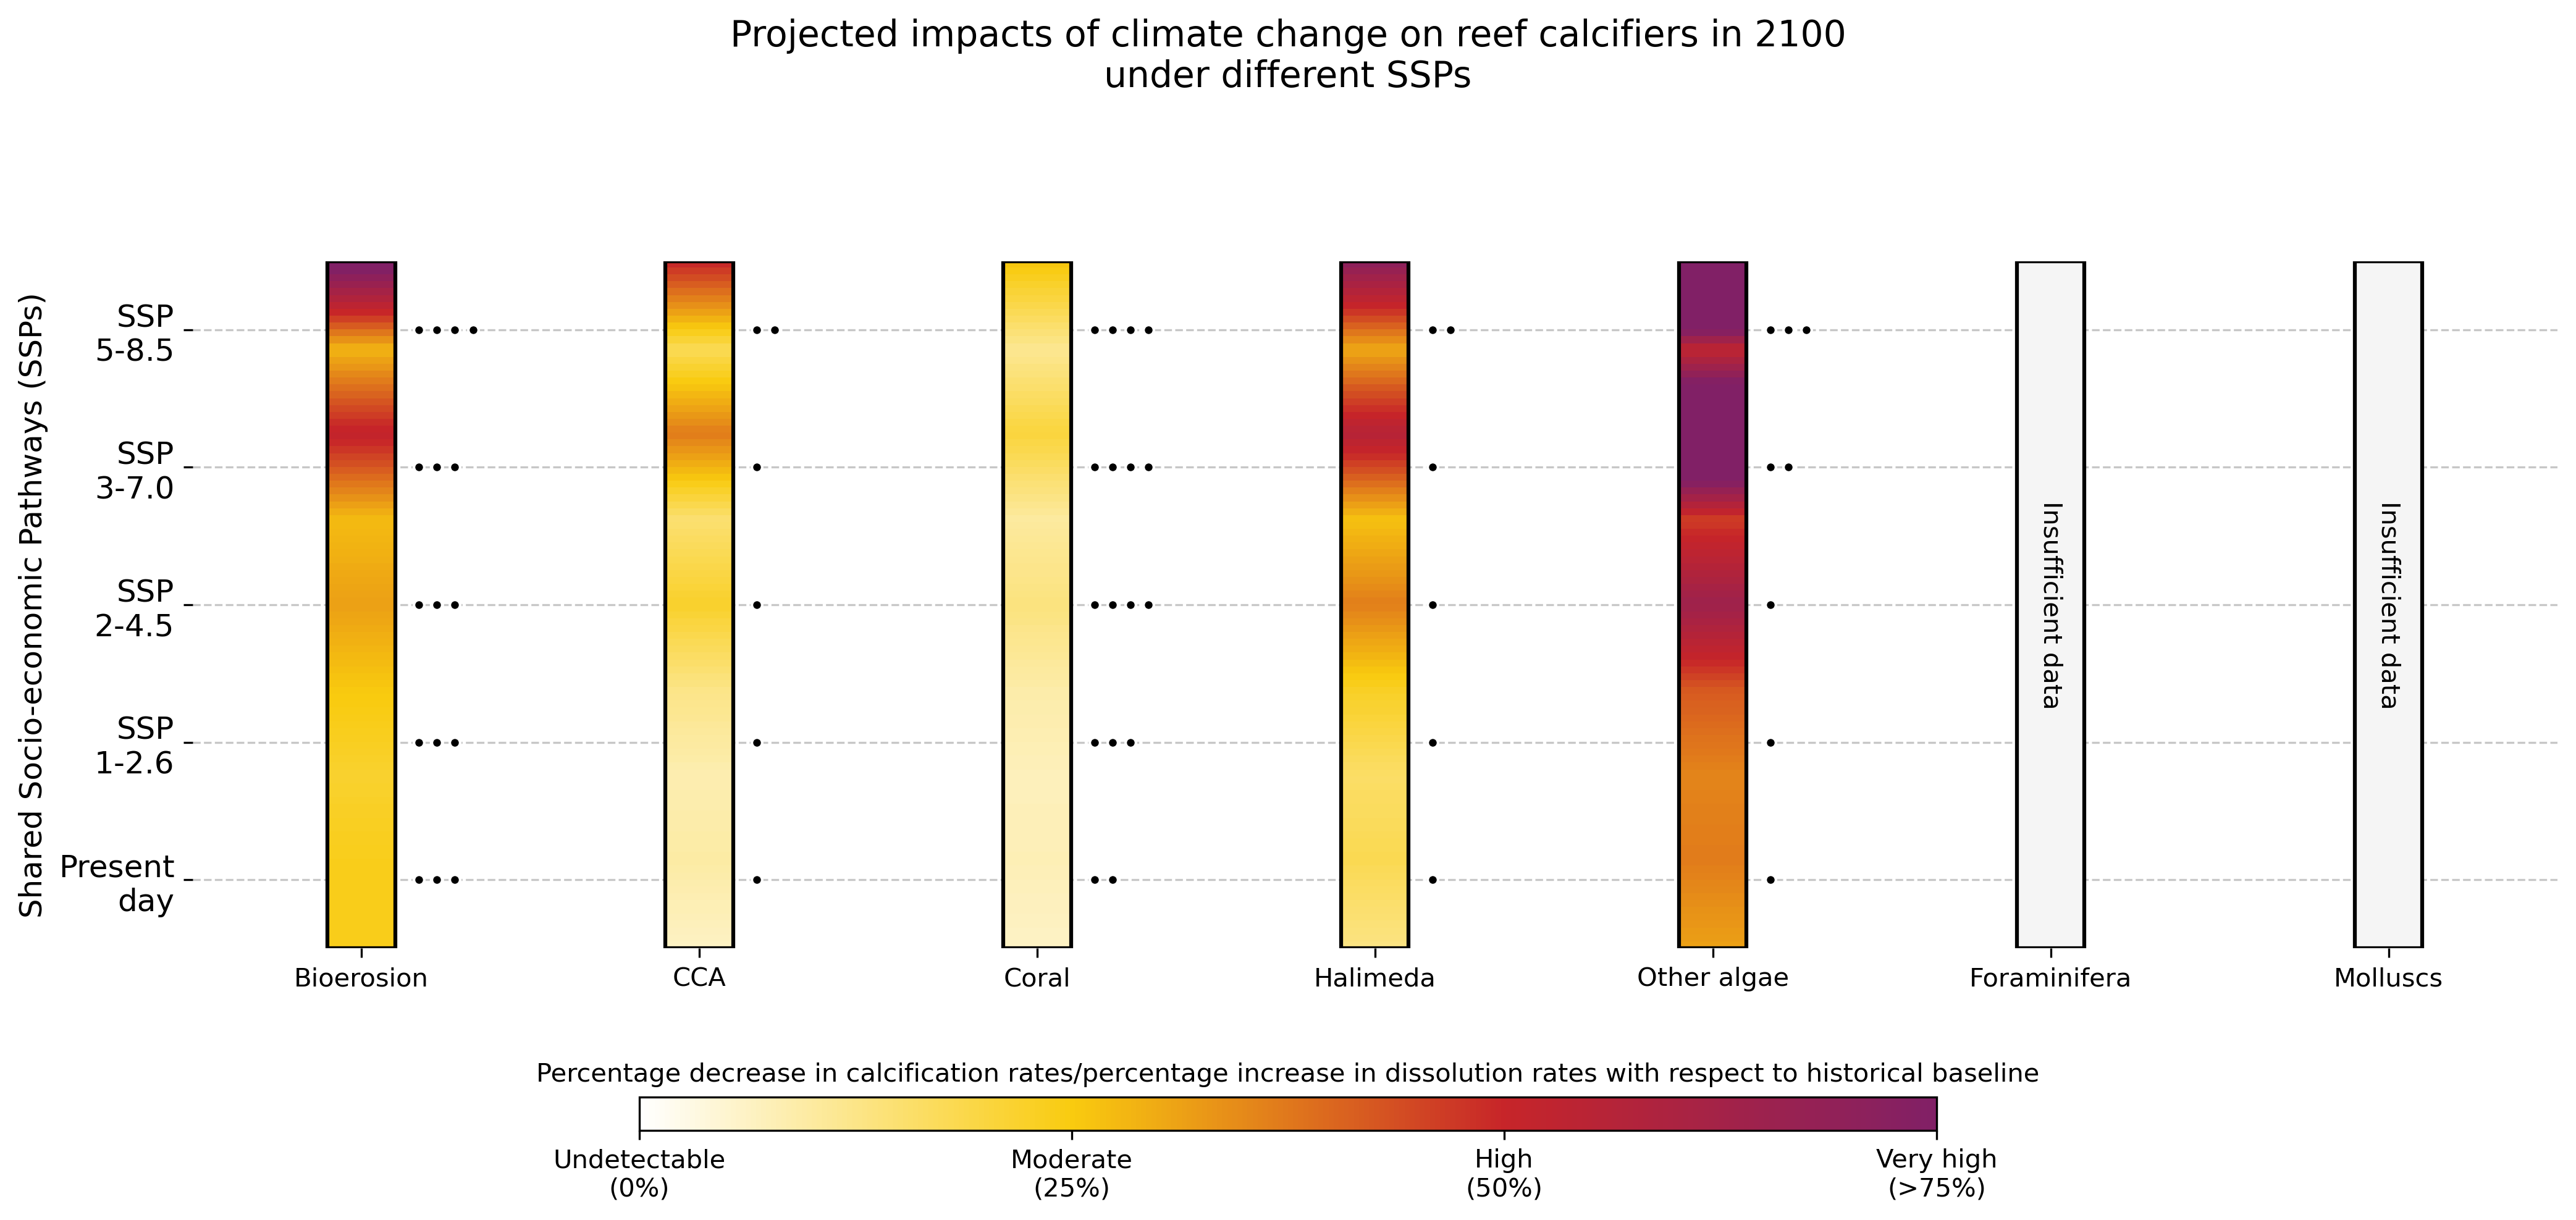

In [65]:
categories = list(plot_preds_ssp.core_grouping.unique())

scenarios = list(plot_preds_ssp.scenario.unique())
n_categories = len(categories)
n_scenarios = len(scenarios)

# create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)
n_levels = 100
# create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)
# remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# add horizontal grid lines behind the bars
ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)

insufficient_data_cols = ["Foraminifera", "Molluscs"]

# Draw each vertical bar, shaded by the values of pred
for i, category in enumerate(categories + insufficient_data_cols):
    if category in insufficient_data_cols:
        # plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (i - 0.1, 0),  # Bottom-left corner
                0.2,  # Width
                n_scenarios,  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        # add text (rotated) in middle of bar saying "Insufficient data"
        ax.text(
            i,
            n_scenarios / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue  # Skip to next iteration

    # Filter data for this category
    category_data = plot_preds_ssp[plot_preds_ssp["core_grouping"] == category]

    if len(category_data) == 0:
        continue  # Skip if no data available for the category

    gradient_values = category_data["pred"].values
    # gradient_values = np.clip(category_data['pred'].values, -50, 0)
    print(category, gradient_values)
    # interpolate gradient values to n points
    gradient_values = np.interp(
        np.linspace(0, len(gradient_values) - 1, n_levels),
        np.arange(len(gradient_values)),
        gradient_values,
    )

    ax.imshow(
        np.atleast_2d(gradient_values[::-1]).T,  # Flip so SSP5-8.5 is at the top
        extent=(i - 0.1, i + 0.1, 0, n_scenarios),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )
    # Add border around bars
    ax.add_patch(
        plt.Rectangle(
            (i - 0.1, 0),  # Bottom-left corner
            0.2,  # Width
            n_scenarios,  # Height
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=10,
        )
    )

    # Add dots for uncertainty levels
    for j, scenario in enumerate(scenarios):
        # Get certainty value for this category and scenario
        scenario_data = category_data[category_data["scenario"] == scenario]
        if not scenario_data.empty:
            certainty = scenario_data["certainty"].values[0]

            # Calculate positions for up to 4 adjacent dots
            dot_positions = np.linspace(-0.2, 0.2, 4)

            # Plot dots based on certainty level (assuming certainty is a number from 1-4)
            if not np.isnan(certainty):
                num_dots = int(certainty)
                for k in range(num_dots):
                    ax.plot(
                        i + 0.25 + (dot_positions[k] * 0.4),
                        j + 0.5,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )

# Format axes
ax.set_xlim(-0.5, n_categories + len(insufficient_data_cols) - 0.5)
ax.set_ylim(0, n_scenarios)  # Ensure y-axis spans all scenarios
ax.set_xticks(range(n_categories + len(insufficient_data_cols)))
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_yticks(np.arange(n_scenarios) + 0.5)  # Center labels between scenario boundaries
ax.set_ylabel("Shared Socio-economic Pathways (SSPs)", fontsize=12)

# Set y-tick labels using your mapping
y_labels = [
    plot_config.SCENARIO_MAP.get(scenario, scenario).replace(" ", "\n")
    for scenario in scenarios
]
ax.set_yticklabels(y_labels, fontsize=12)

# cbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
# Reverse the colormap
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
# cb.set_ticks(np.linspace(cnorm.vmax, cnorm.vmin, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage decrease in calcification rates/percentage increase in dissolution rates with respect to historical baseline",
    fontsize=10,
)

plt.suptitle(
    "Projected impacts of climate change on reef calcifiers in 2100\nunder different SSPs",
    fontsize=14,
    y=1.05,
)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])  # Leave space for colorbar and title
plt.show()

### Plotting against SST

In [66]:
plot_preds_sst = processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)

# # define new yearly range in order to get full spectrum of predictions.  # TODO: extend to 2100
# new_years = np.arange(plot_preds_sst['time_frame'].min(), plot_preds_sst['time_frame'].max() + 1)
# new_years_df = pd.DataFrame({'time_frame': new_years})

# # create all combinations of core_grouping, scenario, and year
# unique_groups = plot_preds_sst[['core_grouping', 'scenario']].drop_duplicates()
# full_grid = unique_groups.merge(new_years_df, how='cross')

# plot_preds_sst = plot_preds_sst[plot_preds_sst.percentile == "mean"]
# # merge full grid with predictions
# plot_preds_sst = pd.merge(full_grid, plot_preds_sst, on=['core_grouping', 'scenario', 'time_frame'], how='left')

# plot_preds_sst['anomaly_value_sst'] = plot_preds_sst.groupby(['core_grouping', 'scenario'])['anomaly_value_sst'].transform(lambda x: x.interpolate(method='quadratic'))
# plot_preds_sst['pred'] = plot_preds_sst.groupby(['core_grouping', 'scenario'])['pred'].transform(lambda x: x.interpolate(method='quadratic'))
# plot_preds_sst['se'] = plot_preds_sst.groupby(['core_grouping', 'scenario'])['se'].transform(lambda x: x.interpolate(method='quadratic'))

# sort by core_grouping and scenario
plot_preds_sst.sort_values(by=["core_grouping", "scenario"], inplace=True)

# Calculate p-scores for each prediction
plot_preds_sst["p_score"] = plot_preds_sst.apply(
    lambda row: analysis.p_score(row["pred"], row["se"], null_value=0), axis=1
)
plot_preds_sst["certainty"] = plot_preds_sst["p_score"].apply(analysis.assign_certainty)

/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_27572/1830408653.py:192: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



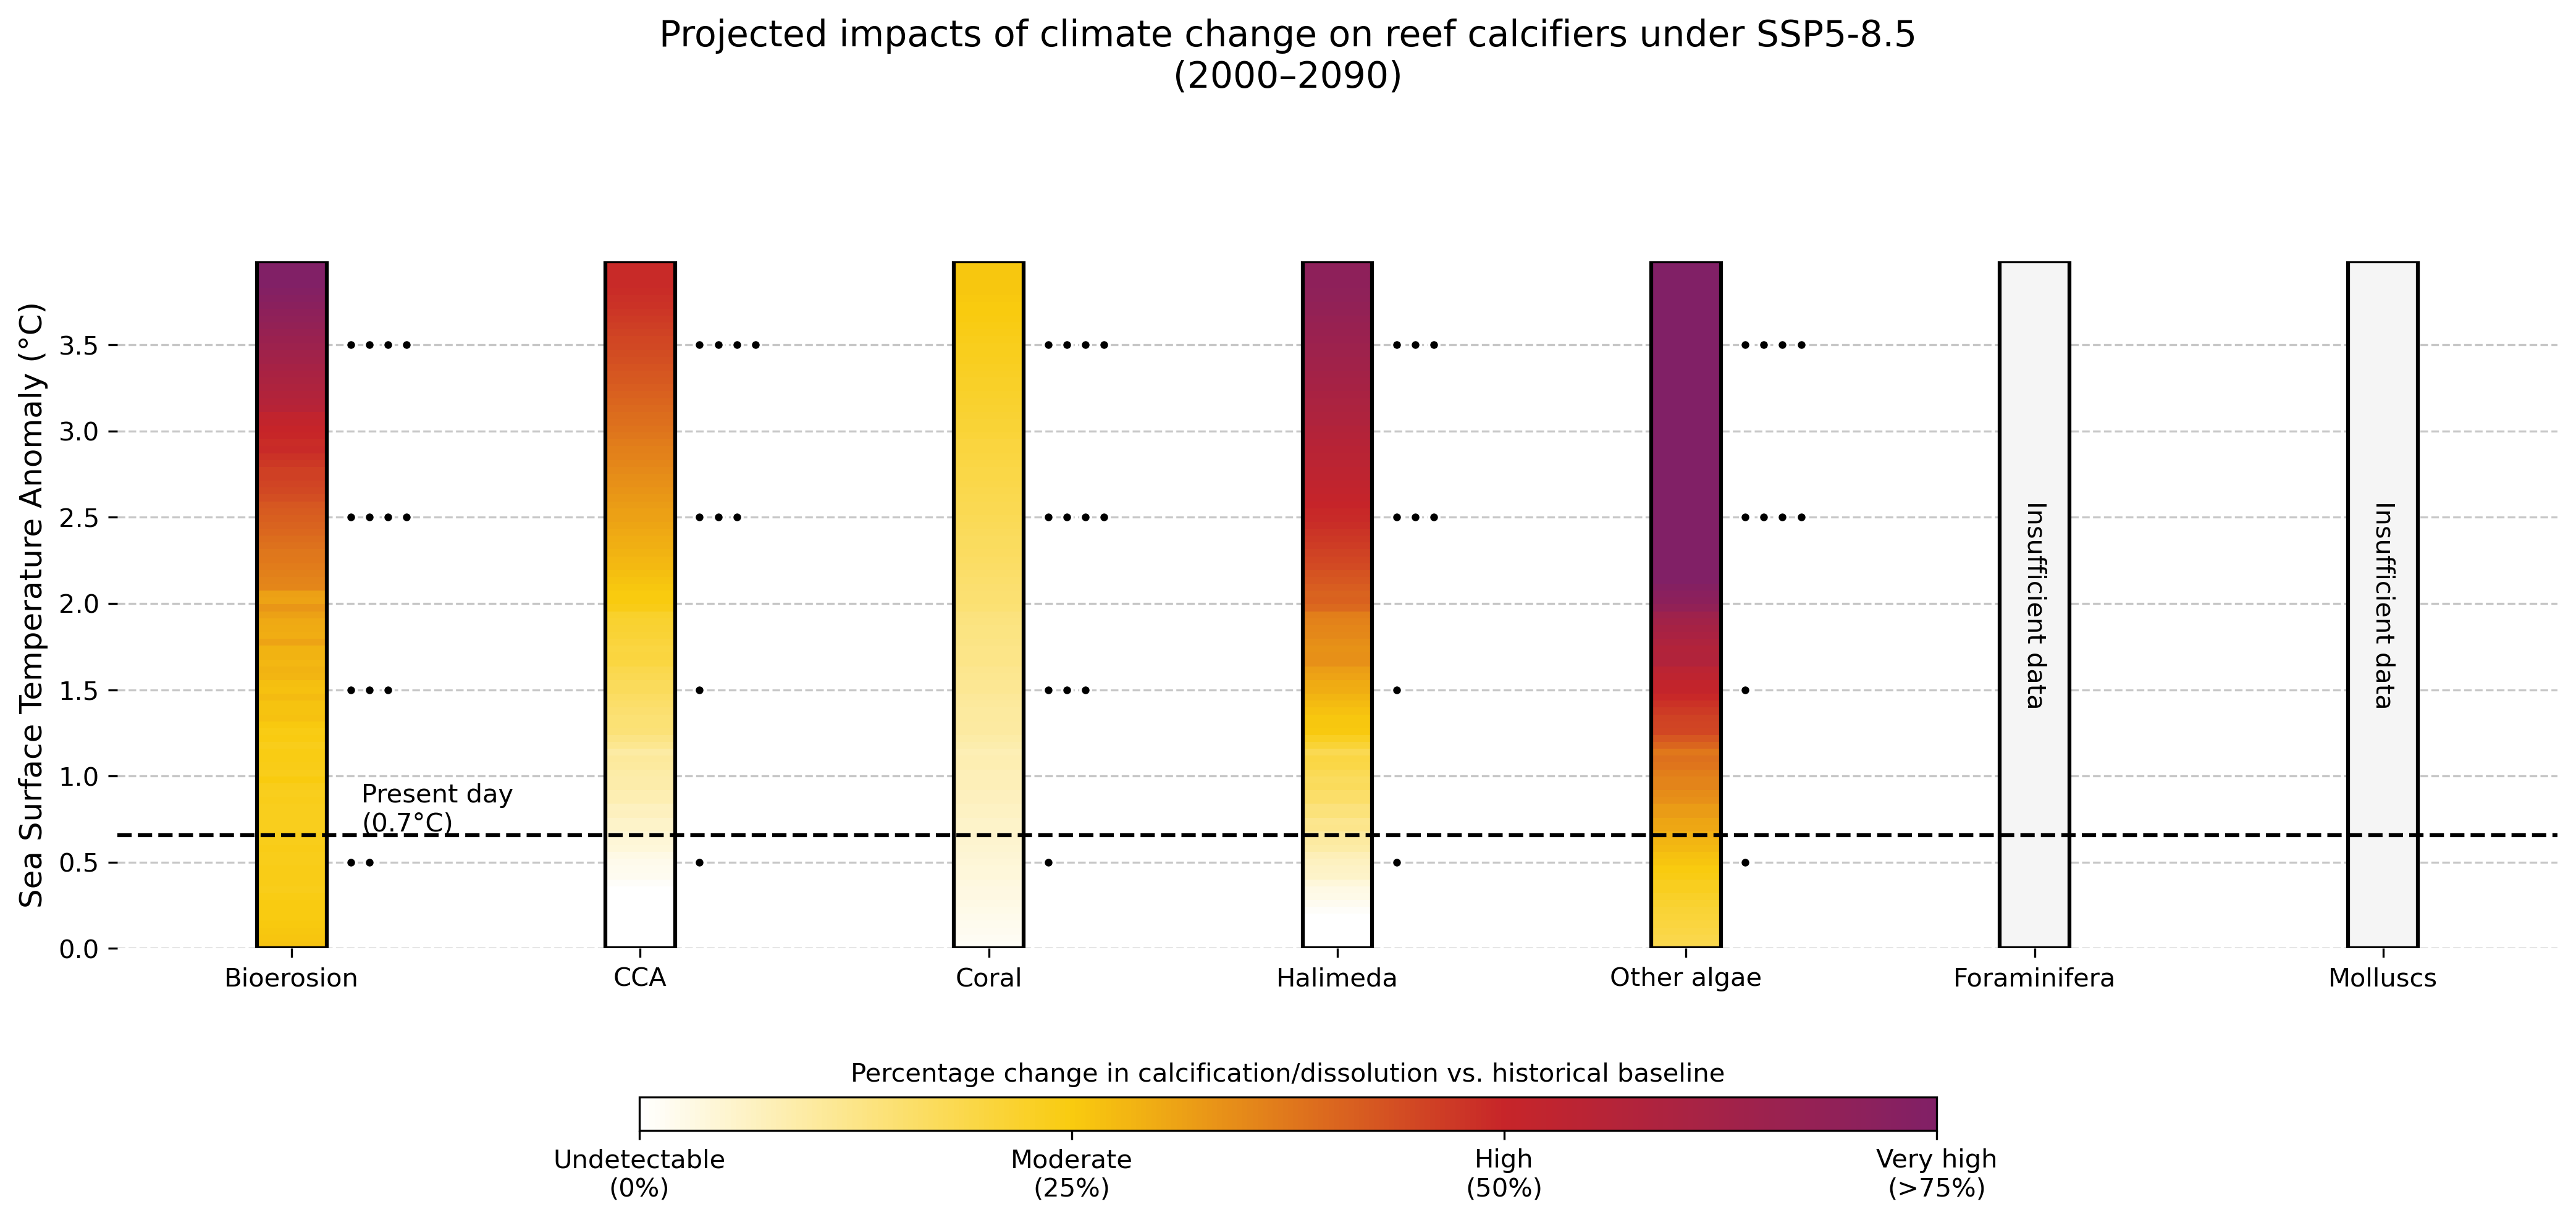

In [67]:
categories = list(plot_preds_sst.core_grouping.unique())
scenarios = list(plot_preds_sst.scenario.unique())
n_categories = len(categories)

# Create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)  # Adjust based on your pred value range
n_levels = 100

# Extract temperature values for vertical axis - FIXED to properly handle SST
anomaly_value_sst_vals = (
    plot_preds_sst[["time_frame", "anomaly_value_sst"]]
    .drop_duplicates()
    .sort_values("time_frame")
)
# anomaly_value_sst_vals = anomaly_value_sst_vals[(anomaly_value_sst_vals['time_frame'] >= 2000) & (anomaly_value_sst_vals['time_frame'] <= 2090)]

# Convert to numeric and handle any issues - IMPROVED
anomaly_value_sst_vals["anomaly_value_sst"] = pd.to_numeric(
    anomaly_value_sst_vals["anomaly_value_sst"], errors="coerce"
)
anomaly_value_sst_vals = anomaly_value_sst_vals.dropna(subset=["anomaly_value_sst"])
anomaly_value_sst_range = anomaly_value_sst_vals["anomaly_value_sst"].values
n_timeframes = len(anomaly_value_sst_range)

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# Remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)

insufficient_data_cols = ["Foraminifera", "Molluscs"]

# Draw each vertical bar, shaded by the values of pred
for i, category in enumerate(categories + insufficient_data_cols):
    if category in insufficient_data_cols:
        # Plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (i - 0.1, anomaly_value_sst_range.min()),  # Bottom-left corner
                0.2,  # Width
                anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        ax.text(
            i,
            (anomaly_value_sst_range.min() + anomaly_value_sst_range.max()) / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue

    # Filter and sort data for this category
    category_data = plot_preds_sst[
        plot_preds_sst["core_grouping"] == category
    ].sort_values("anomaly_value_sst")  # FIXED: Sort by SST not timeframe

    if len(category_data) == 0:
        continue

    # Interpolate pred values to match the number of SST levels - FIXED
    interp_preds = np.interp(
        np.linspace(
            anomaly_value_sst_range.min(), anomaly_value_sst_range.max(), n_levels
        ),
        category_data["anomaly_value_sst"].values.astype(float),
        category_data["pred"].values,
    )

    # Draw the gradient bar using imshow - FIXED to use SST range directly
    ax.imshow(
        np.atleast_2d(interp_preds).T[::-1],
        extent=(
            i - 0.1,
            i + 0.1,
            anomaly_value_sst_range.min(),
            anomaly_value_sst_range.max(),
        ),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )

    # Add border
    ax.add_patch(
        plt.Rectangle(
            (i - 0.1, anomaly_value_sst_range.min()),
            0.2,
            anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=11,
        )
    )
    # Add dots for uncertainty levels for each 1 degree increment
    for j, sst_value in enumerate(
        np.arange(anomaly_value_sst_range.min(), anomaly_value_sst_range.max() + 1, 1)
    ):
        # Get certainty value for this category and SST value
        scenario_data = category_data.iloc[
            (category_data["anomaly_value_sst"] - sst_value).abs().argsort()[:1]
        ]
        if not scenario_data.empty:
            certainty = scenario_data["certainty"].values[0]
            # Calculate positions for up to 4 adjacent dots
            dot_positions = np.linspace(-0.2, 0.2, 4)
            if not np.isnan(certainty):
                num_dots = int(certainty)
                for k in range(num_dots):
                    ax.plot(
                        i + 0.25 + (dot_positions[k] * 0.4),
                        j + 0.5,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )


# Format axes
ax.set_xlim(-0.5, n_categories + len(insufficient_data_cols) - 0.5)
ax.set_ylim(anomaly_value_sst_range.min(), anomaly_value_sst_range.max())
ax.set_xticks(range(n_categories + len(insufficient_data_cols)))
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_ylabel("Sea Surface Temperature Anomaly (°C)", fontsize=12)  # FIXED label

# Mark a horizontal line at present day (2025) - FIXED to find correct SST value
present_day_sst = plot_preds_sst[plot_preds_sst.time_frame == 2025][
    "anomaly_value_sst"
].mean()
ax.axhline(
    y=present_day_sst,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Present day (2025)",
    zorder=20,
)
# Annotate line with text
ax.text(
    0.2,
    present_day_sst + 0.15,
    f"Present day\n({present_day_sst:.1f}°C)",
    color="black",
    fontsize=10,
    ha="left",
    va="center",
    rotation=0,
    zorder=20,
)

# Colorbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage change in calcification/dissolution vs. historical baseline",
    fontsize=10,
)

plt.suptitle(
    "Projected impacts of climate change on reef calcifiers under SSP5-8.5\n(2000–2090)",
    fontsize=14,
    y=1.05,
)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()

### Plotting against temperature with SSP annotation

In [73]:
working_effects_df.core_grouping.value_counts()

core_grouping
Coral           867
CCA             217
Halimeda        115
Other algae      31
Foraminifera      8
Name: count, dtype: int64

Category: Bioerosion, Column Position: 0
Category: CCA, Column Position: 1
Category: Coral, Column Position: 2.3
Category: Halimeda, Column Position: 3.3
Category: Other algae, Column Position: 4.3
Category: Foraminifera/Molluscs, Column Position: 5.3


/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_27572/2361628335.py:202: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



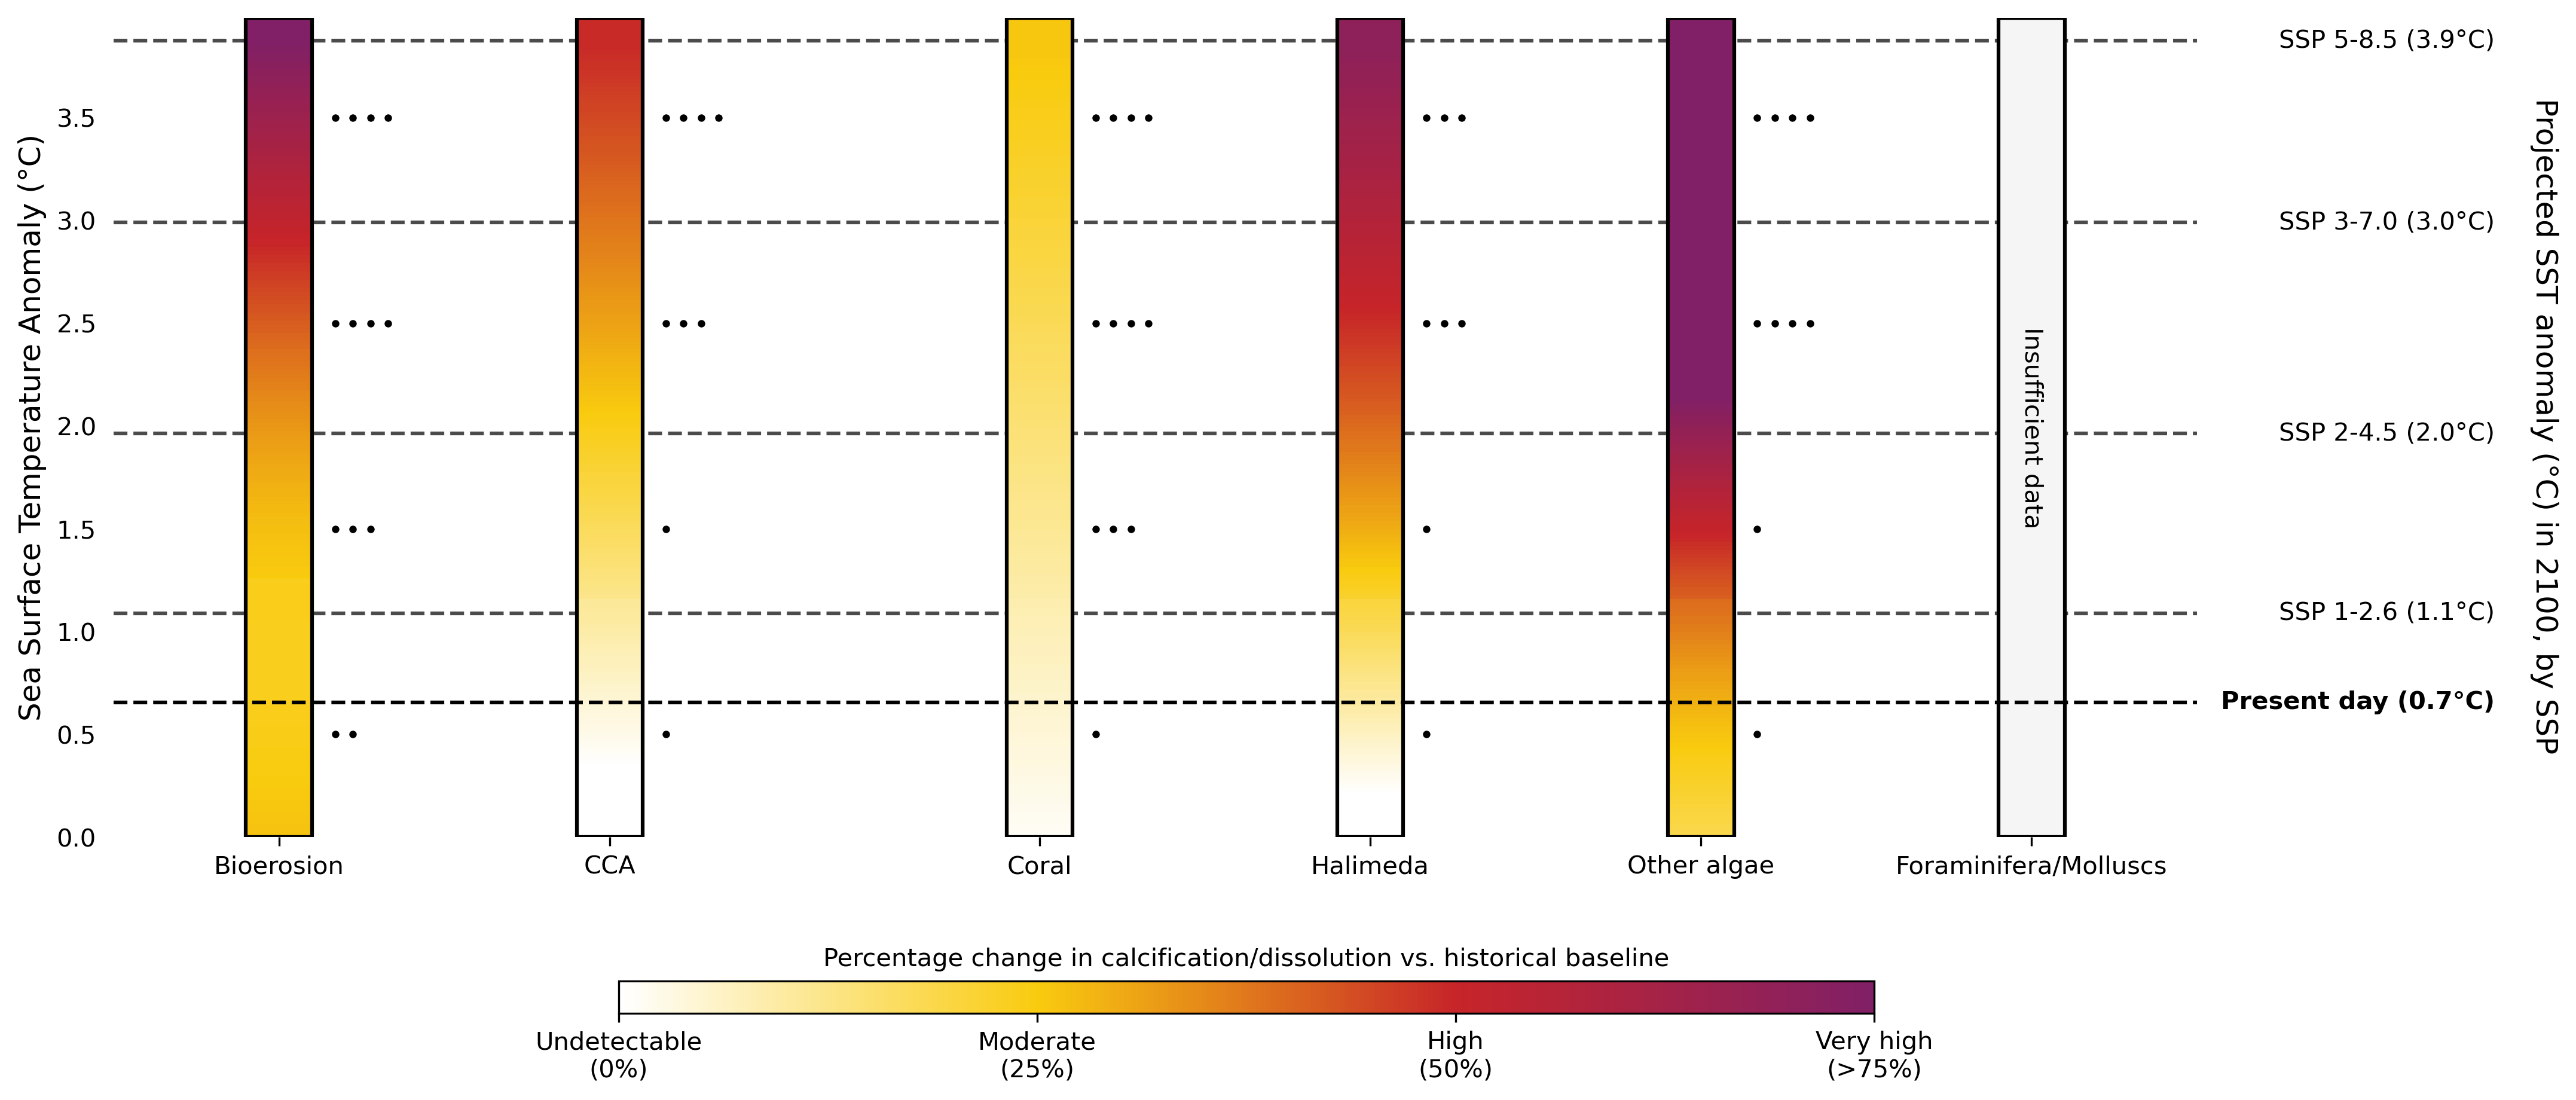

In [74]:
categories = list(plot_preds_sst.core_grouping.unique())
scenarios = list(plot_preds_sst.scenario.unique())
n_categories = len(categories)

# Create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)  # Adjust based on your pred value range
n_levels = 200

# Extract temperature values for vertical axis
anomaly_value_sst_vals = plot_preds_sst[plot_preds_sst.scenario == "ssp585"]
# Convert to numeric and handle any issues
anomaly_value_sst_vals.loc[:, "anomaly_value_sst"] = pd.to_numeric(
    anomaly_value_sst_vals["anomaly_value_sst"], errors="coerce"
)
anomaly_value_sst_vals = anomaly_value_sst_vals.dropna(subset=["anomaly_value_sst"])
anomaly_value_sst_range = anomaly_value_sst_vals["anomaly_value_sst"].values

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# Remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

insufficient_data_cols = ["Foraminifera/Molluscs"]

# Initialize column placement
col_placement = 0
gap_after_coral = 0.3  # Define the extra gap size after Coral

# First, determine indices for all columns including the gap
column_positions = []
for i, category in enumerate(categories + insufficient_data_cols):
    if (
        i > 0 and i < len(categories) and categories[i] == "Coral"
    ):  # Add gap before Coral
        col_placement += gap_after_coral

    column_positions.append(col_placement)
    col_placement += 1  # Standard spacing between columns

# Now draw each vertical bar using the precalculated positions
for i, category in enumerate(categories + insufficient_data_cols):
    col_position = column_positions[i]
    print(f"Category: {category}, Column Position: {col_position}")

    if category in insufficient_data_cols:
        # Plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (
                    col_position - 0.1,
                    anomaly_value_sst_range.min(),
                ),  # Bottom-left corner
                0.2,  # Width
                anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        ax.text(
            col_position,
            (anomaly_value_sst_range.min() + anomaly_value_sst_range.max()) / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue

    # Filter and sort data for this category
    category_data = plot_preds_sst[plot_preds_sst["core_grouping"] == category]
    if len(category_data) == 0:
        continue

    # Interpolate pred values to match the number of SST levels
    interp_preds = np.interp(
        np.linspace(
            anomaly_value_sst_range.min(), anomaly_value_sst_range.max(), n_levels
        ),
        category_data["anomaly_value_sst"].values.astype(float),
        category_data["pred"].values,
    )

    ax.imshow(
        np.atleast_2d(interp_preds).T[::-1],
        extent=(
            col_position - 0.1,
            col_position + 0.1,
            anomaly_value_sst_range.min(),
            anomaly_value_sst_range.max(),
        ),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )  # gradient bar

    # Add border
    ax.add_patch(
        plt.Rectangle(
            (col_position - 0.1, anomaly_value_sst_range.min()),
            0.2,
            anomaly_value_sst_range.max() - anomaly_value_sst_range.min(),
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=11,
        )
    )

    # Add dots for uncertainty levels for each 1 degree increment
    for j, sst_value in enumerate(
        np.arange(anomaly_value_sst_range.min(), anomaly_value_sst_range.max() + 1, 1)
    ):
        # Get certainty value for this category and SST value
        scenario_data = category_data.iloc[
            (category_data["anomaly_value_sst"] - sst_value).abs().argsort()[:1]
        ]
        if not scenario_data.empty:
            certainty = scenario_data["certainty"].values[0]
            # Calculate positions for up to 4 adjacent dots
            dot_positions = np.linspace(-0.2, 0.2, 4)
            if not np.isnan(certainty):
                num_dots = int(certainty)
                for k in range(num_dots):
                    ax.plot(
                        col_position + 0.25 + (dot_positions[k] * 0.4),
                        j + 0.5,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )

# Format axes - update to use the last column position
ax.set_xlim(-0.5, column_positions[-1] + 0.5)
ax.set_ylim(anomaly_value_sst_range.min(), anomaly_value_sst_range.max())
ax.set_xticks(column_positions)
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_ylabel("Sea Surface Temperature Anomaly (°C)", fontsize=12)
# turn off y ticks (but not their labels)
ax.tick_params(
    axis="y", which="both", left=False, right=False, labelleft=True, labelright=False
)

# Mark a horizontal line at present day (2025)
present_day_sst = plot_preds_sst[plot_preds_sst.time_frame == 2025][
    "anomaly_value_sst"
].mean()
ax.axhline(
    y=present_day_sst,
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Present day (2025)",
    zorder=20,
)
# Annotate line with text
last_col_pos = column_positions[-1]
ax.text(
    last_col_pos + 1.4,
    present_day_sst,
    f"Present day ({present_day_sst:.1f}°C)",
    color="black",
    fontsize=10,
    ha="right",
    va="center",
    rotation=0,
    zorder=20,
    fontweight="bold",
)

# Colorbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage change in calcification/dissolution vs. historical baseline",
    fontsize=10,
)

plt.tight_layout(rect=[0, 0.15, 1, 1])

### adding in SSP annotation
for ssp in plot_preds_sst.scenario.unique():
    # get sst at 2100
    ssp_df = plot_preds_sst[plot_preds_sst.scenario == ssp]
    ssp_df = ssp_df[(ssp_df.time_frame == 2100) & (ssp_df.percentile == "mean")]
    ssp_temp = ssp_df.anomaly_value_sst.mean()
    # plot horizontal line at ssp_temp
    ax.axhline(
        y=ssp_temp,
        color="black",
        linestyle="--",
        linewidth=1.5,
        label=f"{ssp} (2100)",
        zorder=-20,
        alpha=0.7,
    )
    # Annotate line with text
    ax.text(
        last_col_pos + 1.4,
        ssp_temp,
        f"{plot_config.SCENARIO_MAP[ssp]} ({ssp_temp:.1f}°C)",
        color="black",
        fontsize=10,
        ha="right",
        va="center",
        rotation=0,
        zorder=20,
    )

# add second vertical axis annotation
ax.text(
    last_col_pos + 1.55,
    2,
    "Projected SST anomaly (°C) in 2100, by SSP",
    color="black",
    fontsize=12,
    ha="center",
    va="center",
    rotation=270,
    zorder=20,
)

fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
plt.show()

### Plot against atmospheric CO2

#### Emissions data

In [76]:
emissions_fp = (
    config.climatology_data_dir / "SUPPLEMENT_DataTables_Meinshausen_6May2020.xlsx"
)
sheet_names = pd.ExcelFile(emissions_fp).sheet_names
scenario_names = [
    scenario_name.replace(" ", "")
    for scenario_name in list(plot_config.SCENARIO_MAP.values())
]
# get names of necessary sheets (those in scenario_names)
relevant_sheet_names = [
    sheet_name
    for sheet_name in sheet_names
    if any(scenario_name in sheet_name for scenario_name in scenario_names)
]
# drop items containing '-lowNTCF' (alternative scenarios)
relevant_sheet_names = [
    sheet_name for sheet_name in relevant_sheet_names if "-lowNTCF" not in sheet_name
]


### assign co2 emissions data to single dataframe
emissions_data = pd.DataFrame()
for sheet_name, scenario_name in zip(relevant_sheet_names, scenario_names):
    sheet_df = pd.read_excel(emissions_fp, sheet_name=sheet_name, skiprows=8)
    processed_sheet_df = processing.process_emissions_sheet(sheet_df, scenario_name)

    if emissions_data.empty:
        emissions_data = processed_sheet_df
    else:
        emissions_data = pd.merge(
            emissions_data, processed_sheet_df, on="year", how="outer"
        )

historic_emissions = pd.read_excel(
    emissions_fp, sheet_name="T2 - History Year 1750 to 2014", skiprows=8
)
historic_emissions = processing.process_emissions_sheet(historic_emissions, "Historic")
historic_emissions = historic_emissions.iloc[-50:, :]

### concatenate historic emissions data with the emissions_data
historic_repeated = pd.concat(
    [historic_emissions["Historic"]] * len(scenario_names), axis=1
)

pd.concat(
    [historic_emissions["year"], historic_repeated], ignore_index=True, axis=1
)  # rename columns to match scenario names
historic_repeated.columns = scenario_names
result = pd.concat([historic_emissions[["year"]], historic_repeated], axis=1)
# concatenate with emissions_data
emissions_data = pd.concat([result, emissions_data], ignore_index=True, axis=0)
emissions_data

year    SSP1-2.6    SSP2-4.5     SSP3-7.0     SSP5-8.5
0    1965  319.815948  319.815948   319.815948   319.815948
1    1966  320.879974  320.879974   320.879974   320.879974
2    1967   321.47995   321.47995    321.47995    321.47995
3    1968  322.388947  322.388947   322.388947   322.388947
4    1969  323.250946  323.250946   323.250946   323.250946
..    ...         ...         ...          ...          ...
531  2496  384.419006  579.768982  1372.869995  2012.339966
532  2497  384.372009  579.599976  1372.369995  2011.670044
533  2498  384.325012  579.432007  1371.869995   2011.01001
534  2499  384.277985  579.263977  1371.380005  2010.359985
535  2500  384.253998  579.179993  1371.130005   2010.02002

[536 rows x 5 columns]

In [ ]:
plot_preds_585 = processing.interpolate_and_extrapolate_predictions(
    reshaped_preds_df.copy()
)
plot_preds_585 = plot_preds_585[plot_preds_585.scenario == "ssp585"]
# Rename emissions for consistency
emissions_585 = emissions_data[["year", "SSP5-8.5"]].rename(columns={"SSP5-8.5": "co2"})

# Merge co2 into predictions
emissions_predictions = pd.merge(
    plot_preds_585, emissions_585, left_on="time_frame", right_on="year", how="left"
)
emissions_predictions.drop(
    columns="year", inplace=True
)  # drop extra year column if needed
emissions_predictions.sort_values(by="core_grouping", inplace=True)


# calculate p-scores
emissions_predictions["p_score"] = emissions_predictions.apply(
    lambda row: analysis.p_score(row["pred"], row["se"], null_value=0), axis=1
)
emissions_predictions["certainty"] = emissions_predictions["p_score"].apply(
    analysis.assign_certainty
)
emissions_predictions

core_grouping scenario percentile  time_frame  anomaly_value_ph  \
529    Bioerosion   ssp585       mean        2100         -0.416808   
451    Bioerosion   ssp585       mean        2022         -0.049272   
452    Bioerosion   ssp585       mean        2023         -0.051981   
453    Bioerosion   ssp585       mean        2024         -0.054752   
454    Bioerosion   ssp585       mean        2025         -0.057587   
..            ...      ...        ...         ...               ...   
288   Other algae   ssp585       mean        2071         -0.256211   
289   Other algae   ssp585       mean        2072         -0.261638   
290   Other algae   ssp585       mean        2073         -0.267113   
266   Other algae   ssp585       mean        2049         -0.148606   
264   Other algae   ssp585       mean        2047         -0.139943   

     anomaly_value_sst       ci.lb      ci.ub       pi.lb      pi.ub  \
529           3.985297 -126.193322 -45.901611 -177.682072   5.587139   
451           0.646618  -52.291057   0.775412 -112.936175  61.420530   
452           0.676081  -52.153725   0.600845 -112.907399  61.354519   
453           0.705938  -52.025553   0.416028 -112.888381  61.278856   
454           0.736189  -51.906542   0.220962 -112.879121  61.193541   
..                 ...         ...        ...         ...        ...   
288           2.401290 -153.374333 -36.800073 -248.955603  58.781196   
289           2.446505 -156.189986 -38.450662 -251.427468  56.786821   
290           2.492044 -159.077133 -40.107534 -253.951042  54.766375   
266           1.488542 -109.517983  -2.077054 -207.656812  96.061775   
264           1.413342 -107.246902   0.928762 -205.143381  98.825240   

          pred         se          co2   p_score  certainty  
529 -86.047466  20.482956  1135.209839  0.000027          4  
451 -25.757823  13.537614   421.334961  0.057082          2  
452 -25.776440  13.458046   424.720947  0.055452          2  
453 -25.804762  13.378200    428.21994  0.053747          2  
454 -25.842790  13.298077   431.829956  0.051974          2  
..         ...        ...          ...       ...        ...  
288 -95.087203  29.738878   754.892883  0.001387          4  
289 -97.320324  30.036094   766.322876  0.001195          4  
290 -99.592334  30.349945   777.929871  0.001033          4  
266 -55.797518  27.408904   555.799927  0.041776          3  
264 -53.159070  27.596340   542.313904  0.054066          2  

[530 rows x 15 columns]

/var/folders/tp/x_9dbyf149d6kw_k79l_kk4m0000gq/T/ipykernel_27572/1225185770.py:192: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



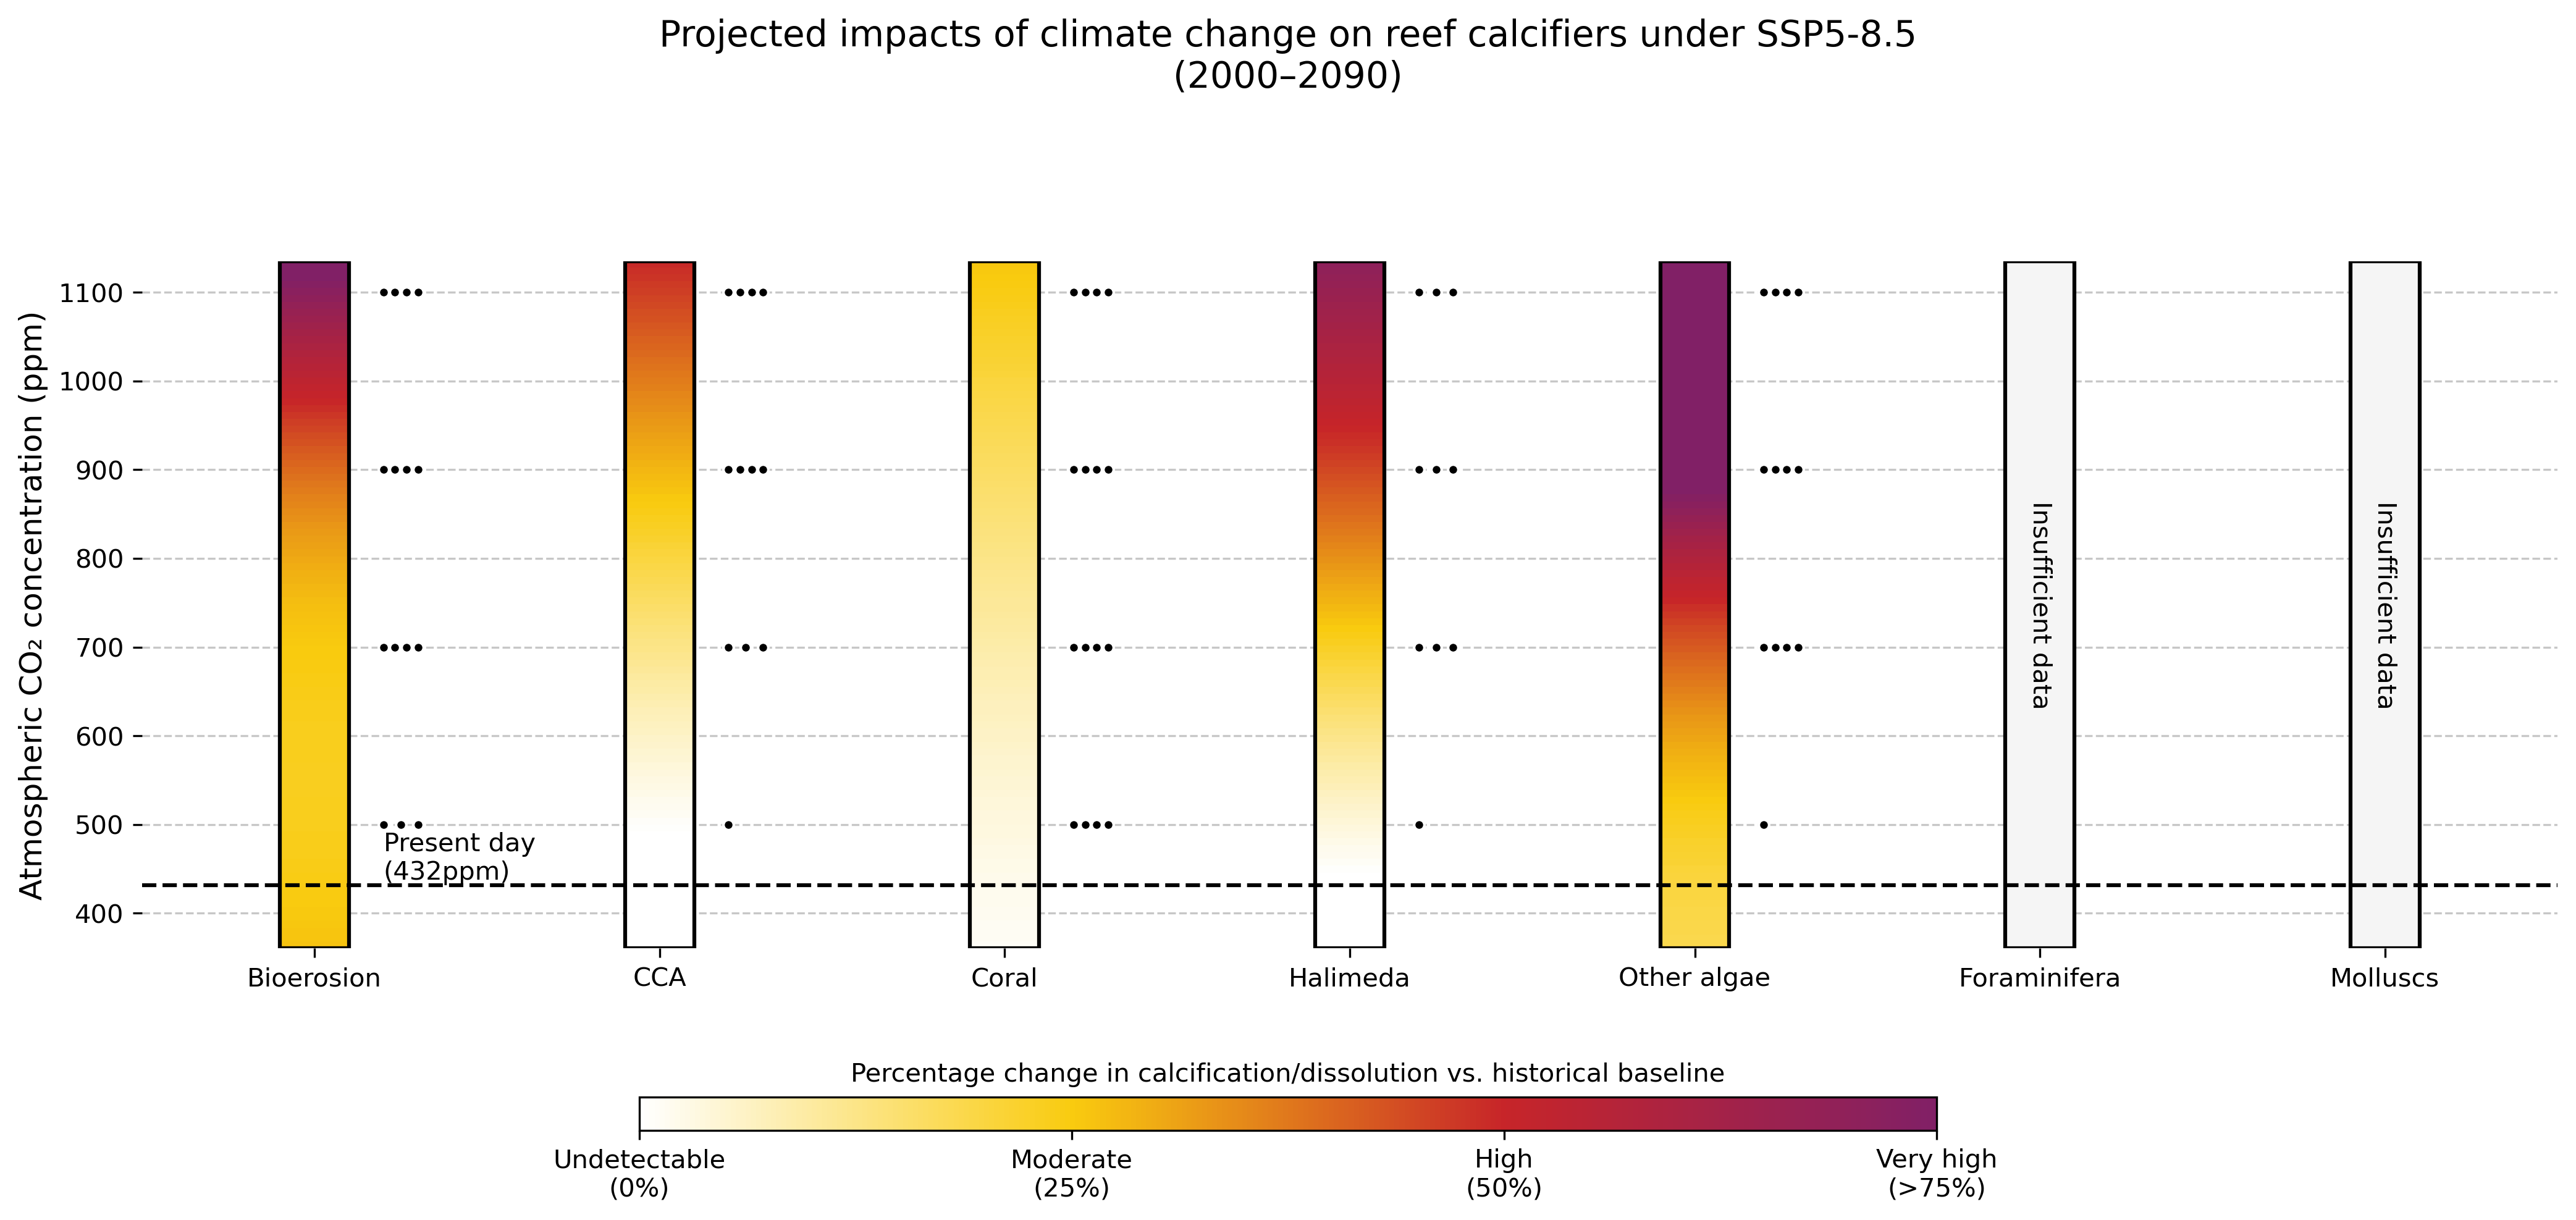

In [79]:
# Setup
categories = list(emissions_predictions.core_grouping.unique())
scenarios = list(emissions_predictions.scenario.unique())
n_categories = len(categories)

# Create custom colormap from white → yellow → orange → red → purple
colors = ["#ffffff", "#f9cb0f", "#c72529", "#812066"][::-1]
cmap = LinearSegmentedColormap.from_list("burning_embers", colors, N=256)

cnorm = Normalize(vmin=0, vmax=-75)  # Adjust based on your pred value range
n_levels = 100

# Extract CO₂ values for the vertical axis
co2_vals = (
    emissions_predictions[["time_frame", "co2"]]
    .drop_duplicates()
    .sort_values("time_frame")
)
co2_vals = co2_vals["co2"].astype(float, errors="ignore")
n_timeframes = len(co2_vals)

# Create the figure
fig, ax = plt.subplots(figsize=(14, 6), dpi=300)

# Remove the axis box
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.yaxis.grid(True, linestyle="--", alpha=0.7, zorder=-20)

insufficient_data_cols = ["Foraminifera", "Molluscs"]

# Draw each vertical bar, shaded by the values of pred
for i, category in enumerate(categories + insufficient_data_cols):
    if category in insufficient_data_cols:
        # Plot empty grey bar
        ax.add_patch(
            plt.Rectangle(
                (i - 0.1, co2_vals.min()),  # Bottom-left corner
                0.2,  # Width
                co2_vals.max() - co2_vals.min(),  # Height
                edgecolor="black",
                facecolor="whitesmoke",
                linewidth=1.5,
                alpha=1,
                zorder=10,
            )
        )
        ax.text(
            i,
            (co2_vals.min() + co2_vals.max()) / 2,
            "Insufficient data",
            ha="center",
            va="center",
            fontsize=10,
            rotation=270,
            color="black",
            zorder=20,
        )
        continue

    # Filter and sort data for this category
    category_data = emissions_predictions[
        emissions_predictions["core_grouping"] == category
    ].sort_values("time_frame")

    if len(category_data) == 0:
        continue

    # Interpolate pred values to match the number of co2 levels
    interp_preds = np.interp(
        np.linspace(0, len(category_data) - 1, n_levels),
        np.arange(len(category_data)),
        category_data["pred"].values,
    )

    # Interpolate co2 to match gradient height
    interp_co2 = np.interp(
        np.linspace(0, len(category_data) - 1, n_levels),
        np.arange(len(category_data)),
        category_data["co2"].values.astype(float),
    )

    # Draw the gradient bar using imshow
    ax.imshow(
        np.atleast_2d(interp_preds[::-1]).T,  # flip so early years at bottom
        extent=(i - 0.1, i + 0.1, interp_co2.min(), interp_co2.max()),
        aspect="auto",
        cmap=cmap,
        norm=cnorm,
        alpha=1,
        zorder=10,
    )

    # Add border
    ax.add_patch(
        plt.Rectangle(
            (i - 0.1, interp_co2.min()),
            0.2,
            interp_co2.max() - interp_co2.min(),
            edgecolor="black",
            facecolor="none",
            linewidth=1.5,
            zorder=11,
        )
    )

    # Add dots for uncertainty levels for each 200 ppm increment
    for co2_level in np.arange(300, co2_vals.max() + 200, 200):
        # Find the closest data point for the current CO₂ level
        closest_data = category_data.iloc[
            (category_data["co2"] - co2_level).abs().argsort()[:1]
        ]
        if not closest_data.empty:
            certainty = closest_data["certainty"].values[0]
            if not np.isnan(certainty):
                # Calculate positions for up to 4 adjacent dots
                dot_positions = np.linspace(-0.05, 0.05, int(certainty))
                for dot_pos in dot_positions:
                    ax.plot(
                        i + 0.25 + dot_pos,
                        co2_level,
                        "o",
                        color="black",
                        markersize=4,
                        alpha=1,
                        markeredgecolor="white",
                    )
            else:
                print(
                    f"Certainty is NaN for category: {category}, CO₂ level: {co2_level}"
                )
        else:
            print(
                f"No closest data found for category: {category}, CO₂ level: {co2_level}"
            )

# Format axes
ax.set_xlim(-0.5, n_categories + len(insufficient_data_cols) - 0.5)
ax.set_ylim(co2_vals.min(), co2_vals.max())
ax.set_xticks(range(n_categories + len(insufficient_data_cols)))
ax.set_xticklabels(
    categories + insufficient_data_cols, rotation=0, ha="center", fontsize=10
)
ax.set_ylabel("Atmospheric CO₂ concentration (ppm)", fontsize=12)

# mark a horizontal line at present day (2025)
present_day_index = np.where(
    co2_vals
    == emissions_predictions[emissions_predictions.time_frame == 2025].co2.iloc[0]
)[0][0]
ax.axhline(
    y=co2_vals.iloc[present_day_index],
    color="black",
    linestyle="--",
    linewidth=1.5,
    label="Present day (2025)",
    zorder=20,
)
# annotate line with text
ax.text(
    0.2,
    co2_vals.iloc[present_day_index] + 30,
    f"Present day\n({co2_vals.iloc[present_day_index]:.0f}ppm)",
    color="black",
    fontsize=10,
    ha="left",
    va="center",
    rotation=0,
    zorder=20,
)

# Colorbar
cax = fig.add_axes([0.25, 0.05, 0.5, 0.03])
reversed_cmap = cmap.reversed()
cb = ColorbarBase(cax, cmap=reversed_cmap, norm=cnorm, orientation="horizontal")
cb.set_ticks(np.linspace(cnorm.vmin, cnorm.vmax, 4))
cb.set_ticklabels(
    ["Undetectable\n(0%)", "Moderate\n(25%)", "High\n(50%)", "Very high\n(>75%)"]
)
cax.set_title(
    "Percentage change in calcification/dissolution vs. historical baseline",
    fontsize=10,
)

plt.suptitle(
    "Projected impacts of climate change on reef calcifiers under SSP5-8.5\n(2000–2090)",
    fontsize=14,
    y=1.05,
)
plt.tight_layout(rect=[0, 0.15, 1, 0.95])
plt.show()
